# Line cuts, maps for DC

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import pandas as pd
import csv


def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns
    
    Args:
        file_path (str): Path to data file
        columns_to_read (list, optional): List of column names to extract. 
            If None, reads all columns.
    
    Returns:
        tuple: (metadata dict, DataFrame with selected columns)
    """
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            # Try to convert first value to float
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df


def read_select_data_cp(file_path, columns_to_read=None):
    """Load data with option to select specific columns
    
    Args:
        file_path (str): Path to data file
        columns_to_read (list, optional): List of column names to extract. 
            If None, reads all columns.
    
    Returns:
        tuple: (metadata dict, DataFrame with selected columns)
    """
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            # Try to convert first value to float
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_cpr_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['B', 'Phase', 'Current'])
    
    # 转换数据类型
    df = df.astype({
        'B': float,
        'Phase': float,
        'Current': float
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='B')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1.3
    height = 0.64 * width*2
    fig = plt.figure(figsize=(width, height))
    gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1],wspace=0.4,hspace=0.2)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 1: CPR curves
    # ======================
    ax0 = fig.add_subplot(gs[0, 0])
    vtaus0 = [0.842, 1.000]
    selected_bs = [0.5, 2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    # 绘制数据
    for i0, vtau in enumerate(vtaus0):
        file_path = f"CPR_adaptive=True_B_sweep_Vdis=0.0_Vtau={vtau:.3f}.csv"
        metadata, df = read_cpr_data(file_path)
        b_values = np.sort(df['B'].unique())
        phase_values = np.sort(df['Phase'].unique())
        current_matrix = df.pivot(index='B', columns='Phase', values='Current').values
        
        for j0, b_val in enumerate(selected_bs):
            index_b = [i for i, val in enumerate(b_values) if val == b_val]
            config = line_styles[f'B={b_val}'] if f'B={b_val}' in line_styles else line_styles['default']
            
            # 使用颜色表示vτ值
            color = vtau_colors[vtau]
            ax0.plot(phase_values/np.pi, current_matrix[index_b[0], :]/reduced_factor, 
                     color=color, **config)
    
    # 设置轴标签
    # ax0.set_xlabel(r'$\boldsymbol{\phi~(\pi)}$', fontsize=sizes['label'])
    ax0.set_ylabel(r'$\boldsymbol{I{(\phi)}~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # 设置刻度
    ax0.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax0.set_xticklabels([r"", r"", r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick']) 
    # ax0.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])
    ax0.set_yticks([-1, 0, 1])
    ax0.set_yticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax0.axvline(x=1, ymin=-3, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax0.axhline(y=0, xmin=0, xmax=2, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    ax0.grid(**grid_settings)
    
    # 设置刻度方向
    ax0.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    # 添加图例（只显示线型）
    legend_elements = [
        plt.Line2D([0], [0], color='k', 
                  linestyle=line_styles['B=0.5']['linestyle'], 
                  lw=line_styles['B=0.5']['linewidth'], 
                  label=r'$0.5$'),
        plt.Line2D([0], [0], color='k', 
                  linestyle=line_styles['B=2.0']['linestyle'], 
                  lw=line_styles['B=2.0']['linewidth'], 
                  label=r'$2.0$')
    ]
    
    # 将图例放在图内右上角
    ax0.legend(handles=legend_elements, loc='upper right', 
              title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
              title_fontsize=sizes['legend'],handlelength=0.9, 
              **legend_settings)
    
    # ======================
    # Panel 2: Critical current vs B
    # ======================
    
    ax1 = fig.add_subplot(gs[0, 1])
    vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    # 使用离散颜色方案绘制数据
    for vtau in vtaus:
        color = vtau_colors[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_v0.csv"
        columns_to_read = ['B', 'Ic_max', 'Ic_min']
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)
        ax1.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
                 '-', color=color, linewidth=line_styles['default']['linewidth'])
    
    # 设置轴标签
    # ax1.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'])
    ax1.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # 设置刻度
    ax1.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax1.set_xticklabels([r"", r"", r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick']) 
    
    # ax1.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax1.set_yticks([0.3, 0.5, 0.7, 0.9])
    ax1.set_yticklabels([r"\bf{0.3}", r"\bf{0.5}", r"\bf{0.7}", r"\bf{0.9}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax1.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
    
    # ======================
    # 创建离散颜色条
    # # ======================
    # cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  # [x, y, width, height]
    
    # # 创建离散颜色映射
    # cmap = ListedColormap([vtau_colors[v] for v in vtaus])
    # bounds = np.arange(len(vtaus) + 1)
    # norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    # # 创建颜色条
    # cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm,
    #                                 boundaries=bounds, 
    #                                 ticks=np.arange(len(vtaus)) + 0.5,
    #                                 spacing='proportional',
    #                                 orientation='vertical')
    
    # # 设置刻度标签
    # cbar.set_ticklabels([f'{D:.2f}' for D in Dtaus])
    # cbar.ax.tick_params(labelsize=sizes['cbar_tick'])
    # # cbar.set_label(r'$\boldsymbol{v_{\tau}}$', fontsize=sizes['cbar_label'], labelpad=10)
    
    # # 添加颜色条标题
    # cbar_ax.text(0.5, 1.05, r'$\boldsymbol{D_{\tau}}$', 
    #             transform=cbar_ax.transAxes, 
    #             fontsize=sizes['cbar_label'], 
    #             ha='center', va='bottom')


    # ======================
    # Panel 3: CPR curves
    # ======================
    ax2 = fig.add_subplot(gs[1, 0])
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    # 绘制数据
    for i0, B0 in enumerate(selected_bs):
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_B={B0:.1f}_disorder1.csv"
        columns_to_read = ['B', 'Ic_max', 'Ic_min']
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)
        ax2.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
                     '-', linewidth=line_styles['default']['linewidth'], marker='.',markersize=10, label = r'%.1f'%B0)
    
    # 设置轴标签
    ax2.set_xlabel(r'$\boldsymbol{V_{dis}/V_0}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # 设置刻度
    ax2.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax2.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax2.set_yticks([0,0.5,1.0])
    ax2.set_yticklabels([r"\bf{0.0}",r"\bf{0.5}",r"\bf{1.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax2.axvline(x=1, ymin=-3, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # ax2.axhline(y=0, xmin=0, xmax=2, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    ax2.grid(**grid_settings)
    
    # 设置刻度方向
    ax2.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    ax2.legend(loc='upper right', 
              title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
              title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
              **legend_settings)

    # ======================
    # Panel 4: Critical current vs B
    # ======================
    
    ax3 = fig.add_subplot(gs[1, 1])
    # vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]  [0.338] -> [0.05]
    vtau = 0.882
    alpha_list = [0.1,0.2, 0.3,0.4,0.5, 0.6,0.8,0.9,0.95,1.0]
    Vdis_list = [0.0,0.1,0.2,0.3,0.5,0.8,1.0,1.2,1.5,1.8]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    # 使用离散颜色方案绘制数据
    for i in range(len(Vdis_list)):
        print(i)
        color = vtau_colors[vtau]
        file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_Vdis={Vdis_list[i]:.1f}_disorder1.csv"
        columns_to_read = ['B', 'Ic_max', 'Ic_min']
        metadata, df = read_select_data(file_path, columns_to_read=columns_to_read)
        if i ==0:
            # pass
            ax3.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
                     ':', color='k', linewidth=line_styles['default']['linewidth'], alpha =1.0 )    
        else:
            ax3.plot(df['B'].values, (df['Ic_max'].values - df['Ic_min'].values)/2/reduced_factor,
                     '-', color=color, linewidth=line_styles['default']['linewidth'], alpha =alpha_list[i-1] )  # color=color, 
    
    # 设置轴标签
    ax3.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'])
    ax3.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # 设置刻度
    ax3.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax3.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax3.set_yticks([0.3, 0.5, 0.7, 0.9])
    ax3.set_yticklabels([r"\bf{0.3}", r"\bf{0.5}", r"\bf{0.7}", r"\bf{0.9}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax3.set_ylim([0.35, 0.55])

    ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    ax3.grid(**grid_settings)
    
    # 设置刻度方向
    ax3.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
    
    # ======================
    # 创建离散颜色条
    # ======================
    # cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  # [x, y, width, height]
    cbar_ax = fig.add_axes([0.22, 0.95, 0.5, 0.02])  # [x, y, width, height]
   
    # 创建离散颜色映射
    cmap = ListedColormap([vtau_colors[v] for v in vtaus])
    bounds = np.arange(len(vtaus) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    # 创建颜色条
    cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm,
                                    boundaries=bounds, 
                                    ticks=np.arange(len(vtaus)) + 0.5,
                                    spacing='proportional',
                                    orientation='horizontal')
    
    # 设置刻度标签
    cbar.set_ticklabels([f'{D:.2f}' for D in Dtaus])
    cbar.ax.tick_params(labelsize=sizes['cbar_tick'])
    cbar_ax.xaxis.set_ticks_position('top')
    
    # cbar.set_label(r'$\boldsymbol{v_{\tau}}$', fontsize=sizes['cbar_label'], labelpad=10)
    
    # 添加颜色条标题
    cbar_ax.text(1.1, 0.70, r'$\boldsymbol{D_{\tau}}$', 
                 transform=cbar_ax.transAxes, 
                 fontsize=sizes['cbar_label'], 
                 ha='center', va='bottom')
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()


ValueError: Key text.latex.preamble: Could not convert ['\\usepackage{amsmath}'] to str

# test for a single map, tune the figure set here 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False  # 禁用LaTeX渲染

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df


def plot_dc_data(metadata, df, plot_choice='2d'):
    """
    CPR数据
    
    参数:
    plot_choice - '3d': 显示3D曲面图, 'ic_phi0': 显示Ic和φ0随磁场变化
    ic_method - 'abs_max': 使用绝对值最大值, 'separate': 分别计算正负最大值
    save_data - 是否保存计算结果
    """
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    print(len(b_values))
    print(len(vbias_values))
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 计算Ic和φ0
    
    # 创建图形
    plt.figure(figsize=(10, 5))
    gs = GridSpec(1, 2, width_ratios=[1, 0.05])
    
    # 1. 2D 热图 - 使用pcolor替代imshow
    ax1 = plt.subplot(gs[0, 0])
    
    # 简化网格创建
    vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
    dx0 =vbias_grid[1]-vbias_grid[0]
    dy0 = b_values[1] - b_values[0]
    X, Y = np.meshgrid( vbias_grid, b_values)
    
    # 使用pcolormesh绘制热图 (兼容性更好)
    pc = ax1.pcolormesh(
        X, Y, 
        current_matrix, #np.gradient(current_matrix, dx0, axis=1), #np.gradient(current_matrix,dx0,axis=1),   current_matrix,np.log10
        cmap='jet', 
        shading='none',  # 更平滑的渲染
        vmin=0,  # 最小值设为0
        vmax=15
    )

    # pc= ax1.contourf(X, Y, np.gradient(current_matrix, dx0, axis=1), 20, cmap='RdGy')

    # 设置轴标签
    ax1.set_xlabel(r'$V_{bias}~(\Delta)$')
    ax1.set_ylabel('Zeeman $\Gamma /\Gamma_c$')
    ax1.set_title('dc Current (a.u.) ')
    
    # 设置x轴刻度为π的倍数
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(
        lambda val, pos: f'{val:.1f}' if val != 0 else '0'
    ))
    
    # 2. 根据用户选择绘制第二个面板
    if plot_choice == '3d':
        # 3D 曲面图
        ax2 = plt.subplot(gs[0, 1], projection='3d')
        surf = ax2.plot_surface(
            X, Y, 
            (current_matrix),  # 
            cmap='viridis', 
            edgecolor='none'
        )
        ax2.set_xlabel('Phase $~(\pi)$')
        ax2.set_ylabel('Zeeman E. (meV)')
        ax2.set_zlabel('Current (nA)')
        ax2.set_title('CPR Current (nA) - 3D Surface')
        
        # 设置x轴刻度标签
        ax2.set_xticks(np.arange( vbias_grid.min(),  vbias_grid.max() + 0.1, 0.5))
        ax2.set_xticklabels([f'{x:.1f}' for x in ax2.get_xticks()])
            
    # 添加颜色条
    # cax = plt.subplot(gs[0, 0])
    cax = ax1.inset_axes([1.02, 0.1, 0.03, 0.8])
    plt.colorbar(pc, cax=cax, orientation='vertical', label='dc Current (a.u.)')
    
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')

    save_path = f"dc_plot_vtau_{vtau}_Vdis=0.0_disorder1_inf_lead.png"
    plt.savefig(save_path, dpi=300)
    print(f"图形已保存至: {save_path}")
    
    plt.show()
    


# 使用示例
if __name__ == "__main__":
    file_path = "DC_IV_2D_Bs_vtau=0.842_inflead.csv"
    
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印优化后的元数据
    print("优化后的元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 可视化数据
    plot_dc_data(metadata, df)

FileNotFoundError: [Errno 2] No such file or directory: 'DC_IV_2D_Bs_vtau=0.842_inflead.csv'

元数据信息:
N_SC: 1
N_junction: 2
delta: 0.3
alpha: 4.0
v_tau: 0.75
max_sidebands: 15
timestamp: 2025-09-18 11:28:01
common_timestamp: 20250918095811
disorder_type: none
calculation: DC_IV_2D
duration: 5389.955094337463
B_points: 201
B_max: 2.0
Vbias_points: 501
outer_parallel_n: 1

=== 使用 gradient 方法 ===
B值数量: 101
Vbias值数量: 186
使用 gradient 方法检测peak中...
总共检测到 0 个peak
绘制了 0 条peak轨迹
图形已保存至: dc_plot_vtau_0.75_peaks_gradient.png


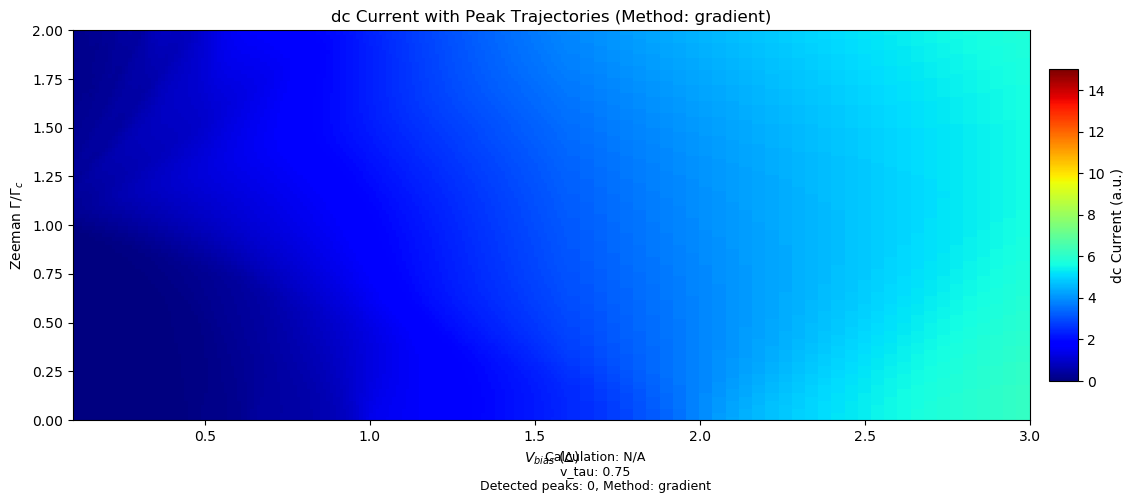

绘制line cut验证图...


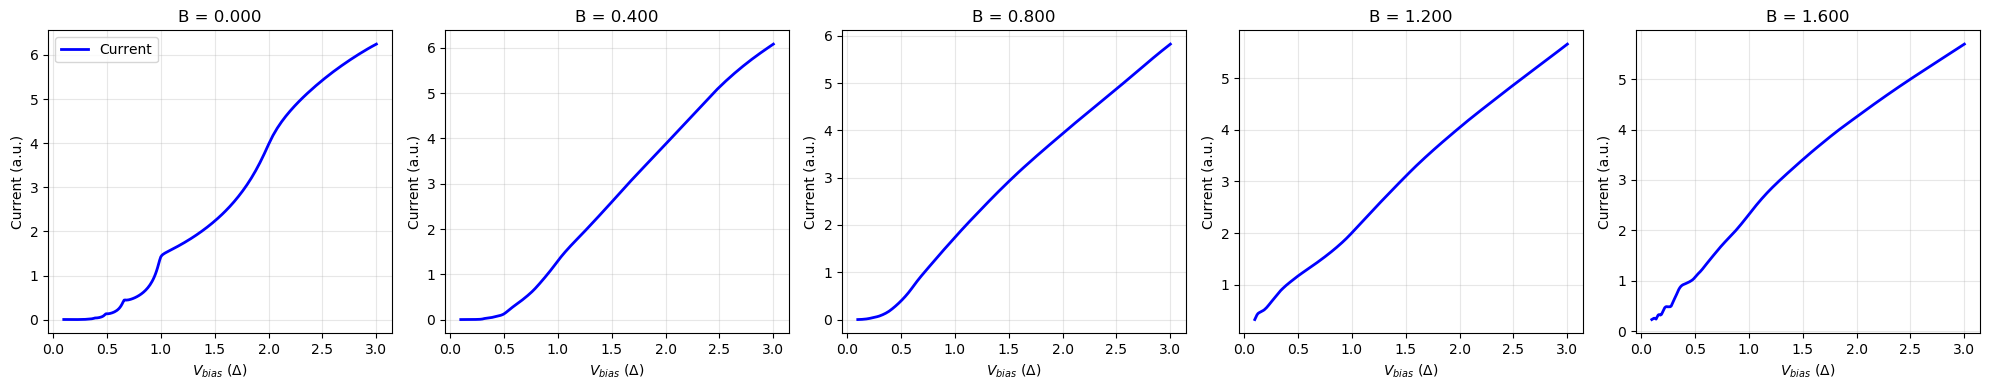

Peak轨迹信息 (gradient):

=== 使用 relative 方法 ===
B值数量: 101
Vbias值数量: 186
使用 relative 方法检测peak中...
总共检测到 0 个peak
绘制了 0 条peak轨迹
图形已保存至: dc_plot_vtau_0.75_peaks_relative.png


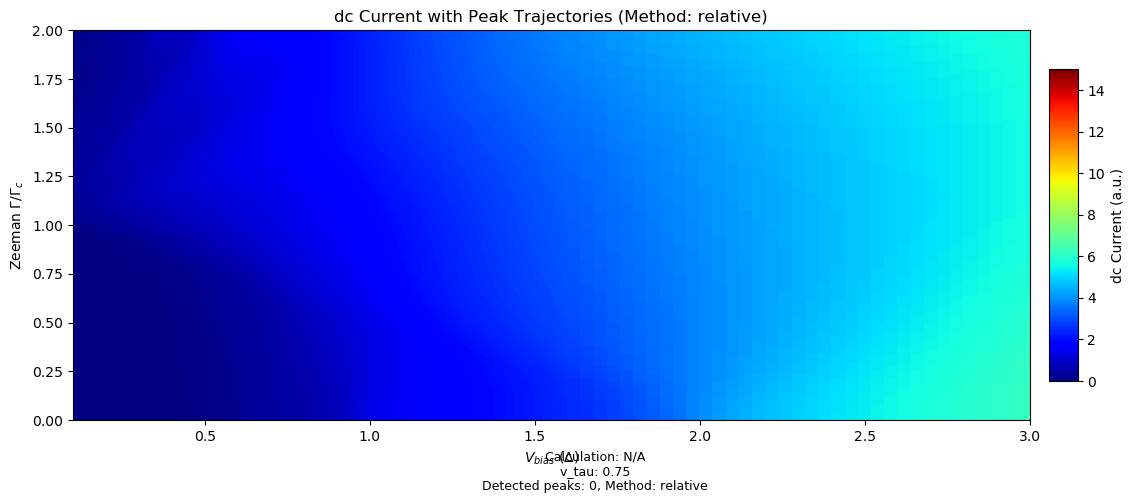

绘制line cut验证图...


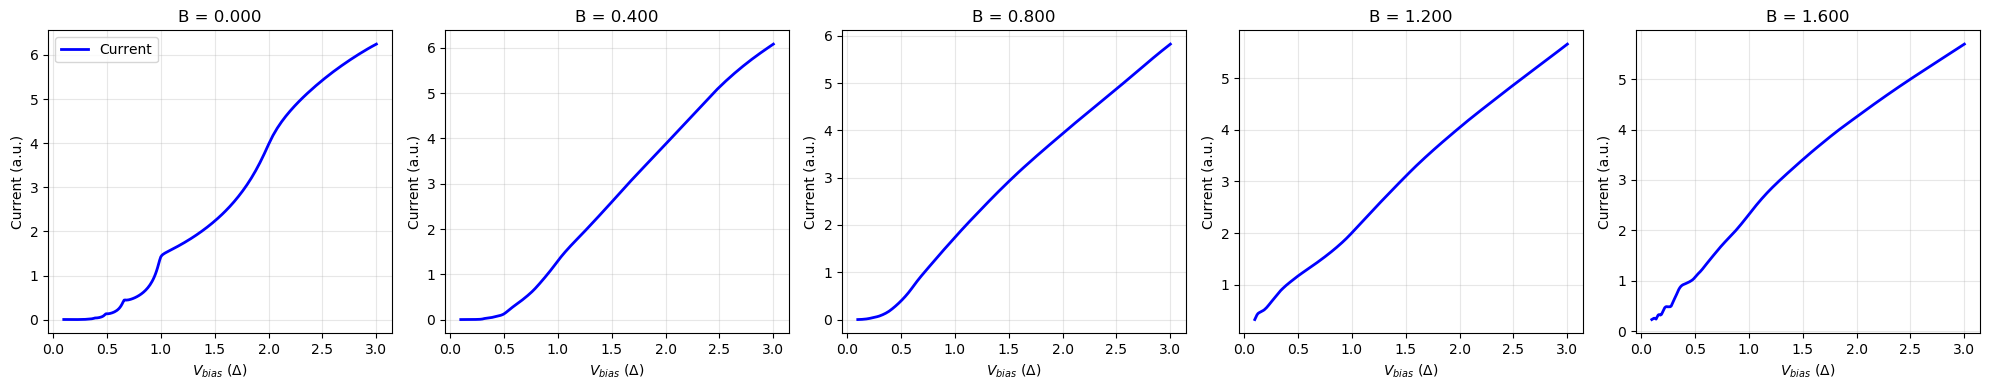

Peak轨迹信息 (relative):

=== 使用 smooth 方法 ===
B值数量: 101
Vbias值数量: 186
使用 smooth 方法检测peak中...
总共检测到 0 个peak
绘制了 0 条peak轨迹
图形已保存至: dc_plot_vtau_0.75_peaks_smooth.png


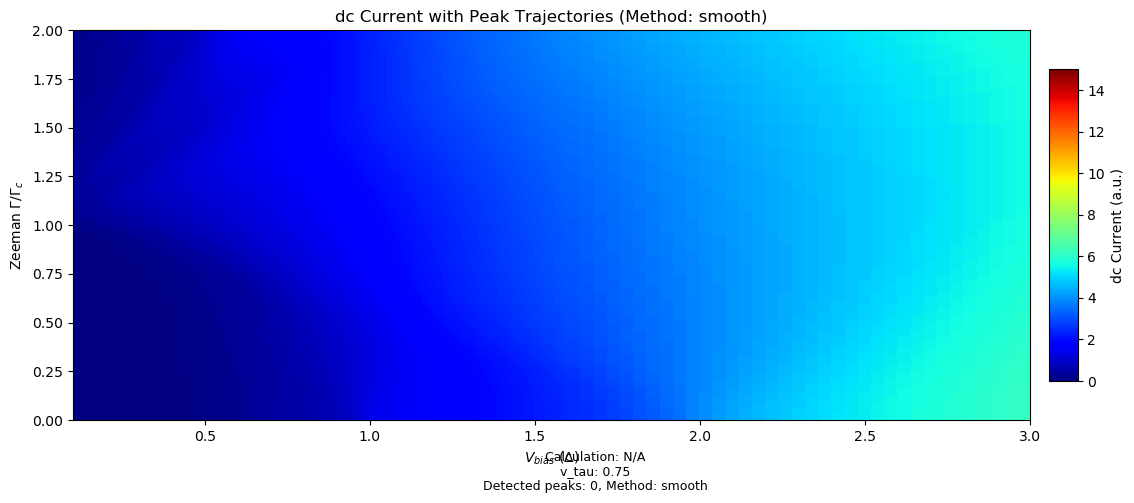

绘制line cut验证图...


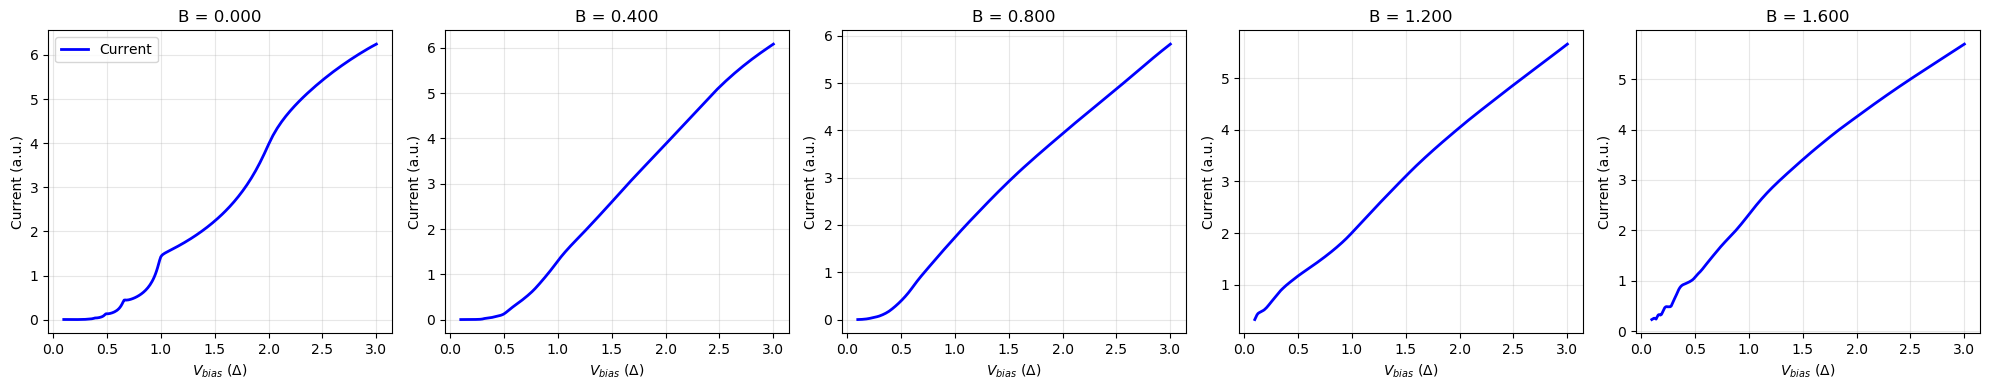

Peak轨迹信息 (smooth):

=== 使用 combined 方法 ===
B值数量: 101
Vbias值数量: 186
使用 combined 方法检测peak中...
总共检测到 0 个peak
绘制了 0 条peak轨迹
图形已保存至: dc_plot_vtau_0.75_peaks_combined.png


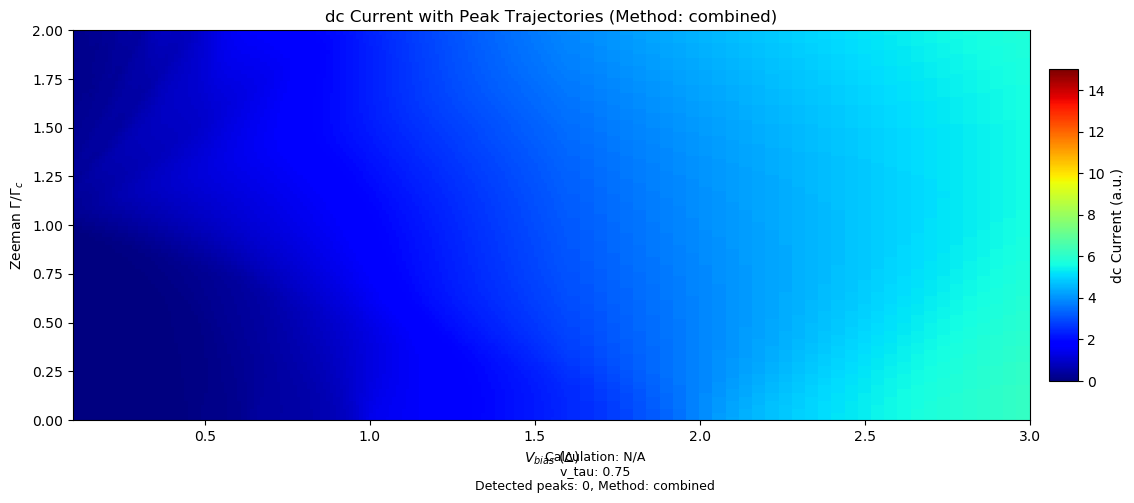

绘制line cut验证图...


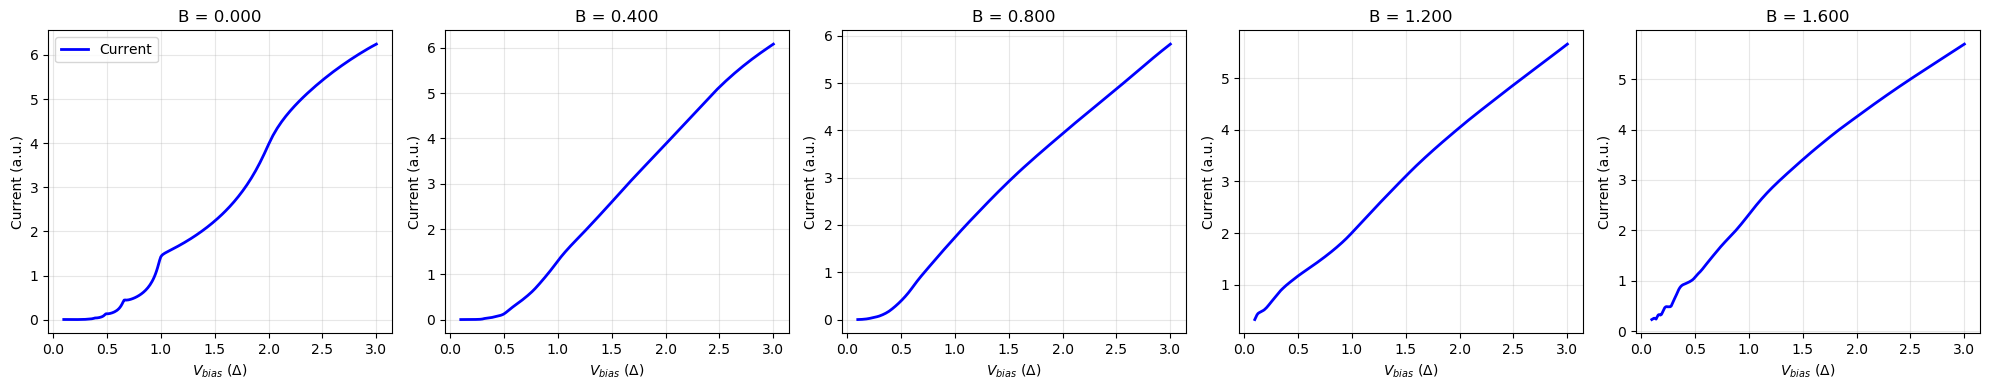

Peak轨迹信息 (combined):


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import find_peaks, savgol_filter, argrelextrema
from scipy.ndimage import gaussian_filter1d
plt.rcParams['text.usetex'] = False  # 禁用LaTeX渲染

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df

def detect_peaks_robust(current_matrix, vbias_values, b_values, method='gradient'):
    """
    更稳健的peak检测方法
    
    参数:
    current_matrix: 电流矩阵 (y, x)
    vbias_values: x轴值 (偏压)
    b_values: y轴值 (磁场)
    method: 检测方法 ('gradient', 'relative', 'smooth', 'combined')
    
    返回:
    peak_positions: 每个y值对应的peak的x位置列表
    """
    peak_positions = []
    
    # 对每个y值（每行）检测peak
    for i in range(current_matrix.shape[0]):
        row_data = current_matrix[i, :]
        
        if method == 'gradient':
            # 方法1: 基于梯度变化检测peak
            peaks = detect_peaks_by_gradient(row_data)
        elif method == 'relative':
            # 方法2: 基于相对阈值检测peak
            peaks = detect_peaks_by_relative_threshold(row_data)
        elif method == 'smooth':
            # 方法3: 平滑后检测peak
            peaks = detect_peaks_after_smoothing(row_data)
        elif method == 'combined':
            # 方法4: 组合多种方法
            peaks = detect_peaks_combined(row_data)
        else:
            # 默认方法
            peaks = detect_peaks_by_gradient(row_data)
        
        # 记录peak位置
        peak_positions.append((i, peaks))
    
    return peak_positions

def detect_peaks_by_gradient(row_data, min_prominence=0.1):
    """
    基于梯度变化检测peak
    peak出现在梯度由正变负的位置
    """
    # 计算一阶导数
    gradient = np.gradient(row_data)
    
    peaks = []
    for j in range(1, len(gradient)-1):
        # 梯度由正变负的位置可能是peak
        if gradient[j] > 0 and gradient[j+1] < 0:
            # 检查peak的突出程度
            if j > 0 and j < len(row_data)-1:
                # 简单的突出度检查：peak值比相邻点高
                if (row_data[j] > row_data[j-1] and 
                    row_data[j] > row_data[j+1] and
                    row_data[j] - min(row_data[j-1], row_data[j+1]) > min_prominence):
                    peaks.append(j)
    
    return np.array(peaks)

def detect_peaks_by_relative_threshold(row_data, threshold_ratio=0.3):
    """
    基于相对阈值检测peak
    peak需要超过行最大值的某个比例
    """
    if len(row_data) == 0:
        return np.array([])
    
    row_max = np.max(row_data)
    row_min = np.min(row_data)
    threshold = row_min + threshold_ratio * (row_max - row_min)
    
    peaks = []
    for j in range(1, len(row_data)-1):
        # 检查是否是局部最大值且超过阈值
        if (row_data[j] > row_data[j-1] and 
            row_data[j] > row_data[j+1] and
            row_data[j] > threshold):
            peaks.append(j)
    
    return np.array(peaks)

def detect_peaks_after_smoothing(row_data, window_size=5, polyorder=2):
    """
    平滑数据后检测peak
    """
    if len(row_data) < window_size:
        return np.array([])
    
    try:
        # 使用Savitzky-Golay滤波器平滑数据
        smoothed = savgol_filter(row_data, window_size, polyorder)
        
        # 在平滑后的数据上找peak
        peaks, _ = find_peaks(smoothed, prominence=0.1, distance=3)
        return peaks
    except:
        # 如果平滑失败，使用简单方法
        return detect_peaks_by_gradient(row_data)

def detect_peaks_combined(row_data):
    """
    组合多种方法检测peak
    """
    # 方法1: 梯度检测
    peaks1 = detect_peaks_by_gradient(row_data)
    
    # 方法2: 平滑后检测
    peaks2 = detect_peaks_after_smoothing(row_data)
    
    # 方法3: 相对阈值检测
    peaks3 = detect_peaks_by_relative_threshold(row_data)
    
    # 合并结果（取并集）
    all_peaks = set(peaks1) | set(peaks2) | set(peaks3)
    
    # 过滤：只保留确实是局部最大值的点
    filtered_peaks = []
    for peak in all_peaks:
        if (peak > 0 and peak < len(row_data)-1 and
            row_data[peak] > row_data[peak-1] and 
            row_data[peak] > row_data[peak+1]):
            filtered_peaks.append(peak)
    
    return np.array(filtered_peaks)

def plot_peak_trajectories(ax, peak_positions, X, Y, color='white', linestyle='--', linewidth=1.5, alpha=0.7):
    """
    在heatmap上绘制peak的轨迹
    """
    trajectories = []
    
    # 为每个检测到的peak创建轨迹
    max_peaks_per_row = max(len(peaks) for _, peaks in peak_positions) if peak_positions else 0
    
    for peak_idx in range(max_peaks_per_row):
        trajectory_x = []
        trajectory_y = []
        
        for y_idx, peaks in peak_positions:
            if peak_idx < len(peaks):
                x_pos = peaks[peak_idx]
                trajectory_x.append(X[y_idx, x_pos])
                trajectory_y.append(Y[y_idx, x_pos])
        
        if len(trajectory_x) > 2:  # 只有连续点足够多才绘制轨迹
            # 对轨迹进行插值，使曲线更平滑
            if len(trajectory_x) > 3:
                # 简单的移动平均平滑
                window = min(3, len(trajectory_x) // 2)
                if window > 1:
                    trajectory_x_smooth = np.convolve(trajectory_x, np.ones(window)/window, mode='valid')
                    trajectory_y_smooth = np.convolve(trajectory_y, np.ones(window)/window, mode='valid')
                    ax.plot(trajectory_x_smooth, trajectory_y_smooth, color=color, 
                           linestyle=linestyle, linewidth=linewidth, alpha=alpha)
                else:
                    ax.plot(trajectory_x, trajectory_y, color=color, 
                           linestyle=linestyle, linewidth=linewidth, alpha=alpha)
            else:
                ax.plot(trajectory_x, trajectory_y, color=color, 
                       linestyle=linestyle, linewidth=linewidth, alpha=alpha)
            
            trajectories.append((trajectory_x, trajectory_y))
    
    return trajectories

def plot_individual_linecuts(metadata, df, b_values, vbias_values, current_matrix, trajectories):
    """
    绘制几个代表性的line cut，显示检测到的peak
    """
    # 选择几个代表性的磁场值
    n_cuts = min(5, len(b_values))
    step = max(1, len(b_values) // n_cuts)
    selected_indices = range(0, len(b_values), step)
    
    fig, axes = plt.subplots(1, n_cuts, figsize=(4*n_cuts, 4))
    if n_cuts == 1:
        axes = [axes]
    
    for idx, ax_idx in enumerate(selected_indices):
        if idx >= n_cuts:
            break
            
        row_data = current_matrix[ax_idx, :]
        vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
        
        ax = axes[idx]
        ax.plot(vbias_grid, row_data, 'b-', linewidth=2, label='Current')
        
        # 标记检测到的peak
        y_idx, peaks = trajectories[ax_idx] if ax_idx < len(trajectories) else (ax_idx, [])
        for peak in peaks:
            if peak < len(vbias_grid):
                ax.plot(vbias_grid[peak], row_data[peak], 'ro', markersize=8, label='Detected Peak')
        
        ax.set_xlabel(r'$V_{bias}~(\Delta)$')
        ax.set_ylabel('Current (a.u.)')
        ax.set_title(f'B = {b_values[ax_idx]:.3f}')
        ax.grid(True, alpha=0.3)
        
        # 只在第一个图上显示图例
        if idx == 0:
            ax.legend()
    
    plt.tight_layout()
    plt.savefig('linecut_peaks_verification.png', dpi=300)
    plt.show()

def plot_dc_data(metadata, df, plot_choice='2d', peak_method='combined'):
    """
    CPR数据
    
    参数:
    plot_choice - '2d': 2D热图, '3d': 3D曲面图
    peak_method - peak检测方法 ('gradient', 'relative', 'smooth', 'combined')
    """
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    print(f"B值数量: {len(b_values)}")
    print(f"Vbias值数量: {len(vbias_values)}")
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 检测peak
    print(f"使用 {peak_method} 方法检测peak中...")
    peak_positions = detect_peaks_robust(current_matrix, vbias_values, b_values, method=peak_method)
    
    # 统计peak信息
    total_peaks = sum(len(peaks) for _, peaks in peak_positions)
    print(f"总共检测到 {total_peaks} 个peak")
    
    # 创建图形
    plt.figure(figsize=(12, 5))
    gs = GridSpec(1, 2, width_ratios=[1, 0.05])
    
    # 1. 2D 热图
    ax1 = plt.subplot(gs[0, 0])
    
    # 简化网格创建
    vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
    X, Y = np.meshgrid(vbias_grid, b_values)
    
    # 使用pcolormesh绘制热图
    pc = ax1.pcolormesh(
        X, Y, 
        current_matrix,
        cmap='jet', 
        shading='auto',
        vmin=0,
        vmax=15
    )

    # 绘制peak轨迹
    trajectories = plot_peak_trajectories(ax1, peak_positions, X, Y, 
                                         color='white', linestyle='--', linewidth=1.5)
    print(f"绘制了 {len(trajectories)} 条peak轨迹")
    
    # 设置轴标签
    ax1.set_xlabel(r'$V_{bias}~(\Delta)$')
    ax1.set_ylabel('Zeeman $\Gamma /\Gamma_c$')
    ax1.set_title(f'dc Current with Peak Trajectories (Method: {peak_method})')
    
    # 设置x轴刻度
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(
        lambda val, pos: f'{val:.1f}' if val != 0 else '0'
    ))
    
    # 2. 根据用户选择绘制第二个面板
    if plot_choice == '3d':
        ax2 = plt.subplot(gs[0, 1], projection='3d')
        surf = ax2.plot_surface(
            X, Y, 
            current_matrix,
            cmap='viridis', 
            edgecolor='none'
        )
        ax2.set_xlabel('Phase $~(\pi)$')
        ax2.set_ylabel('Zeeman E. (meV)')
        ax2.set_zlabel('Current (nA)')
        ax2.set_title('CPR Current (nA) - 3D Surface')
        
        ax2.set_xticks(np.arange(vbias_grid.min(), vbias_grid.max() + 0.1, 0.5))
        ax2.set_xticklabels([f'{x:.1f}' for x in ax2.get_xticks()])
            
    # 添加颜色条
    cax = ax1.inset_axes([1.02, 0.1, 0.03, 0.8])
    plt.colorbar(pc, cax=cax, orientation='vertical', label='dc Current (a.u.)')
    
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}\n"
        f"Detected peaks: {total_peaks}, Method: {peak_method}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')
    save_path = f"dc_plot_vtau_{vtau}_peaks_{peak_method}.png"
    plt.savefig(save_path, dpi=300)
    print(f"图形已保存至: {save_path}")
    
    plt.show()
    
    # 绘制line cut验证图
    print("绘制line cut验证图...")
    plot_individual_linecuts(metadata, df, b_values, vbias_values, current_matrix, peak_positions)
    
    return trajectories, peak_positions

# 使用示例
if __name__ == "__main__":
    file_path = "DC_IV_2D_Bs_vtau=0.750_inflead.csv"
    
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印元数据
    print("元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 尝试不同的peak检测方法
    methods = ['gradient', 'relative', 'smooth', 'combined']
    
    for method in methods:
        print(f"\n=== 使用 {method} 方法 ===")
        try:
            trajectories, peak_positions = plot_dc_data(metadata, df, peak_method=method)
            
            # 打印轨迹信息
            print(f"Peak轨迹信息 ({method}):")
            for i, (traj_x, traj_y) in enumerate(trajectories):
                print(f"轨迹 {i+1}: 长度={len(traj_x)}, 起始B值={traj_y[0]:.3f}, 结束B值={traj_y[-1]:.3f}")
        except Exception as e:
            print(f"方法 {method} 失败: {e}")

优化后的元数据信息:
N_SC: 1
N_junction: 2
delta: 0.3
alpha: 4.0
v_tau: 0.842
max_sidebands: 15
timestamp: 2025-09-17 18:45:01
common_timestamp: 20250917171543
disorder_type: none
calculation: DC_IV_2D
duration: 5357.874210119247
B_points: 201
B_max: 2.0
Vbias_points: 501
outer_parallel_n: 1
磁场点数: 101, 偏压点数: 186
图形已保存至: dc_plot_vtau_0.842_Vdis=0.0_disorder1_inf_lead_with_peaks.png


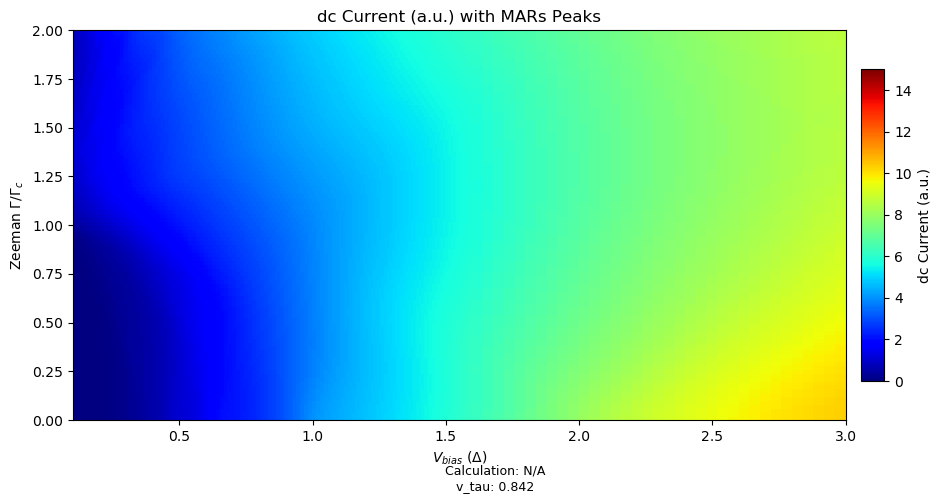

检测到的peak总数: 0
平均每个磁场值检测到 0.00 个peak


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, savgol_filter
from scipy.ndimage import gaussian_filter1d
plt.rcParams['text.usetex'] = False  # 禁用LaTeX渲染

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df

def detect_peaks_along_x(current_matrix, vbias_values, prominence_factor=0.3, width_factor=0.05):
    """
    沿着x轴检测peak位置，考虑电流单调增加和共振峰特点
    
    参数:
    current_matrix: 电流矩阵 (y轴: 磁场, x轴: 偏压)
    vbias_values: 偏压值数组
    prominence_factor: 峰值显著度因子
    width_factor: 峰值宽度因子
    """
    peak_positions = []  # 存储每个y值对应的peak的x位置
    
    num_y = current_matrix.shape[0]
    
    for i in range(num_y):
        current_profile = current_matrix[i, :]
        
        # 1. 对电流曲线进行平滑处理，减少噪声影响
        smoothed_current = savgol_filter(current_profile, window_length=5, polyorder=2)
        
        # 2. 计算一阶导数，检测斜率变化点
        derivative = np.gradient(smoothed_current)
        
        # 3. 由于电流整体单调增加，我们关注导数的局部极大值点
        # 这些点对应电流增长最快的区域，即共振峰
        
        # 设置peak检测参数（自适应）
        min_prominence = prominence_factor * np.std(smoothed_current)
        min_width = max(1, int(width_factor * len(smoothed_current)))
        
        try:
            # 在导数上找peak（对应电流曲线的拐点）
            derivative_peaks, properties = find_peaks(
                derivative, 
                prominence=min_prominence,
                width=min_width,
                height=np.percentile(derivative, 70)  # 只找较高的导数peak
            )
            
            # 对于每个导数peak，找到对应的电流peak位置
            current_peaks = []
            for deriv_peak in derivative_peaks:
                # 在导数peak附近的小窗口内找电流的最大值
                window_size = min(10, len(smoothed_current) // 20)
                start = max(0, deriv_peak - window_size)
                end = min(len(smoothed_current), deriv_peak + window_size)
                
                if end > start:
                    local_window = smoothed_current[start:end]
                    local_peak_idx = np.argmax(local_window) + start
                    current_peaks.append(local_peak_idx)
            
            # 去除重复的peak
            current_peaks = sorted(set(current_peaks))
            
            # 验证peak的有效性：peak值应该明显高于周围背景
            valid_peaks = []
            for peak_idx in current_peaks:
                if peak_idx < 5 or peak_idx > len(smoothed_current) - 5:
                    continue
                    
                # 检查peak是否显著高于局部背景
                background_left = np.mean(smoothed_current[max(0, peak_idx-10):peak_idx-2])
                background_right = np.mean(smoothed_current[peak_idx+2:min(len(smoothed_current), peak_idx+10)])
                background = (background_left + background_right) / 2
                
                peak_height = smoothed_current[peak_idx] - background
                if peak_height > min_prominence:
                    valid_peaks.append(peak_idx)
            
            peak_positions.append(valid_peaks)
            
        except Exception as e:
            # 如果peak检测失败，返回空列表
            peak_positions.append([])
    
    return peak_positions

def plot_dc_data(metadata, df, plot_choice='2d'):
    """
    CPR数据
    
    参数:
    plot_choice - '3d': 显示3D曲面图, 'ic_phi0': 显示Ic和φ0随磁场变化
    """
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    print(f"磁场点数: {len(b_values)}, 偏压点数: {len(vbias_values)}")
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 检测peak位置
    peak_positions = detect_peaks_along_x(current_matrix, vbias_values)
    
    # 创建图形
    plt.figure(figsize=(10, 5))
    gs = GridSpec(1, 2, width_ratios=[1, 0.05])
    
    # 1. 2D 热图
    ax1 = plt.subplot(gs[0, 0])
    
    # 创建网格
    vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
    X, Y = np.meshgrid(vbias_grid, b_values)
    
    # 使用pcolormesh绘制热图
    pc = ax1.pcolormesh(
        X, Y, 
        current_matrix,
        cmap='jet', 
        shading='auto',  # 使用auto以获得更好的显示效果
        vmin=0,
        vmax=15
    )

    # 在heatmap上标注peak位置（白色虚线）
    for i, peaks in enumerate(peak_positions):
        if peaks:  # 如果这个y值有检测到peak
            y_val = b_values[i]
            for peak_idx in peaks:
                if peak_idx < len(vbias_grid):
                    x_val = vbias_grid[peak_idx]
                    # 画白色虚线
                    ax1.axvline(x=x_val, ymin=0, ymax=1, color='white', 
                               linestyle='--', linewidth=1, alpha=0.7)
    
    # 设置轴标签
    ax1.set_xlabel(r'$V_{bias}~(\Delta)$')
    ax1.set_ylabel('Zeeman $\Gamma /\Gamma_c$')
    ax1.set_title('dc Current (a.u.) with MARs Peaks')
    
    # 设置x轴刻度
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(
        lambda val, pos: f'{val:.1f}' if val != 0 else '0'
    ))
    
    # 2. 根据用户选择绘制第二个面板
    if plot_choice == '3d':
        ax2 = plt.subplot(gs[0, 1], projection='3d')
        surf = ax2.plot_surface(
            X, Y, 
            current_matrix,
            cmap='viridis', 
            edgecolor='none',
            alpha=0.8
        )
        ax2.set_xlabel('Phase $~(\pi)$')
        ax2.set_ylabel('Zeeman E. (meV)')
        ax2.set_zlabel('Current (nA)')
        ax2.set_title('CPR Current (nA) - 3D Surface')
        
        # 在3D图上也标注peak
        for i, peaks in enumerate(peak_positions):
            if peaks:
                y_val = b_values[i]
                for peak_idx in peaks:
                    if peak_idx < len(vbias_grid):
                        x_val = vbias_grid[peak_idx]
                        z_val = current_matrix[i, peak_idx]
                        ax2.scatter(x_val, y_val, z_val, color='red', s=20)
    
    # 添加颜色条
    cax = ax1.inset_axes([1.02, 0.1, 0.03, 0.8])
    plt.colorbar(pc, cax=cax, orientation='vertical', label='dc Current (a.u.)')
    
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')
    save_path = f"dc_plot_vtau_{vtau}_Vdis=0.0_disorder1_inf_lead_with_peaks.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"图形已保存至: {save_path}")
    
    plt.show()
    
    # 打印peak检测统计信息
    total_peaks = sum(len(peaks) for peaks in peak_positions)
    print(f"检测到的peak总数: {total_peaks}")
    print(f"平均每个磁场值检测到 {total_peaks/len(b_values):.2f} 个peak")

# 使用示例
if __name__ == "__main__":
    file_path = "DC_IV_2D_Bs_vtau=0.842_inflead.csv"
    
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印优化后的元数据
    print("优化后的元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 可视化数据
    plot_dc_data(metadata, df)

/tmp/ipykernel_1607527/3738318373.py:186: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_curve3 = plt.subplot(gs[0, 1])
/tmp/ipykernel_1607527/3738318373.py:188: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax_curve4 = plt.subplot(gs[1, 1])
No handles with labels found to put in legend.


优化后的元数据信息:
N_SC: 1
N_junction: 2
delta: 0.3
alpha: 4.0
v_tau: 0.842
max_sidebands: 15
timestamp: 2025-09-17 18:45:01
common_timestamp: 20250917171543
disorder_type: none
calculation: DC_IV_2D
duration: 5357.874210119247
B_points: 201
B_max: 2.0
Vbias_points: 501
outer_parallel_n: 1
磁场点数: 101, 偏压点数: 186
图形已保存至: dc_plot_with_peaks_vtau_0.842.png


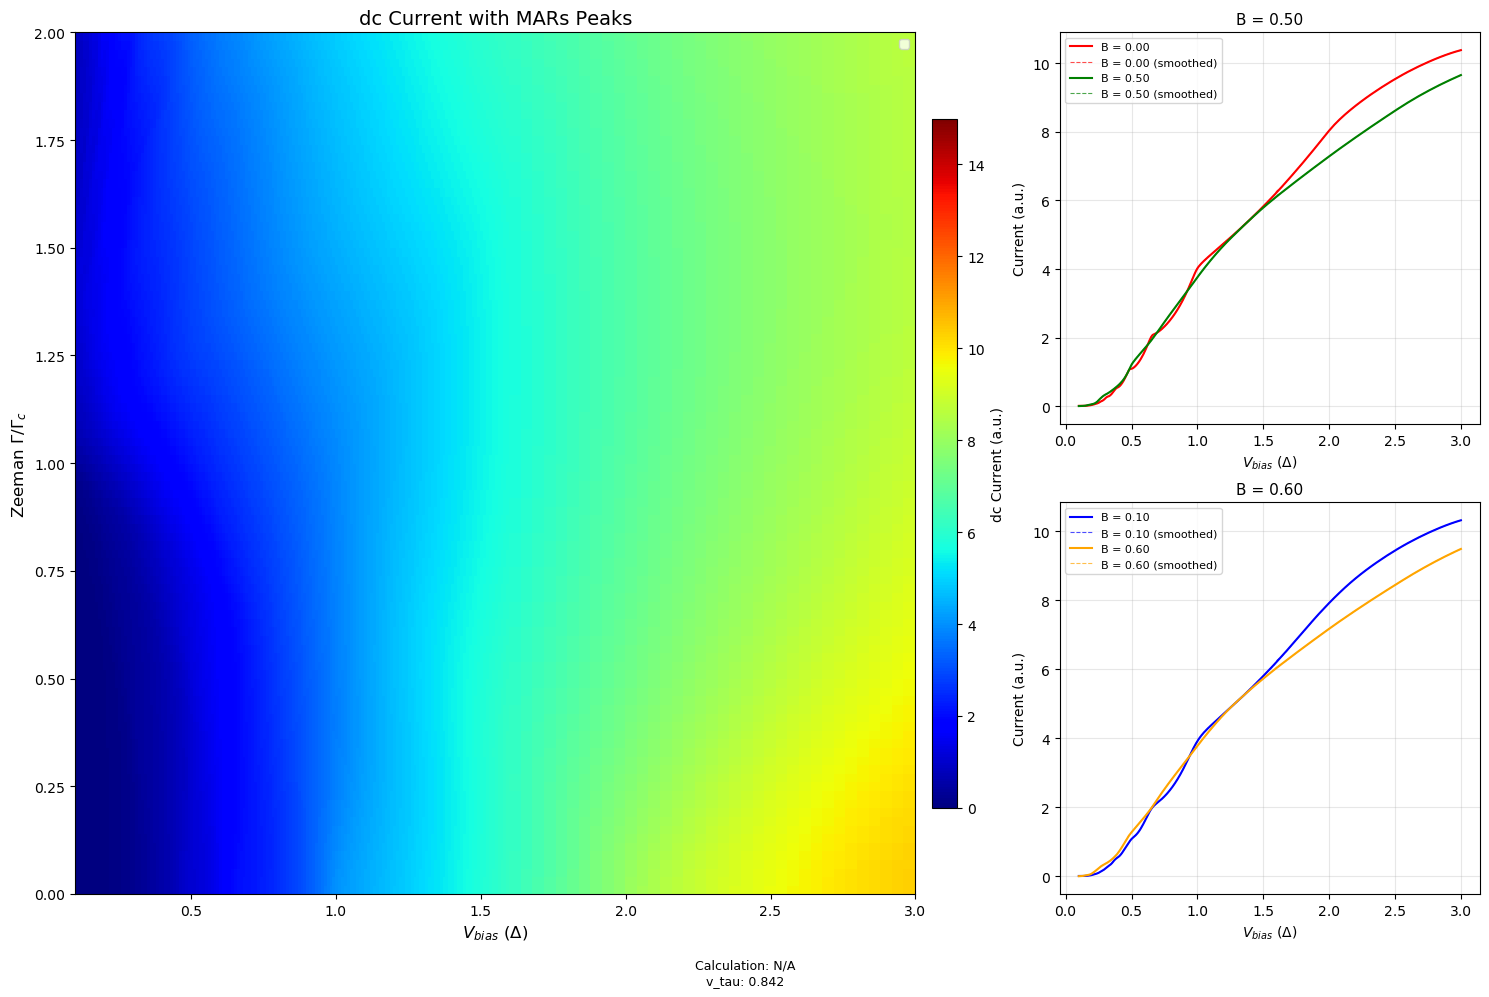

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from scipy.signal import find_peaks, savgol_filter
from scipy.ndimage import gaussian_filter1d

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df

def find_mar_peaks(current_curve, vbias_values, prominence_factor=0.1, distance=5):
    """
    专门用于检测MARs共振峰的函数
    参数:
    - current_curve: 电流曲线
    - vbias_values: 对应的偏压值
    - prominence_factor: 峰值显著性的阈值因子（相对于曲线最大值）
    - distance: 峰值之间的最小距离
    """
    # 平滑处理以减少噪声影响
    smoothed_current = savgol_filter(current_curve, window_length=7, polyorder=2)
    
    # 计算一阶导数来帮助检测峰值
    derivative = np.gradient(smoothed_current)
    
    # 设置峰值检测参数
    prominence = prominence_factor * np.max(smoothed_current)
    
    # 使用find_peaks检测峰值
    peaks, properties = find_peaks(
        smoothed_current, 
        prominence=prominence,
        distance=distance,
        width=2
    )
    
    # 过滤掉边界附近的峰值（可能不准确）
    valid_peaks = []
    for peak in peaks:
        if 10 < peak < len(current_curve) - 10:  # 避免边界效应
            valid_peaks.append(peak)
    
    return np.array(valid_peaks), smoothed_current

def plot_dc_data(metadata, df, plot_choice='2d'):
    """
    CPR数据可视化，包含MARs共振峰检测和标注
    """
    # 获取唯一B值和偏压值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    
    print(f"磁场点数: {len(b_values)}, 偏压点数: {len(vbias_values)}")
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 转换为Delta单位
    vbias_grid = vbias_values / 0.3
    
    # 创建图形布局
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])
    
    # 1. 2D 热图
    ax_heatmap = plt.subplot(gs[:, 0])
    
    # 创建网格
    X, Y = np.meshgrid(vbias_grid, b_values)
    
    # 绘制热图
    pc = ax_heatmap.pcolormesh(
        X, Y, 
        current_matrix,
        cmap='jet', 
        shading='auto',
        vmin=0,
        vmax=15
    )
    
    # 设置热图标签
    ax_heatmap.set_xlabel(r'$V_{bias}~(\Delta)$', fontsize=12)
    ax_heatmap.set_ylabel('Zeeman $\Gamma /\Gamma_c$', fontsize=12)
    ax_heatmap.set_title('dc Current with MARs Peaks', fontsize=14)
    
    # 2. 单个磁场曲线图
    target_fields = [0.0, 0.1, 0.5, 0.6]
    colors = ['red', 'blue', 'green', 'orange']
    
    # 存储所有检测到的峰值位置（用于热图标注）
    all_peak_positions = []
    
    for i, target_field in enumerate(target_fields):
        # 找到最接近目标磁场的索引
        field_idx = np.argmin(np.abs(b_values - target_field))
        actual_field = b_values[field_idx]
        
        # 获取该磁场的电流曲线
        current_curve = current_matrix[field_idx, :]
        
        # 检测MARs峰值
        peaks, smoothed_current = find_mar_peaks(current_curve, vbias_grid)
        
        # 记录峰值位置（用于热图标注）
        for peak_idx in peaks:
            peak_vbias = vbias_grid[peak_idx]
            all_peak_positions.append((actual_field, peak_vbias, current_curve[peak_idx]))
            print(f"磁场 {actual_field:.2f}: 在 V_bias = {peak_vbias:.3f}Δ 处检测到峰值, 电流值 = {current_curve[peak_idx]:.3f}")
        
        # 创建子图
        if i < 2:
            ax_curve = plt.subplot(gs[0, 1]) if i == 0 else plt.subplot(gs[1, 1])
        else:
            # 为第3、4个曲线创建新的子图区域
            if i == 2:
                ax_curve3 = plt.subplot(gs[0, 1])
            else:
                ax_curve4 = plt.subplot(gs[1, 1])
            ax_curve = ax_curve3 if i == 2 else ax_curve4
        
        # 绘制电流曲线
        ax_curve.plot(vbias_grid, current_curve, 
                     color=colors[i], 
                     linewidth=1.5, 
                     label=f'B = {actual_field:.2f}')
        
        # 绘制平滑后的曲线
        ax_curve.plot(vbias_grid, smoothed_current, 
                     color=colors[i], 
                     linewidth=0.8, 
                     alpha=0.7, 
                     linestyle='--',
                     label=f'B = {actual_field:.2f} (smoothed)')
        
        # 标注峰值点
        if len(peaks) > 0:
            ax_curve.scatter(vbias_grid[peaks], current_curve[peaks], 
                           color='white', 
                           edgecolor='black',
                           s=50, 
                           zorder=5,
                           label=f'Peaks ({len(peaks)} found)')
            
            # 添加峰值标记文本
            for j, peak_idx in enumerate(peaks):
                ax_curve.annotate(f'P{j+1}', 
                                xy=(vbias_grid[peak_idx], current_curve[peak_idx]),
                                xytext=(5, 5), 
                                textcoords='offset points',
                                fontsize=8,
                                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
        
        ax_curve.set_xlabel(r'$V_{bias}~(\Delta)$', fontsize=10)
        ax_curve.set_ylabel('Current (a.u.)', fontsize=10)
        ax_curve.set_title(f'B = {actual_field:.2f}', fontsize=11)
        ax_curve.legend(fontsize=8)
        ax_curve.grid(True, alpha=0.3)
    
    # 在热图上标注所有检测到的峰值点
    if all_peak_positions:
        peak_fields = [pos[0] for pos in all_peak_positions]
        peak_vbias = [pos[1] for pos in all_peak_positions]
        
        ax_heatmap.scatter(peak_vbias, peak_fields, 
                          color='white', 
                          edgecolor='black',
                          s=30, 
                          alpha=0.8,
                          zorder=5,
                          label='MARs Peaks')
        
        # 添加峰值走向的虚线
        # 按磁场排序并连接相邻磁场的峰值
        sorted_positions = sorted(all_peak_positions, key=lambda x: x[0])
        
        # 简单的峰值连接（可根据实际数据调整）
        for i in range(len(sorted_positions) - 1):
            if abs(sorted_positions[i+1][0] - sorted_positions[i][0]) < 0.2:  # 只连接相近磁场的峰值
                ax_heatmap.plot([sorted_positions[i][1], sorted_positions[i+1][1]],
                              [sorted_positions[i][0], sorted_positions[i+1][0]],
                              'w--', alpha=0.6, linewidth=1)
    
    ax_heatmap.legend(fontsize=9)
    
    # 添加颜色条
    cax = ax_heatmap.inset_axes([1.02, 0.1, 0.03, 0.8])
    plt.colorbar(pc, cax=cax, orientation='vertical', label='dc Current (a.u.)')
    
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')
    save_path = f"dc_plot_with_peaks_vtau_{vtau}.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"图形已保存至: {save_path}")
    
    plt.show()

# 使用示例
if __name__ == "__main__":
    file_path = "DC_IV_2D_Bs_vtau=0.842_inflead.csv"
    
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印优化后的元数据
    print("优化后的元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 可视化数据（包含峰值检测）
    plot_dc_data(metadata, df)

# plot as waterfall plot 

优化后的元数据信息:
N_SC: 1
N_junction: 2
delta: 0.3
alpha: 4.0
v_tau: 0.842
max_sidebands: 15
timestamp: 2025-09-17 18:45:01
common_timestamp: 20250917171543
disorder_type: none
calculation: DC_IV_2D
duration: 5357.874210119247
B_points: 201
B_max: 2.0
Vbias_points: 501
outer_parallel_n: 1
图形已保存至: dc_plot_vtau_0.842_Vdis=0.0_disorder1_inf_lead.png


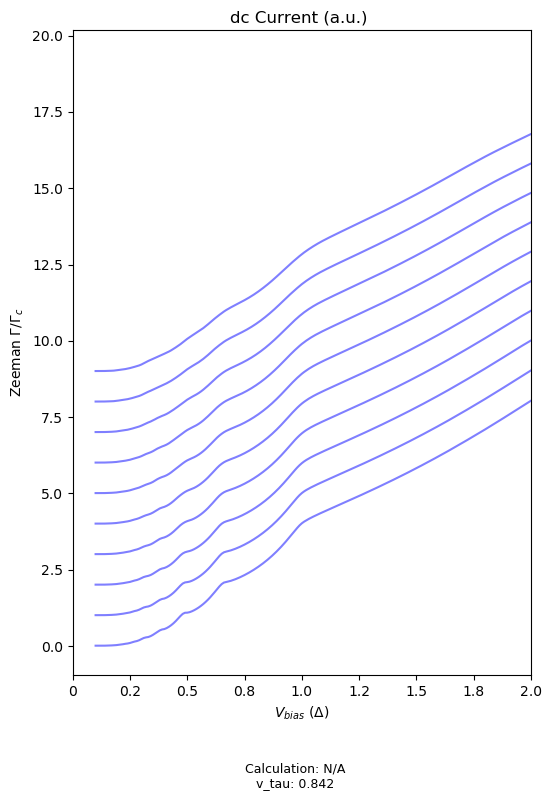

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False  # 禁用LaTeX渲染

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df


def plot_dc_data(metadata, df, plot_choice='2d'):
    """
    CPR数据
    
    参数:
    plot_choice - '3d': 显示3D曲面图, 'ic_phi0': 显示Ic和φ0随磁场变化
    ic_method - 'abs_max': 使用绝对值最大值, 'separate': 分别计算正负最大值
    save_data - 是否保存计算结果
    """
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 计算Ic和φ0
    
    # 创建图形
    plt.figure(figsize=(6, 8))
    gs = GridSpec(1, 2, width_ratios=[1, 0.05])
    
    # 1. 2D 热图 - 使用pcolor替代imshow
    ax1 = plt.subplot(gs[0, 0])
    
    # 简化网格创建
    vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
    dx0 =vbias_grid[1]-vbias_grid[0]
    dy0 = b_values[1] - b_values[0]
    X, Y = np.meshgrid( vbias_grid, b_values)

    for i0 in range(10):
        ax1.plot(vbias_grid, current_matrix[i0,:]+1*i0,'b',alpha=0.5)
    

    # 设置轴标签
    ax1.set_xlabel(r'$V_{bias}~(\Delta)$')
    ax1.set_ylabel('Zeeman $\Gamma /\Gamma_c$')
    ax1.set_title('dc Current (a.u.) ')
    
    # 设置x轴刻度为π的倍数
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(
        lambda val, pos: f'{val:.1f}' if val != 0 else '0'
    ))
    ax1.set_xlim([0,2])
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')

    save_path = f"dc_plot_vtau_{vtau}_Vdis=0.0_disorder1_inf_lead.png"
    plt.savefig(save_path, dpi=300)
    print(f"图形已保存至: {save_path}")
    
    plt.show()
    


# 使用示例
if __name__ == "__main__":
    file_path = "DC_IV_2D_Bs_vtau=0.842_inflead.csv"
    
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印优化后的元数据
    print("优化后的元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 可视化数据
    plot_dc_data(metadata, df)

优化后的元数据信息:
N_SC: 150
N_junction: 2
delta: 0.3
alpha: 4.0
v_tau: 0.882
max_sidebands: 5
timestamp: 2025-09-13 08:45:00
common_timestamp: 20250912231250
disorder_type: none
calculation: DC_IV_2D
duration: 34330.51209235191
B_points: 101
B_max: 2.0
Vbias_points: 501
绘制导数分析图...


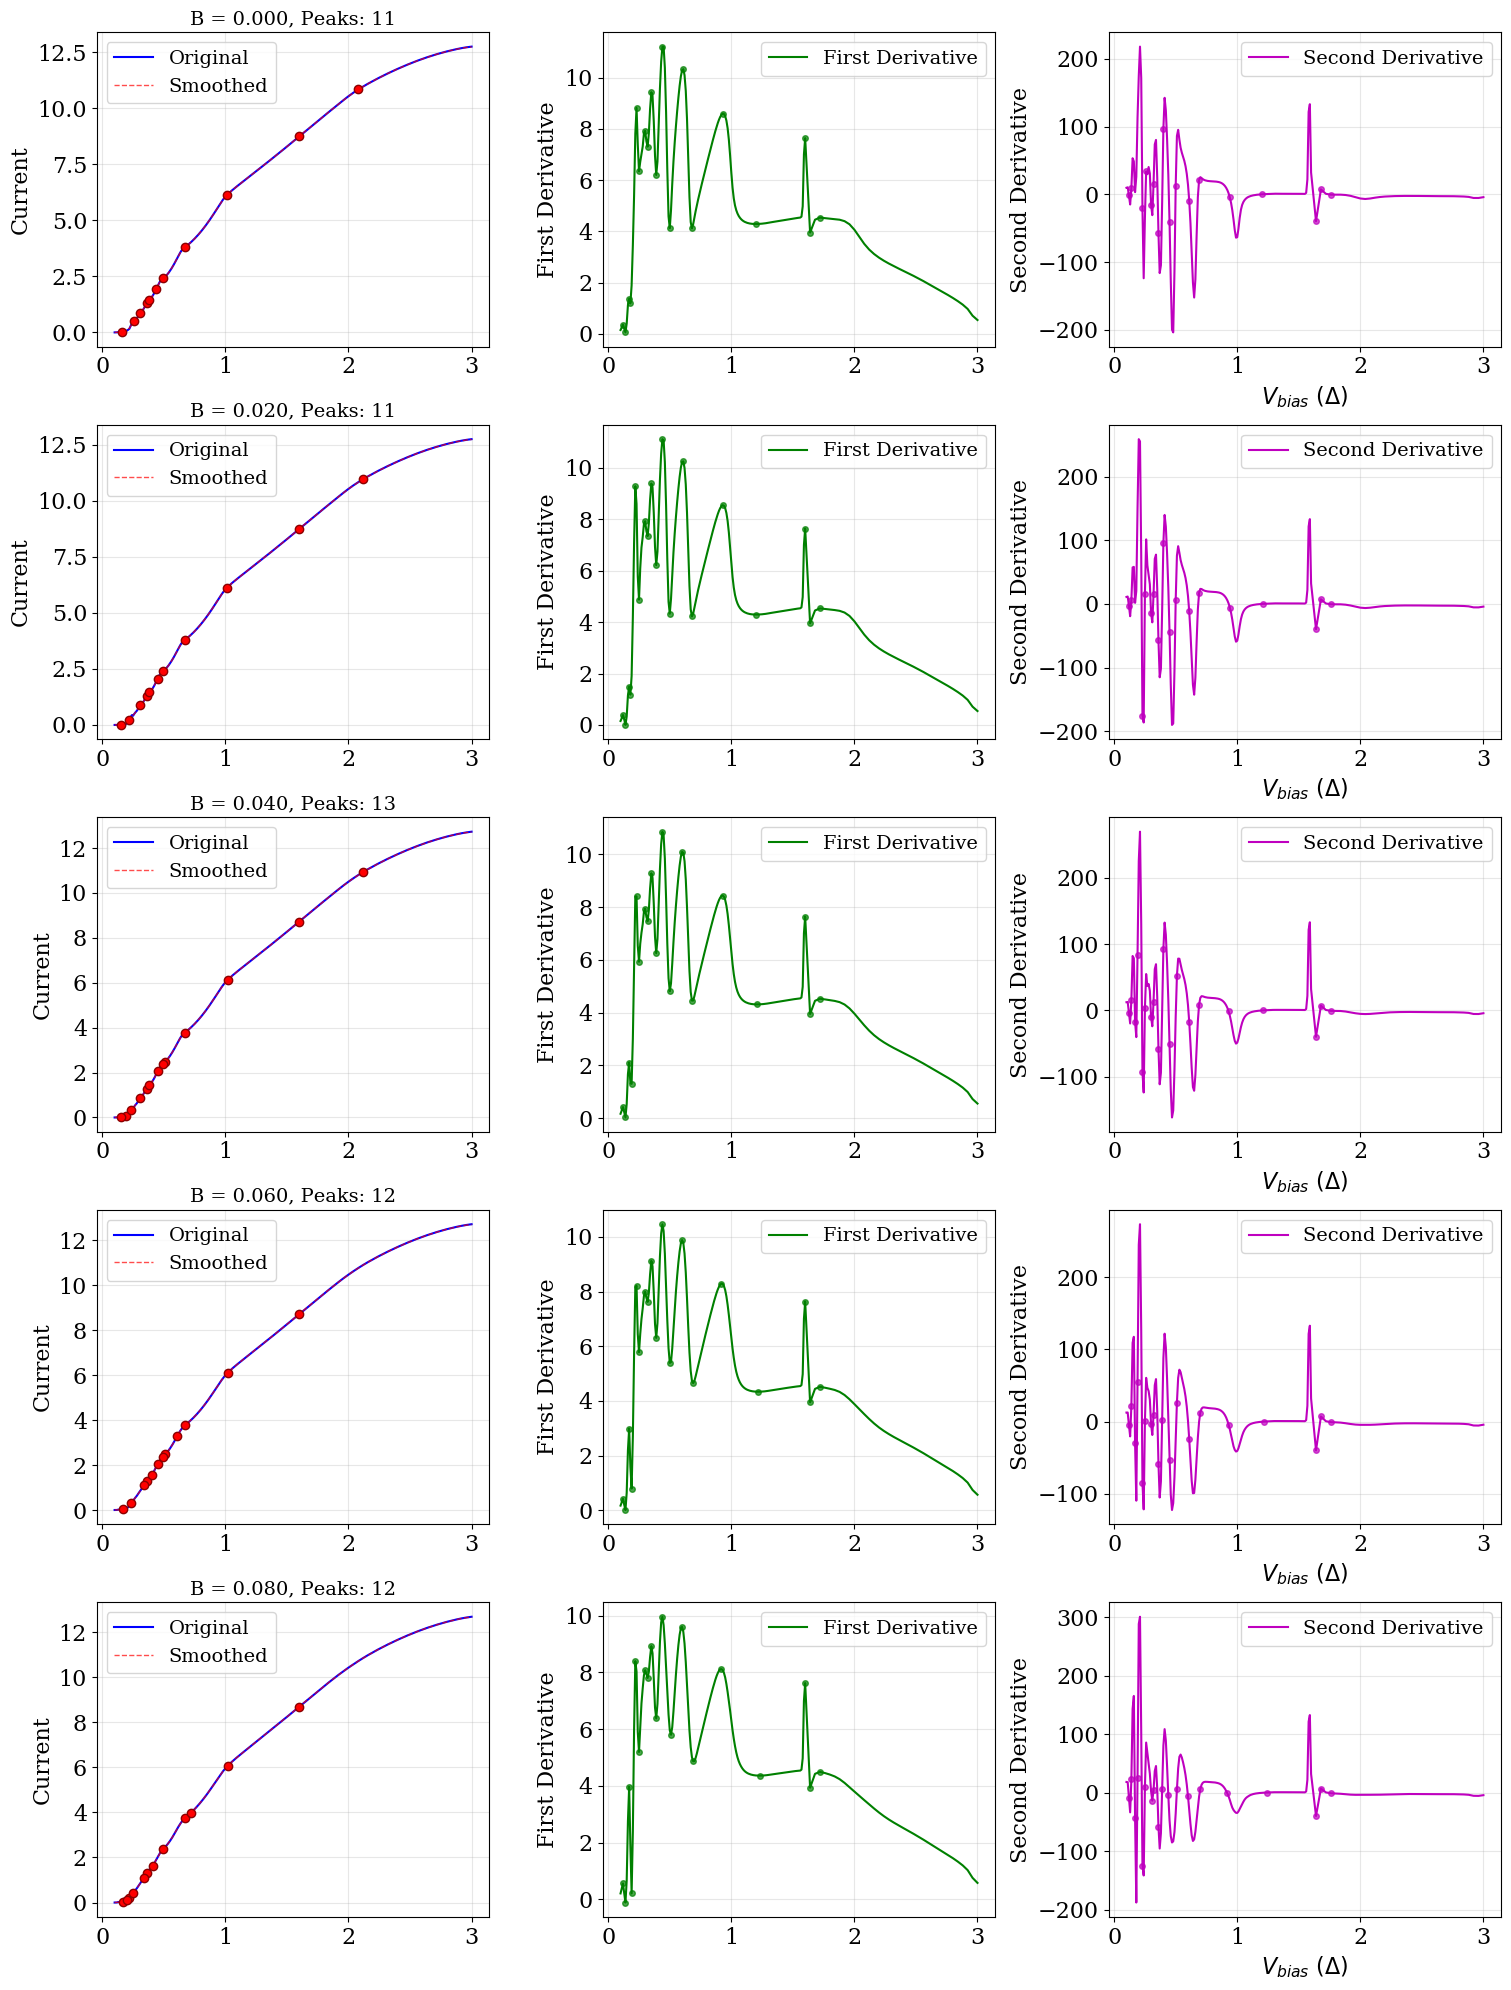

绘制主图...
图形已保存至: dc_plot_vtau_0.882_derivative_peaks.png
总共检测到 112 个峰值


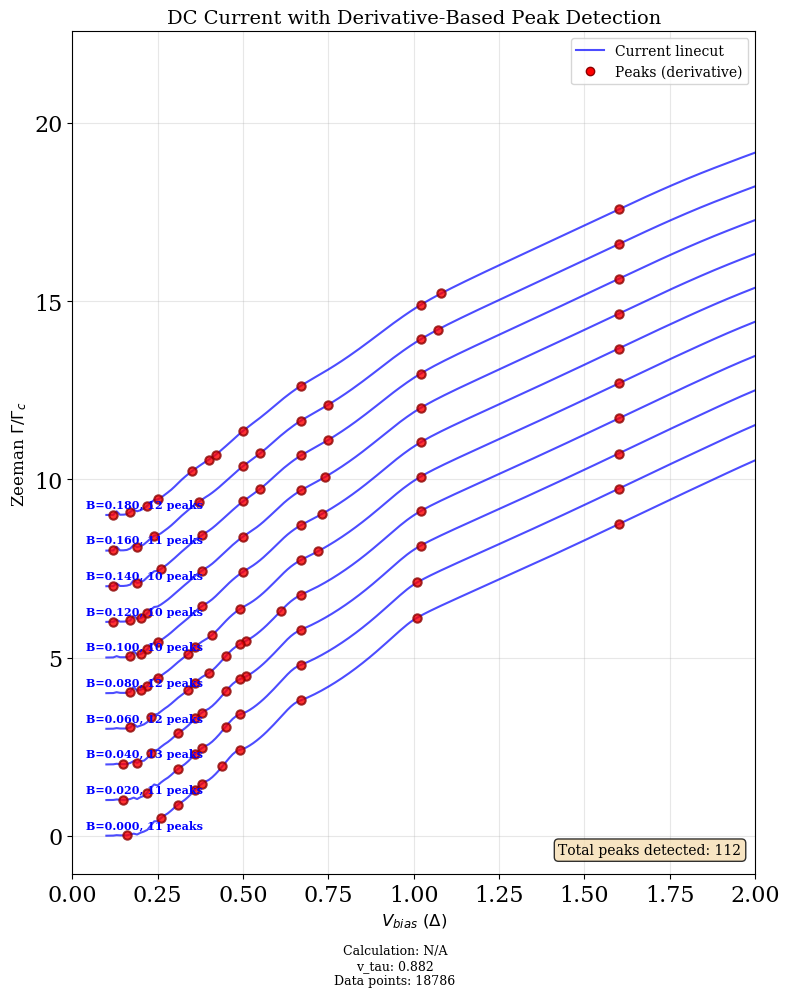

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from scipy.signal import savgol_filter, find_peaks
from scipy.ndimage import gaussian_filter1d
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False  # 禁用LaTeX渲染

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df

def find_peaks_by_derivative(current_data, vbias_grid, b_value, smooth_factor=1.0):
    """
    基于导数变化检测峰值点
    对于单调递增曲线，峰值表现为导数变化的拐点
    """
    try:
        # 平滑数据以减少噪声影响
        if len(current_data) > 5:
            smoothed_data = gaussian_filter1d(current_data, sigma=smooth_factor)
        else:
            smoothed_data = current_data
        
        # 计算一阶导数
        first_deriv = np.gradient(smoothed_data, vbias_grid)
        
        # 计算二阶导数
        second_deriv = np.gradient(first_deriv, vbias_grid)
        
        # 寻找一阶导数的极值点（二阶导数的零点）
        # 这些点对应曲线斜率变化最大的位置
        peak_candidates = []
        
        # 方法1: 寻找二阶导数的过零点（由正变负）
        for i in range(1, len(second_deriv)-1):
            if second_deriv[i-1] > 0 and second_deriv[i] <= 0:
                # 找到二阶导数由正变负的点，这是一阶导数的极大值点
                peak_candidates.append(i)
            elif second_deriv[i-1] < 0 and second_deriv[i] >= 0:
                # 找到二阶导数由负变正的点，这是一阶导数的极小值点
                # 对于单调递增曲线，这也可能是重要的特征点
                peak_candidates.append(i)
        
        # 方法2: 寻找一阶导数的局部极值点
        for i in range(1, len(first_deriv)-1):
            if (first_deriv[i] > first_deriv[i-1] and 
                first_deriv[i] > first_deriv[i+1] and
                first_deriv[i] > np.percentile(first_deriv, 70)):  # 只考虑较大的导数值
                peak_candidates.append(i)
            elif (first_deriv[i] < first_deriv[i-1] and 
                  first_deriv[i] < first_deriv[i+1] and
                  first_deriv[i] < np.percentile(first_deriv, 30)):  # 只考虑较小的导数值
                peak_candidates.append(i)
        
        # 去除重复的候选点
        peak_candidates = list(set(peak_candidates))
        peak_candidates.sort()
        
        # 筛选显著的峰值点
        significant_peaks = []
        for idx in peak_candidates:
            if idx < 2 or idx >= len(current_data)-2:
                continue
                
            # 检查导数变化是否显著
            deriv_change = abs(second_deriv[idx]) / (np.std(second_deriv) + 1e-10)
            
            # 检查电流变化是否显著
            current_change = abs(current_data[idx] - current_data[idx-1]) / (np.std(current_data) + 1e-10)
            
            # 如果导数变化或电流变化显著，则认为是有效峰值
            if deriv_change > 0.5 or current_change > 0.3:
                significant_peaks.append(idx)
        
        # 进一步筛选：确保峰值之间有足够距离
        final_peaks = []
        min_distance = max(3, int(len(vbias_grid) * 0.03))  # 至少3%的距离
        
        for idx in significant_peaks:
            if not final_peaks or (idx - final_peaks[-1]) >= min_distance:
                final_peaks.append(idx)
        
        # 转换为(vbias, current)坐标
        peaks_coords = [(vbias_grid[i], current_data[i]) for i in final_peaks]
        
        return peaks_coords
    
    except Exception as e:
        print(f"导数峰值检测错误: {e}")
        return []

def find_peaks_by_curvature_change(current_data, vbias_grid, b_value):
    """
    基于曲率变化检测峰值点
    曲率变化大的点对应曲线的拐点
    """
    try:
        # 平滑数据
        if len(current_data) > 5:
            smoothed_data = savgol_filter(current_data, 
                                         window_length=min(5, len(current_data)-2), 
                                         polyorder=2)
        else:
            smoothed_data = current_data
        
        # 计算一阶和二阶导数
        first_deriv = np.gradient(smoothed_data, vbias_grid)
        second_deriv = np.gradient(first_deriv, vbias_grid)
        
        # 计算曲率：κ = |y''| / (1 + y'²)^(3/2)
        curvature = np.abs(second_deriv) / (1 + first_deriv**2)**1.5
        
        # 计算曲率的变化率（曲率的导数）
        curvature_deriv = np.gradient(curvature, vbias_grid)
        
        # 寻找曲率变化率的极值点
        peaks = []
        for i in range(2, len(curvature_deriv)-2):
            # 曲率变化率由正变负（曲率增长放缓）
            if (curvature_deriv[i-1] > 0 and curvature_deriv[i] <= 0 and
                curvature[i] > np.percentile(curvature, 60)):  # 曲率较大
                peaks.append(i)
            # 曲率变化率由负变正（曲率开始加速增长）
            elif (curvature_deriv[i-1] < 0 and curvature_deriv[i] >= 0 and
                  curvature[i] > np.percentile(curvature, 60)):  # 曲率较大
                peaks.append(i)
        
        # 去除过于接近的点
        final_peaks = []
        min_distance = max(2, int(len(vbias_grid) * 0.03))
        
        for idx in sorted(peaks):
            if not final_peaks or (idx - final_peaks[-1]) >= min_distance:
                final_peaks.append(idx)
        
        return [(vbias_grid[i], current_data[i]) for i in final_peaks]
    
    except Exception as e:
        print(f"曲率峰值检测错误: {e}")
        return []

def plot_dc_data_with_derivatives(metadata, df):
    """
    绘制DC数据及其导数，用于可视化峰值检测过程
    """
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 转换为 Delta单位
    vbias_grid = vbias_values / 0.3
    
    # 选择前几条曲线进行详细分析
    n_curves = min(5, len(b_values))
    
    # 创建图形
    fig, axes = plt.subplots(n_curves, 3, figsize=(15, 4*n_curves))
    if n_curves == 1:
        axes = axes.reshape(1, -1)
    
    all_peaks = []
    
    for i in range(n_curves):
        b_value = b_values[i]
        current_line = current_matrix[i, :]
        
        # 平滑数据
        if len(current_line) > 5:
            smoothed = gaussian_filter1d(current_line, sigma=1.0)
        else:
            smoothed = current_line
        
        # 计算导数
        first_deriv = np.gradient(smoothed, vbias_grid)
        second_deriv = np.gradient(first_deriv, vbias_grid)
        
        # 寻找峰值
        peaks_deriv = find_peaks_by_derivative(current_line, vbias_grid, b_value)
        peaks_curvature = find_peaks_by_curvature_change(current_line, vbias_grid, b_value)
        
        # 合并峰值（去重）
        peaks = []
        peak_positions = set()
        for peak_list in [peaks_deriv, peaks_curvature]:
            for peak in peak_list:
                pos = peak[0]
                is_duplicate = False
                for existing_pos in peak_positions:
                    if abs(pos - existing_pos) < 0.02:
                        is_duplicate = True
                        break
                if not is_duplicate:
                    peaks.append(peak)
                    peak_positions.add(pos)
        
        all_peaks.append(peaks)
        
        # 绘制原始数据
        axes[i, 0].plot(vbias_grid, current_line, 'b-', linewidth=1.5, label='Original')
        axes[i, 0].plot(vbias_grid, smoothed, 'r--', linewidth=1, alpha=0.7, label='Smoothed')
        for peak_vbias, peak_current in peaks:
            axes[i, 0].plot(peak_vbias, peak_current, 'ro', markersize=6, markeredgecolor='darkred')
        axes[i, 0].set_title(f'B = {b_value:.3f}, Peaks: {len(peaks)}')
        axes[i, 0].set_ylabel('Current')
        axes[i, 0].legend()
        axes[i, 0].grid(True, alpha=0.3)
        
        # 绘制一阶导数
        axes[i, 1].plot(vbias_grid, first_deriv, 'g-', linewidth=1.5, label="First Derivative")
        # 标记一阶导数的极值点
        for j in range(1, len(first_deriv)-1):
            if (first_deriv[j] > first_deriv[j-1] and first_deriv[j] > first_deriv[j+1]) or \
               (first_deriv[j] < first_deriv[j-1] and first_deriv[j] < first_deriv[j+1]):
                axes[i, 1].plot(vbias_grid[j], first_deriv[j], 'go', markersize=4, alpha=0.7)
        axes[i, 1].set_ylabel('First Derivative')
        axes[i, 1].legend()
        axes[i, 1].grid(True, alpha=0.3)
        
        # 绘制二阶导数
        axes[i, 2].plot(vbias_grid, second_deriv, 'm-', linewidth=1.5, label="Second Derivative")
        # 标记二阶导数的过零点
        for j in range(1, len(second_deriv)-1):
            if (second_deriv[j-1] > 0 and second_deriv[j] <= 0) or \
               (second_deriv[j-1] < 0 and second_deriv[j] >= 0):
                axes[i, 2].plot(vbias_grid[j], second_deriv[j], 'mo', markersize=4, alpha=0.7)
        axes[i, 2].set_xlabel(r'$V_{bias}~(\Delta)$')
        axes[i, 2].set_ylabel('Second Derivative')
        axes[i, 2].legend()
        axes[i, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return all_peaks

def plot_dc_data(metadata, df, plot_choice='2d'):
    """
    CPR数据可视化，使用基于导数变化的峰值检测
    """
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 创建图形
    plt.figure(figsize=(8, 10))
    gs = GridSpec(1, 1)
    
    ax1 = plt.subplot(gs[0, 0])
    
    # 转换为 Delta单位
    vbias_grid = vbias_values / 0.3
    
    # 绘制前10条linecut并检测峰值
    all_peaks_count = 0
    
    for i0 in range(min(10, len(b_values))):
        b_value = b_values[i0]
        
        # 获取当前linecut的数据
        current_line = current_matrix[i0, :]
        offset_current = current_line + 1 * i0  # 添加偏移用于显示
        
        # 绘制原始曲线
        ax1.plot(vbias_grid, offset_current, 'b-', alpha=0.7, linewidth=1.5)
        
        # 使用基于导数变化的峰值检测
        peaks_deriv = find_peaks_by_derivative(current_line, vbias_grid, b_value)
        peaks_curvature = find_peaks_by_curvature_change(current_line, vbias_grid, b_value)
        
        # 合并峰值（去重）
        peaks = []
        peak_positions = set()
        for peak_list in [peaks_deriv, peaks_curvature]:
            for peak in peak_list:
                pos = peak[0]
                is_duplicate = False
                for existing_pos in peak_positions:
                    if abs(pos - existing_pos) < 0.02:
                        is_duplicate = True
                        break
                if not is_duplicate:
                    peaks.append(peak)
                    peak_positions.add(pos)
        
        # 标注检测到的峰值
        for peak_vbias, peak_current in peaks:
            # 注意：峰值点需要加上偏移量
            ax1.plot(peak_vbias, peak_current + 1 * i0, 'ro', 
                    markersize=6, markeredgewidth=1.5, 
                    markeredgecolor='darkred', alpha=0.8)
            all_peaks_count += 1
        
        # 显示当前linecut的峰值数量
        ax1.text(0.02, 1 * i0 + 0.2, f'B={b_value:.3f}, {len(peaks)} peaks', 
                fontsize=8, color='blue', weight='bold',
                transform=ax1.get_yaxis_transform(which='tick2'))

    # 设置轴标签和标题
    ax1.set_xlabel(r'$V_{bias}~(\Delta)$', fontsize=12)
    ax1.set_ylabel('Zeeman $\Gamma /\Gamma_c$', fontsize=12)
    ax1.set_title('DC Current with Derivative-Based Peak Detection', fontsize=14)
    ax1.set_xlim([0, 2])
    ax1.grid(True, alpha=0.3)
    
    # 添加图例
    ax1.plot([], [], 'b-', linewidth=1.5, alpha=0.7, label='Current linecut')
    ax1.plot([], [], 'ro', markersize=6, markeredgecolor='darkred', label='Peaks (derivative)')
    ax1.legend(loc='upper right', fontsize=10)
    
    # 添加统计信息
    ax1.text(0.98, 0.02, f'Total peaks detected: {all_peaks_count}', 
             transform=ax1.transAxes, ha='right', va='bottom',
             fontsize=10, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}\n"
        f"Data points: {len(df)}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')
    save_path = f"dc_plot_vtau_{vtau}_derivative_peaks.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"图形已保存至: {save_path}")
    print(f"总共检测到 {all_peaks_count} 个峰值")
    
    plt.show()

# 使用示例
if __name__ == "__main__":
    # file_path = "DC_IV_2D_Bs_vtau=0.842_inflead.csv"
    file_path = "DC_IV_2D_Bs_vtau=0.882.csv"
    
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印优化后的元数据
    print("优化后的元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 首先绘制详细的导数分析图
    print("绘制导数分析图...")
    all_peaks = plot_dc_data_with_derivatives(metadata, df)
    
    # 然后绘制主图
    print("绘制主图...")
    plot_dc_data(metadata, df)

元数据信息:
N_SC: 150
N_junction: 2
delta: 0.3
alpha: 4.0
v_tau: 0.882
max_sidebands: 5
timestamp: 2025-09-13 08:45:00
common_timestamp: 20250912231250
disorder_type: none
calculation: DC_IV_2D
duration: 34330.51209235191
B_points: 101
B_max: 2.0
Vbias_points: 501
检测峰值中（只处理B<1的数据）...
已处理 B=0.000，检测到 0 个峰值
已处理 B=0.100，检测到 0 个峰值
已处理 B=0.200，检测到 0 个峰值
已处理 B=0.300，检测到 1 个峰值
已处理 B=0.400，检测到 1 个峰值
已处理 B=0.500，检测到 1 个峰值
已处理 B=0.600，检测到 1 个峰值
已处理 B=0.700，检测到 4 个峰值
已处理 B=0.800，检测到 4 个峰值
已处理 B=0.900，检测到 4 个峰值
热图已保存至: dc_heatmap_vtau_0.882_MARs_peaks_Blt1.png
总共检测到 82 个MARs共振峰 (B<1)
峰值质量分布 - 高: 0, 中: 20, 低: 62
按n值统计的峰值数量:
  n=2: 15 个峰值
  n=3: 15 个峰值
  n=4: 15 个峰值
  n=6: 37 个峰值


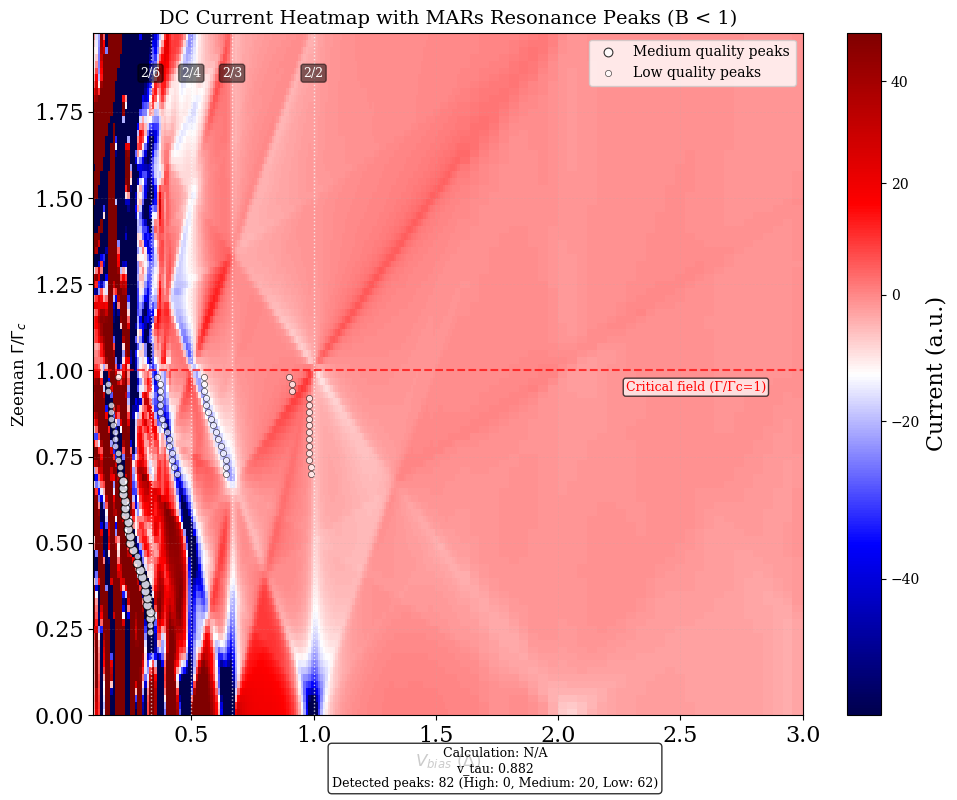

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
import matplotlib.colors as colors
plt.rcParams['text.usetex'] = False  # 禁用LaTeX渲染

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df

def get_theoretical_positions(b_value, n_values=[2, 3, 4, 6]):
    """
    根据理论预测峰值位置
    磁场为0时：peak出现在 2/n 位置
    随着磁场增大，峰值位置 ≤ 2/n
    """
    theoretical_positions = []
    
    for n in n_values:
        base_pos = 2.0 / n
        
        # 磁场增大时，峰值位置向左偏移（≤ 2/n）
        # 偏移量与磁场强度和n值相关（n越大，偏移越大）
        # 使用非线性偏移模型，磁场接近1时偏移更大
        if b_value < 0.5:
            b_effect = 0.05 * b_value * (n / 6.0)  # 低磁场时偏移较小
        else:
            # 高磁场时偏移更大，特别是接近临界磁场时
            b_effect = (0.05 + 0.15 * (b_value - 0.5)) * (n / 6.0)
        
        # 确保峰值位置不超过理论最大值且合理
        adjusted_pos = max(0.1, base_pos - b_effect)
        theoretical_positions.append((n, adjusted_pos, base_pos))  # 同时返回基础位置
    
    return theoretical_positions

def calculate_second_derivative(current_data, vbias_grid):
    """计算电流数据的二阶导数"""
    if len(current_data) < 5:
        return np.zeros_like(current_data)
    
    # 平滑数据以减少噪声
    smoothed = savgol_filter(current_data, 
                            window_length=min(7, len(current_data)-2), 
                            polyorder=3)
    
    # 计算二阶导数
    first_deriv = np.gradient(smoothed, vbias_grid)
    second_deriv = np.gradient(first_deriv, vbias_grid)
    
    return second_deriv

def adaptive_peak_criteria(b_value, base_threshold=0.2, base_deriv_threshold=0.001):
    """
    根据磁场强度自适应调整峰值检测判据
    磁场越大，判据越宽松
    """
    # 磁场接近1时，显著放宽判据
    if b_value < 0.3:
        # 低磁场，使用严格判据
        sig_threshold = base_threshold
        deriv_threshold = base_deriv_threshold
        search_radius = 0.04
    elif b_value < 0.7:
        # 中等磁场，适度放宽判据
        sig_threshold = base_threshold * 0.7
        deriv_threshold = base_deriv_threshold * 0.7
        search_radius = 0.05
    else:
        # 高磁场（接近临界磁场），显著放宽判据
        sig_threshold = base_threshold * 0.4
        deriv_threshold = base_deriv_threshold * 0.5
        search_radius = 0.06
    
    return sig_threshold, deriv_threshold, search_radius

def evaluate_peak_significance(current_data, peak_idx, window=3):
    """
    评估峰值的显著性
    检查峰值点是否比周围点有明显变化
    """
    n = len(current_data)
    if peak_idx < window or peak_idx >= n - window:
        return 0.0
    
    # 计算峰值点与周围点的对比度
    peak_val = current_data[peak_idx]
    
    # 左侧平均值
    left_vals = current_data[peak_idx-window:peak_idx]
    left_avg = np.mean(left_vals)
    
    # 右侧平均值
    right_vals = current_data[peak_idx+1:peak_idx+window+1]
    right_avg = np.mean(right_vals)
    
    # 周围点的平均值
    surround_avg = (left_avg + right_avg) / 2
    
    # 计算对比度（相对变化）
    if surround_avg > 0:
        contrast = abs(peak_val - surround_avg) / surround_avg
    else:
        contrast = abs(peak_val - surround_avg)
    
    # 计算局部标准差作为噪声水平
    local_std = np.std(current_data[peak_idx-window:peak_idx+window+1])
    
    # 信噪比
    if local_std > 0:
        snr = contrast * np.sqrt(window*2) / local_std
    else:
        snr = 0
    
    # 归一化到0-1范围
    significance = min(1.0, snr / 2.0)  # 假设SNR>2为显著
    
    return significance

def find_peaks_for_b_value(current_data, vbias_grid, b_value):
    """
    对于给定的B值，检测所有理论预测位置的峰值
    根据磁场强度自适应调整检测判据
    """
    # 只处理磁场小于1的数据
    if b_value >= 1.0:
        return []
    
    # 获取理论预测位置
    theory_positions = get_theoretical_positions(b_value)
    
    # 根据磁场强度调整检测判据
    sig_threshold, deriv_threshold, search_radius = adaptive_peak_criteria(b_value)
    
    peaks = []
    
    # 计算二阶导数
    second_deriv = calculate_second_derivative(current_data, vbias_grid)
    
    for n, theory_pos, base_pos in theory_positions:
        # 在理论位置附近搜索（考虑B增大时峰值左移，所以主要向左搜索）
        search_min = max(vbias_grid[0], theory_pos - search_radius)
        search_max = min(vbias_grid[-1], theory_pos + search_radius * 0.3)  # 向右搜索范围较小
        
        # 找到搜索范围内的数据点索引
        search_mask = (vbias_grid >= search_min) & (vbias_grid <= search_max)
        search_indices = np.where(search_mask)[0]
        
        if len(search_indices) < 3:
            continue
        
        # 在搜索范围内找到二阶导数最小的点（最负的点）
        search_second_deriv = second_deriv[search_indices]
        min_deriv_idx = np.argmin(search_second_deriv)
        candidate_idx = search_indices[min_deriv_idx]
        
        # 检查二阶导数是否足够负（表示明显的拐点）
        # 使用自适应阈值
        deriv_value = second_deriv[candidate_idx]
        if deriv_value > -deriv_threshold * np.std(current_data):
            # 如果磁场很大且拐点不够明显，但仍尝试锁定位置
            if b_value < 0.7:
                continue  # 低中等磁场，要求严格的拐点
            # 高磁场时，即使拐点不明显，只要在理论位置附近就接受
        
        # 评估峰值显著性
        significance = evaluate_peak_significance(current_data, candidate_idx)
        
        # 高磁场时，即使显著性较低也接受峰值
        if b_value >= 0.7 and significance < sig_threshold:
            # 高磁场时，如果位置接近理论预测，仍接受
            candidate_pos = vbias_grid[candidate_idx]
            pos_error = abs(candidate_pos - theory_pos) / theory_pos
            if pos_error < 0.15:  # 位置误差小于15%
                significance = sig_threshold  # 强制设为阈值水平
            else:
                continue
        
        # 检查是否接受这个峰值
        if significance >= sig_threshold:
            peak_vbias = vbias_grid[candidate_idx]
            peak_current = current_data[candidate_idx]
            
            # 根据磁场和显著性确定峰值质量
            if b_value < 0.3 and significance > 0.4:
                quality = "high"
            elif b_value < 0.7 and significance > 0.25:
                quality = "medium"
            else:
                quality = "low"
            
            peaks.append((peak_vbias, b_value, n, significance, deriv_value, quality, base_pos))
    
    return peaks

def plot_dc_heatmap_with_peaks(metadata, df):
    """
    在2D热图上用白色点标注检测到的峰值
    根据峰值质量使用不同大小的点
    """
    # 获取唯一B值和Vbias值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 转换为 Delta单位
    vbias_grid = vbias_values / 0.3
    
    # 创建图形
    plt.figure(figsize=(10, 8))
    
    # 选择适合的colormap
    cmap = plt.cm.seismic
    
    # 创建2D热图 - 只显示B<1的区域
    b_mask = b_values < 2.0
    if not np.any(b_mask):
        print("警告：没有找到B<1的数据点")
        return []
    
    b_values_filtered = b_values[b_mask]
    current_matrix_filtered = current_matrix[b_mask, :]
    
    X, Y = np.meshgrid(vbias_grid, b_values_filtered)
    first_deriv = np.gradient(current_matrix_filtered, vbias_grid, axis=1)
    second_deriv = np.gradient(first_deriv, vbias_grid,axis=1)
    
    im = plt.pcolormesh(X, Y, second_deriv, 
                       shading='none', cmap=cmap, 
                       norm=colors.PowerNorm(gamma=0.7),vmin=-50, vmax=50)
    
    # 添加颜色条
    cbar = plt.colorbar(im, label='Current (a.u.)')
    cbar.ax.tick_params(labelsize=10)
    
    # 检测所有B值（只处理B<1）的峰值
    all_peaks = []
    high_quality_peaks = []
    medium_quality_peaks = []
    low_quality_peaks = []
    
    print("检测峰值中（只处理B<1的数据）...")
    for i, b_value in enumerate(b_values):
        # 只处理B<1的数据
        if b_value >= 1.0:
            continue
            
        current_line = current_matrix[i, :]
        peaks = find_peaks_for_b_value(current_line, vbias_grid, b_value)
        all_peaks.extend(peaks)
        
        # 按质量分类峰值
        for peak in peaks:
            quality = peak[5]
            if quality == "high":
                high_quality_peaks.append(peak)
            elif quality == "medium":
                medium_quality_peaks.append(peak)
            else:
                low_quality_peaks.append(peak)
        
        # 每处理10个B值打印进度
        if i % 5 == 0:
            print(f"已处理 B={b_value:.3f}，检测到 {len(peaks)} 个峰值")
    
    # 在热图上标注峰值 - 使用不同大小表示不同质量
    # 高质量峰值 - 大白色点
    if high_quality_peaks:
        hq_vbias, hq_b, hq_n, hq_sig, hq_deriv, hq_qual, hq_base = zip(*high_quality_peaks)
        plt.scatter(hq_vbias, hq_b, 
                   c='white', s=60, 
                   edgecolors='black', linewidths=1.2,
                   alpha=0.95, marker='o', label='High quality peaks')
    
    # 中等质量峰值 - 中等白色点
    if medium_quality_peaks:
        mq_vbias, mq_b, mq_n, mq_sig, mq_deriv, mq_qual, mq_base = zip(*medium_quality_peaks)
        plt.scatter(mq_vbias, mq_b, 
                   c='white', s=40, 
                   edgecolors='black', linewidths=0.8,
                   alpha=0.8, marker='o', label='Medium quality peaks')
    
    # 低质量峰值 - 小白色点
    if low_quality_peaks:
        lq_vbias, lq_b, lq_n, lq_sig, lq_deriv, lq_qual, lq_base = zip(*low_quality_peaks)
        plt.scatter(lq_vbias, lq_b, 
                   c='white', s=20, 
                   edgecolors='black', linewidths=0.5,
                   alpha=0.7, marker='o', label='Low quality peaks')
    
    # 添加图例
    if high_quality_peaks or medium_quality_peaks or low_quality_peaks:
        plt.legend(loc='upper right', fontsize=10, framealpha=0.8)
    
    # 设置轴标签和标题
    plt.xlabel(r'$V_{bias}~(\Delta)$', fontsize=12)
    plt.ylabel('Zeeman $\Gamma /\Gamma_c$', fontsize=12)
    plt.title('DC Current Heatmap with MARs Resonance Peaks (B < 1)', fontsize=14)
    
    # 设置坐标轴范围
    plt.xlim([vbias_grid[0], vbias_grid[-1]])
    plt.ylim([b_values_filtered[0], b_values_filtered[-1]])
    
    # 添加网格
    plt.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    
    # 添加理论参考线（B=0时的理论位置）
    n_values = [2, 3, 4, 6]
    for n in n_values:
        theory_pos = 2.0 / n
        plt.axvline(x=theory_pos, color='white', linestyle=':', alpha=0.7, linewidth=1)
        plt.text(theory_pos, b_values_filtered[-1] * 0.95, f'2/{n}', 
                fontsize=9, color='white', ha='center', va='top',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.5))
    
    # 添加临界磁场线
    plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    plt.text(vbias_grid[-1] * 0.95, 0.97, 'Critical field (Γ/Γc=1)', 
            fontsize=9, color='red', ha='right', va='top',
            bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
    # 添加元数据信息和峰值统计
    total_peaks = len(all_peaks)
    hq_count = len(high_quality_peaks)
    mq_count = len(medium_quality_peaks)
    lq_count = len(low_quality_peaks)
    
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}\n"
        f"Detected peaks: {total_peaks} (High: {hq_count}, Medium: {mq_count}, Low: {lq_count})"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')
    save_path = f"dc_heatmap_vtau_{vtau}_MARs_peaks_Blt1.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"热图已保存至: {save_path}")
    print(f"总共检测到 {total_peaks} 个MARs共振峰 (B<1)")
    print(f"峰值质量分布 - 高: {hq_count}, 中: {mq_count}, 低: {lq_count}")
    
    # 打印按n值统计的峰值数量
    if all_peaks:
        n_counts = {}
        for peak in all_peaks:
            n = peak[2]
            n_counts[n] = n_counts.get(n, 0) + 1
        
        print("按n值统计的峰值数量:")
        for n in sorted(n_counts.keys()):
            print(f"  n={n}: {n_counts[n]} 个峰值")
    
    plt.show()
    
    return all_peaks

# 使用示例
if __name__ == "__main__":
    # file_path = "DC_IV_2D_Bs_vtau=0.842_inflead.csv"
    file_path = "DC_IV_2D_Bs_vtau=0.882.csv"
    
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印优化后的元数据
    print("元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 可视化数据 - 绘制2D热图并标注峰值
    peaks = plot_dc_heatmap_with_peaks(metadata, df)

优化后的元数据信息:
N_SC: 150
N_junction: 2
delta: 0.3
alpha: 4.0
v_tau: 0.882
max_sidebands: 5
timestamp: 2025-09-13 08:45:00
common_timestamp: 20250912231250
disorder_type: none
calculation: DC_IV_2D
duration: 34330.51209235191
B_points: 101
B_max: 2.0
Vbias_points: 501
图形已保存至: dc_plot_vtau_0.882_2d_Vdis=0.0_disorder1.png


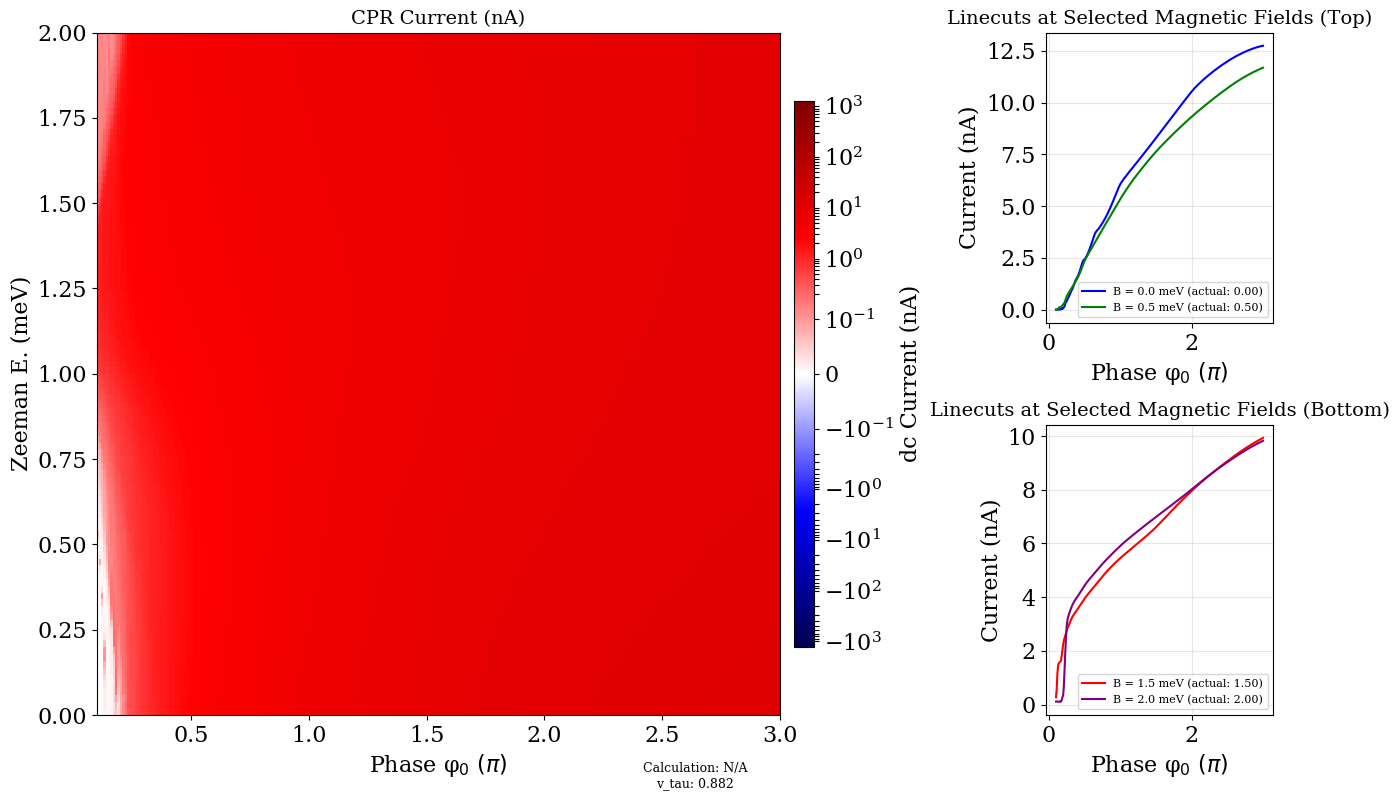

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import ast
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm, SymLogNorm
plt.rcParams['text.usetex'] = False  # 禁用LaTeX渲染

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Magnetic Field': float,
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Magnetic Field')
    
    return metadata, df


def plot_dc_data(metadata, df, plot_choice='2d'):
    """
    CPR数据可视化
    
    参数:
    plot_choice - '3d': 显示3D曲面图, '2d': 显示2D热图
    """
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 创建图形 - 增加高度以容纳线切割图
    fig = plt.figure(figsize=(14, 8))
    
    if plot_choice == '2d':
        # 创建2x2的网格布局
        gs = GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 1])
        
        # 1. 2D 热图
        ax1 = plt.subplot(gs[:, 0])
        
        # 简化网格创建
        vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
        dx0 =vbias_grid[1]-vbias_grid[0]
        dy0 = b_values[1] - b_values[0]
        X, Y = np.meshgrid(vbias_grid, b_values)
        
        # 使用对称对数归一化以突出小电流值的差异
        current_abs_max = np.max(np.abs(current_matrix))
        norm = SymLogNorm(linthresh=0.01 * current_abs_max, 
                          linscale=2, 
                          vmin=-current_abs_max*100, 
                          vmax=current_abs_max*100)
        
        # 使用pcolormesh绘制热图
        pc = ax1.pcolormesh(
            X, Y, current_matrix, 
            #np.gradient(current_matrix,dx0,axis=1), #current_matrix,  
            cmap='seismic',  # 使用红蓝 diverging colormap，能更好显示正负值
            norm=norm,      # 使用对称对数归一化
            shading='none'  # 自动选择最佳着色方式
        )
        
        # 设置轴标签
        ax1.set_xlabel('Phase φ$_0~(\pi)$')
        ax1.set_ylabel('Zeeman E. (meV)')
        ax1.set_title('CPR Current (nA)')
        
        # 设置x轴刻度为π的倍数
        ax1.xaxis.set_major_formatter(plt.FuncFormatter(
            lambda val, pos: f'{val:.1f}' if val != 0 else '0'
        ))
        
        # 添加颜色条
        cax = ax1.inset_axes([1.02, 0.1, 0.03, 0.8])
        cbar = plt.colorbar(pc, cax=cax, orientation='vertical', label='dc Current (nA)')
        
        # 2. 线切割图 - 选择特定磁场值
        selected_Bs = [0.0, 0.5, 1.5, 2.0]  # 单位: meV
        
        # 创建线切割子图
        ax2 = plt.subplot(gs[0, 1])
        ax3 = plt.subplot(gs[1, 1])
        
        # 找到最接近的磁场值
        closest_Bs = [b_values[np.abs(b_values - B).argmin()] for B in selected_Bs]
        
        # 绘制线切割
        colors = ['blue', 'green', 'red', 'purple']
        for i, (target_B, closest_B, color) in enumerate(zip(selected_Bs, closest_Bs, colors)):
            # 获取该磁场下的电流数据
            b_idx = np.where(b_values == closest_B)[0][0]
            current_at_B = current_matrix[b_idx, :]
            
            # 选择子图 (前两个在上方，后两个在下方)
            ax = ax2 if i < 2 else ax3
            
            # 绘制线切割
            ax.plot(vbias_grid, current_at_B, color=color, 
                   label=f'B = {target_B} meV (actual: {closest_B:.2f})', linewidth=1.5)
            
            # 设置子图属性
            ax.set_xlabel('Phase φ$_0~(\pi)$')
            ax.set_ylabel('Current (nA)')
            ax.legend(loc='best', fontsize=8)
            ax.grid(True, alpha=0.3)
            
            # 为小电流值设置更精细的y轴刻度
            if np.max(np.abs(current_at_B)) < 0.1:
                ax.yaxis.set_major_locator(plt.MaxNLocator(5))
        
        # 设置子图标题
        ax2.set_title('Linecuts at Selected Magnetic Fields (Top)')
        ax3.set_title('Linecuts at Selected Magnetic Fields (Bottom)')
        
    elif plot_choice == '3d':
        # 3D图单独显示
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        # 简化网格创建
        vbias_grid = vbias_values / 0.3  # 转换为 Delta单位
        X, Y = np.meshgrid(vbias_grid, b_values)
        
        # 使用对称对数归一化
        current_abs_max = np.max(np.abs(current_matrix))
        norm = SymLogNorm(linthresh=0.01 * current_abs_max, 
                          linscale=1, 
                          vmin=-current_abs_max*0, 
                          vmax=current_abs_max)
        
        # 绘制3D表面
        surf = ax.plot_surface(
            X, Y, 
            current_matrix,
            cmap='jet',
            norm=norm,
            edgecolor='none',
            antialiased=True,
            rstride=1,  # 减少行跨度以提高分辨率
            cstride=1   # 减少列跨度以提高分辨率
        )
        
        ax.set_xlabel('Phase $~(\pi)$')
        ax.set_ylabel('Zeeman E. (meV)')
        ax.set_zlabel('Current (nA)')
        ax.set_title('CPR Current (nA) - 3D Surface')
        
        # 添加颜色条
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20, label='dc Current (nA)')
    
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')
    save_path = f"dc_plot_vtau_{vtau}_{plot_choice}_Vdis=0.0_disorder1.png"
    plt.savefig(save_path, dpi=300)
    print(f"图形已保存至: {save_path}")
    
    plt.show()
    

# 使用示例
if __name__ == "__main__":
    # file_path = "DC_IV_2D_Bs_vtau=0.750_inflead.csv"
    file_path = "DC_IV_2D_Bs_vtau=0.882.csv"
    # 读取数据 
    metadata, df = read_dc_data(file_path)
    
    # 打印优化后的元数据
    print("优化后的元数据信息:")
    for key, value in metadata.items():
        print(f"{key}: {value}")
    
    # 可视化数据 - 默认显示2D图+线切割
    plot_dc_data(metadata, df, plot_choice='2d')
    
    # 如果需要显示3D图，取消下面注释
    # plot_dc_data(metadata, df, plot_choice='3d')

## DC panel test

/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-

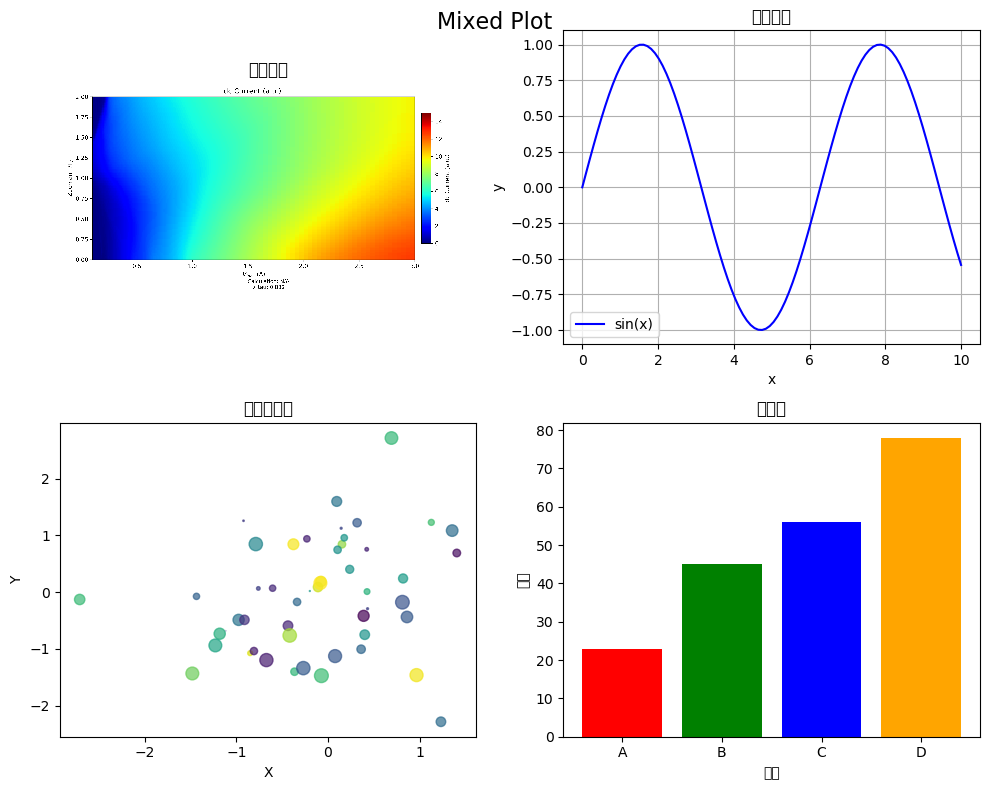

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 创建图形和子图布局
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Mixed Plot', fontsize=16)

# 第一个子图：读取并显示图片
# 替换 'your_image_path.jpg' 为你的实际图片路径
img = mpimg.imread('your_image_path.png')
axes[0, 0].imshow(img)
axes[0, 0].set_title('图片展示')
axes[0, 0].axis('off')  # 隐藏坐标轴

# 第二个子图：折线图
x = np.linspace(0, 10, 100)
y = np.sin(x)
axes[0, 1].plot(x, y, 'b-', label='sin(x)')
axes[0, 1].set_title('正弦函数')
axes[0, 1].set_xlabel('x')
axes[0, 1].set_ylabel('y')
axes[0, 1].legend()
axes[0, 1].grid(True)

# 第三个子图：散点图
x_scatter = np.random.randn(50)
y_scatter = np.random.randn(50)
colors = np.random.rand(50)
sizes = 100 * np.random.rand(50)
axes[1, 0].scatter(x_scatter, y_scatter, c=colors, s=sizes, alpha=0.7)
axes[1, 0].set_title('随机散点图')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('Y')

# 第四个子图：柱状图
categories = ['A', 'B', 'C', 'D']
values = [23, 45, 56, 78]
axes[1, 1].bar(categories, values, color=['red', 'green', 'blue', 'orange'])
axes[1, 1].set_title('柱状图')
axes[1, 1].set_xlabel('类别')
axes[1, 1].set_ylabel('数值')

# 调整布局以避免重叠
plt.tight_layout()

# 显示图形
plt.show()

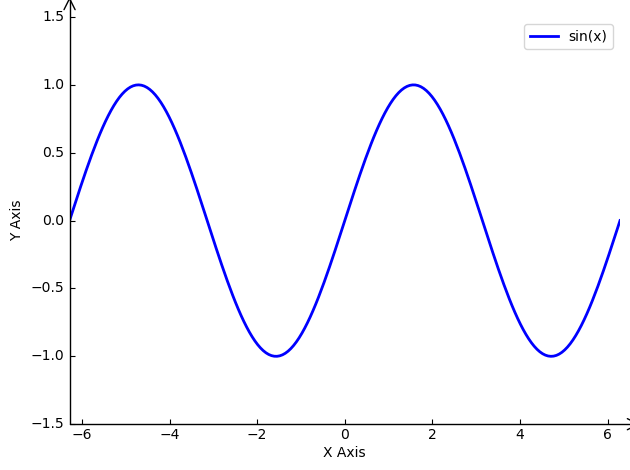

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero
import numpy as np

# 创建图形和子图
fig = plt.figure()
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

# 隐藏所有默认的坐标轴
for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

# 手动创建并设置我们需要的坐标轴，并设置箭头样式
# 尝试不同的箭头样式，例如 "->", "-|>", "->-, width=1.5" 等
# ax.axis["x"] = ax.new_floating_axis(0, 0)
ax.axis["bottom"].set_axisline_style("->", size=2.0)  # 修改箭头样式和大小
ax.axis["bottom"].set_visible(True)
ax.axis["bottom"].label.set_text("X Axis")

# ax.axis["y"] = ax.new_floating_axis(1, 0)"
ax.axis["left"].set_axisline_style("->", size=2.0)  # 修改箭头样式和大小
ax.axis["left"].set_visible(True)
ax.axis["left"].label.set_text("Y Axis")

# 生成一些示例数据并绘图
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.sin(x)
ax.plot(x, y, label='sin(x)', color='blue', linewidth=2)

# 设置坐标轴范围
ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-1.5, 1.5)

# 添加标题和图例
# ax.set_title("Customized Axis with Different Arrow Styles", fontsize=14)
ax.legend(loc='upper right')

# 显示图形
plt.tight_layout()
plt.show()

# Fig 1, panel for DC current 

In [62]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import pandas as pd
import csv


from mpl_toolkits.axisartist.axislines import SubplotZero


# 创建图形和子图
fig = plt.figure()



# 手动创建并设置我们需要的坐标轴，并设置箭头样式
# 尝试不同的箭头样式，例如 "->", "-|>", "->-, width=1.5" 等
# ax.axis["x"] = ax.new_floating_axis(0, 0)
ax.axis["bottom"].set_axisline_style("->", size=2.0)  # 修改箭头样式和大小
ax.axis["bottom"].set_visible(True)
ax.axis["bottom"].label.set_text("X Axis")

# ax.axis["y"] = ax.new_floating_axis(1, 0)"
ax.axis["left"].set_axisline_style("->", size=2.0)  # 修改箭头样式和大小
ax.axis["left"].set_visible(True)
ax.axis["left"].label.set_text("Y Axis")

# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }



def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df


def plot_dc_data_line():
    """
    DC-IV数据

    """  
    # 创建图形
    plt.figure(figsize=(10, 5))
    gs = GridSpec(1, 2, width_ratios=[1, 0.05])

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    colors = ['k','b','r','m']
    # 1. line plot
    ax1 = plt.subplot(gs[0, 0])
    for i0, vtau0 in enumerate(vtaus):
        
        file_path = f"DC_adaptive=True_B=0_Vdis=0.0_Vtau={vtau0:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        # 使用pcolormesh绘制热图 (兼容性更好)
        if i0==0:
            ax1.plot(df['Bias Voltage'].values/0.3, 10*df['Current'].values,
                     linestyles[i0], color=colors[i0], linewidth=3)
        else:                
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values,
                         linestyles[i0], color=colors[i0], linewidth=3)
    
    # 设置轴标签
    ax1.set_xlabel(r'$V_{bias}~(\Delta)$')
    ax1.set_ylabel('Zeeman $\Gamma /\Gamma_c$')
    # ax1.set_title('dc Current (a.u.) ')
    
    # 设置x轴刻度为π的倍数
    ax1.xaxis.set_major_formatter(plt.FuncFormatter(
        lambda val, pos: f'{val:.1f}' if val != 0 else '0'
    ))
        
    # 添加元数据信息
    metadata_text = (
        f"Calculation: {metadata.get('Calculation', 'N/A')}\n"
        f"v_tau: {metadata.get('v_tau', 'N/A')}"
    )
    plt.figtext(0.5, 0.01, metadata_text, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)
    
    # 保存图形
    vtau = metadata.get('v_tau', 'unknown')

    # save_path = f"dc_plot_4vtaus_B=0_Vdis=0.0_disorder1_v0.png"
    # plt.savefig(save_path, dpi=300)
    # print(f"图形已保存至: {save_path}")
    
    plt.show()
    


# 使用示例
if __name__ == "__main__":
    plot_config = set_plotting_style()
    # file_path0 = "DC_adaptive=True_B=0_Vdis=0.0_Vtau=0.338_disorder1.csv"
    # # 读取数据 
    # metadata, df = read_dc_data(file_path)
    
    # 可视化数据
    plot_dc_data_line()

RuntimeError: latex was not able to process the following string:
b'v_tau: 1.0'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/zengcc/.cache/matplotlib/tex.cache/ccec388b475650a163333151a83b8965.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file ccec388b475650a163333151a83b8965.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{9.000000}{11.250000}{\rmfamily v_
                                                tau: 1.0}
No pages of output.
Transcript written on ccec388b475650a163333151a83b8965.log.




<Figure size 1000x500 with 1 Axes>

In [4]:
## import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import pandas as pd
import csv


def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1
    height = 0.64 * width*1
    fig = plt.figure(figsize=(width, height))

        
    gs = GridSpec(1, 3, width_ratios=[0.05,1, 0.05],wspace=0.1)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    

    # ======================
    # Panel 3: CPR curves
    # ======================
    ax1 = fig.add_subplot(gs[0, 1])
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    for vtau0 in vtaus:

        file_path = f"DC_adaptive=True_B=0_Vdis=0.0_Vtau={vtau0:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        if vtau0 == 0.338:
            ax1.plot(df['Bias Voltage'].values/0.3, 15*df['Current'].values,
                        '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])
        else:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values,
                        '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])
        
    # 设置轴标签
    ax1.set_xlabel(r'$\boldsymbol{V_{dis}/V_0}$', fontsize=sizes['label'])
    ax1.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # 设置刻度
    ax1.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax1.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax1.set_yticks([0,0.5,1.0])
    ax1.set_yticklabels([r"\bf{0.0}",r"\bf{0.5}",r"\bf{1.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax2.axvline(x=1, ymin=-3, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # ax2.axhline(y=0, xmin=0, xmax=2, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    ax1.legend(loc='upper right', 
              title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
              title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
              **legend_settings)


    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

ValueError: Key text.latex.preamble: Could not convert ['\\usepackage{amsmath}'] to str

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/combined_plot_4panels.png


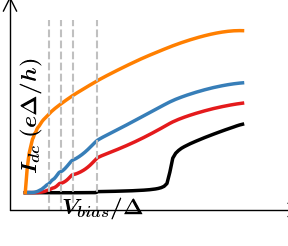

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 添加axisartist导入
from mpl_toolkits.axisartist.axislines import SubplotZero

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

import pandas as pd
import ast  # 添加ast模块用于解析字面量

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'out',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1
    height = 0.64 * width*1
    fig = plt.figure(figsize=(width, height))

    gs = GridSpec(1, 3, width_ratios=[0.05,1, 0.05],wspace=0.1)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 3: CPR curves - 使用axisartist创建带箭头的坐标轴
    # ======================
    # 创建SubplotZero而不是常规子图
    
    ax1 = SubplotZero(fig, gs[0, 1])
    fig.add_subplot(ax1)
    
    # ax1 = fig.add_subplot(gs[0, 1])
    
    # 隐藏所有默认的坐标轴
    for direction in ["left", "right", "bottom", "top"]:
        ax1.axis[direction].set_visible(False)
    
    # 创建并设置我们需要的坐标轴，并设置箭头样式
        # 设置坐标轴范围，确保原点在最小值位置
    x_min, x_max =-0.2,3.5
    y_min, y_max = -2,20
    
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    
    ax1.axis["x"] = ax1.new_floating_axis(0, y_min)
    ax1.axis["x"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    ax1.axis["x"].set_visible(True)
    
    ax1.axis["y"] = ax1.new_floating_axis(1, x_min)
    ax1.axis["y"].set_axisline_style("->", size=1.5)  # y轴箭头样式
    ax1.axis["y"].set_visible(True)
    
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    for vtau0 in vtaus:
        file_path = f"DC_adaptive=True_B=0_Vdis=0.0_Vtau={vtau0:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        if vtau0 == 0.338:
            ax1.plot(df['Bias Voltage'].values/0.3, 15*df['Current'].values,
                        '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])
        else:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values,
                        '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])

    ax1.axvline(x=0.3/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.5)
    ax1.axvline(x=0.15/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.5)
    # ax1.axvline(x=0.6/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.5)

    ax1.axvline(x=2/3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.5)
    ax1.axvline(x=1/3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.5)
    
    # 设置轴标签

    # ax1.axis["x"].label.set_pad(15)  # 增加与轴的距离
    # ax1.axis["x"].major_ticks.set_tick_out(True)  # 将刻度线向外
    
    ax1.axis["x"].label.set_position((3.0, 0))  # 位置参数(x, y)相对于轴的长度
    ax1.axis["x"].label.set_horizontalalignment('right')
    ax1.axis["x"].label.set_verticalalignment('bottom')
    ax1.axis["x"].label.set_text(r'$\boldsymbol{V_{bias}/\Delta}$')
    ax1.axis["x"].label.set_fontsize(sizes['label'])
      
    ax1.axis["y"].label.set_text(r'$\boldsymbol{I_{dc}~(e\Delta/h)}$')
    ax1.axis["y"].label.set_fontsize(sizes['label'])
    # ax1.axis["y"].major_ticklabels.set_pad(-2)
    
    # 将y轴标签位置调整到y轴顶端（箭头附近）
    # ax1.axis["y"].label.set_pad(15)  # 增加与轴的距离
    ax1.axis["y"].major_ticks.set_tick_out(False)  # 将刻度线向外
    
    # 设置刻度
    ax1.set_xticks([0,  1.0, 2.0, 3.0])
    ax1.set_xticklabels([r"",  r"\bf{1.0}", r"\bf{2.0}", r"\bf{3.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    # 添加图例
    # ax1.legend(loc='upper right', 
    #           title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
    #           title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
    #           **legend_settings)

    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

Directory already exists: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection


/var/folders/sx/8zcff90529g69ly3gjnfhzgr0000gn/T/ipykernel_41855/1549510249.py:333: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax1.grid(**grid_settings)


Plot saved to: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection/combined_plot_4panels_dc_v1.png


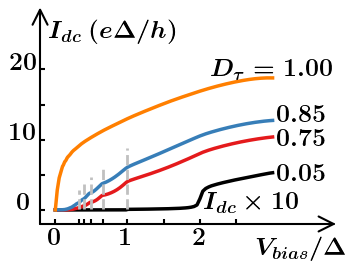

In [6]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 添加axisartist导入
from mpl_toolkits.axisartist.axislines import SubplotZero

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

import pandas as pd
import ast  # 添加ast模块用于解析字面量

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
    
    # 字体大小设置
    label_size = 18
    title_size = 14
    legend_size = 18
    tick_size = 18
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1
    height = 0.64 * width*1
    fig = plt.figure(figsize=(width, height))

    gs = GridSpec(1, 3, width_ratios=[0.05,1, 0.05],wspace=0.1)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 3: CPR curves - 使用axisartist创建带箭头的坐标轴
    # ======================
    # 创建SubplotZero而不是常规子图
    ax1 = SubplotZero(fig, gs[0, 1])
    fig.add_subplot(ax1)
    
    # 隐藏所有默认的坐标轴
    for direction in ["left", "right", "bottom", "top"]:
        ax1.axis[direction].set_visible(False)
    
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []
    
    for vtau0 in vtaus:
        file_path = f"DC_adaptive=True_B=0_Vdis=0.0_Vtau={vtau0:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        
        x_data = df['Bias Voltage'].values/0.3
        if vtau0 == 0.338:
            y_data = 10*df['Current'].values
        else:
            y_data = df['Current'].values
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax1.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])

    ax1.axvline(x=2/2, ymin=0.08, ymax=0.4, linestyle='--',color='silver', linewidth=2.0)
    ax1.axvline(x=2/4, ymin=0.08, ymax=0.25, linestyle='--',color='silver', linewidth=2.0)
    # ax1.axvline(x=0.6/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.0)

    ax1.axvline(x=2/3, ymin=0.08, ymax=0.3, linestyle='--',color='silver', linewidth=2.0)
    ax1.axvline(x=2/5, ymin=0.08, ymax=0.22, linestyle='--',color='silver', linewidth=2.0)
    ax1.axvline(x=2/6, ymin=0.08, ymax=0.18, linestyle='--',color='silver', linewidth=2.0)
    
    # 计算数据范围
    x_min, x_max = -0.2,3.5
    y_min, y_max = -2,25
    
    # 设置坐标轴范围，确保原点在最小值位置
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax1.axis["x"] = ax1.new_floating_axis(0, y_min)  # x轴位于y_min位置
    ax1.axis["x"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    ax1.axis["x"].set_visible(True)
    ax1.axis["x"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    ax1.axis["y"] = ax1.new_floating_axis(1, x_min)  # y轴位于x_min位置
    ax1.axis["y"].set_axisline_style("->", size=1.5)  # y轴箭头样式
    ax1.axis["y"].set_visible(True)
    
    # 关键修改：将Y轴刻度标签位置调整到左侧（图外侧）
    ax1.axis["y"].major_ticks.set_tick_out(False)  # 确保刻度线朝内
    ax1.axis["y"].set_ticklabel_direction('-')  # 负号表示标签在轴的左侧
    ax1.axis["y"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    # 设置轴标签
    # ax1.axis["x"].label.set_text(r'$\boldsymbol{V_{dis}/V_0}$')
    # ax1.axis["x"].label.set_fontsize(sizes['label'])
    
    # ax1.axis["y"].label.set_text(r'$\boldsymbol{I_c~(e\Delta/h)}$')
    # ax1.axis["y"].label.set_fontsize(sizes['label'])
    ax1.axis["y"].major_ticklabels.set_rotation(90)  # 设置刻度标签水平显示
    ax1.axis["y"].major_ticklabels.set_pad(0)  # 调整标签与轴的距离，根据需要调整数值


    # 设置轴标签
    # 手动设置标签位置 - 你可以根据需要调整这些值
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    ax1.text(3.4, -5.5, r'$\boldsymbol{V_{bias}/\Delta}$', 
             fontsize=sizes['label'], ha='center', va='center')
    
    ax1.text(0.8, 25.5, r'$\boldsymbol{I_{dc}~(e\Delta/h)}$', 
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    
    # 设置刻度
    ax1.set_xticks([0,1/3, 2/5,0.5, 2/3,1.0, 1.5, 2.0,2.5])
    ax1.set_xticklabels([r"\bf{0}", r"", r"", r"",r"",r"\bf{1}", r"", r"\bf{2}", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax1.set_yticks([0,5,10,15,20])
    ax1.set_yticklabels([r"\bf{0}",r"",r"\bf{10}",r"",r"\bf{20}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    # 添加图例
    # ax1.legend(loc='upper right', 
    #           title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
    #           title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
    #           **legend_settings)
    ax1.text(3.0, 20, r'$\boldsymbol{D_{\tau} = 1.00 }$', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax1.text(3.4, 13.5, r'$\boldsymbol{0.85} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax1.text(3.4, 10, r'$\boldsymbol{0.75} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax1.text(3.4, 5, r'$\boldsymbol{0.05} $', 
             fontsize=sizes['legend'], ha='center', va='center')

    ax1.text(2.7, 1.0, r'$\boldsymbol{I_{dc} \times 10} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels_dc_v1.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/combined_plot_4panels_dc_v1.png


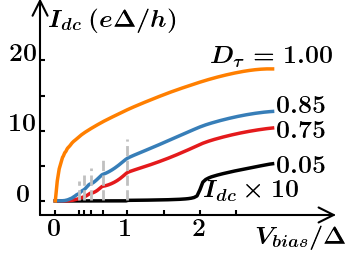

In [227]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 添加axisartist导入
from mpl_toolkits.axisartist.axislines import SubplotZero

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

import pandas as pd
import ast  # 添加ast模块用于解析字面量

def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 18
    title_size = 14
    legend_size = 18
    tick_size = 18
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1
    height = 0.64 * width*1
    fig = plt.figure(figsize=(width, height))

    gs = GridSpec(1, 3, width_ratios=[0.05,1, 0.05],wspace=0.1)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 3: CPR curves - 使用axisartist创建带箭头的坐标轴
    # ======================
    # 创建SubplotZero而不是常规子图
    ax1 = SubplotZero(fig, gs[0, 1])
    fig.add_subplot(ax1)
    
    # 隐藏所有默认的坐标轴
    for direction in ["left", "right", "bottom", "top"]:
        ax1.axis[direction].set_visible(False)
    
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []
    
    for vtau0 in vtaus:
        file_path = f"DC_adaptive=True_B=0_Vdis=0.0_Vtau={vtau0:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        
        x_data = df['Bias Voltage'].values/0.3
        if vtau0 == 0.338:
            y_data = 10*df['Current'].values
        else:
            y_data = df['Current'].values
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax1.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])

    ax1.axvline(x=2/2, ymin=0.08, ymax=0.4, linestyle='--',color='silver', linewidth=2.0)
    ax1.axvline(x=2/4, ymin=0.08, ymax=0.25, linestyle='--',color='silver', linewidth=2.0)
    # ax1.axvline(x=0.6/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.0)

    ax1.axvline(x=2/3, ymin=0.08, ymax=0.3, linestyle='--',color='silver', linewidth=2.0)
    ax1.axvline(x=2/5, ymin=0.08, ymax=0.22, linestyle='--',color='silver', linewidth=2.0)
    ax1.axvline(x=2/6, ymin=0.08, ymax=0.18, linestyle='--',color='silver', linewidth=2.0)
    
    # 计算数据范围
    x_min, x_max = -0.2,3.5
    y_min, y_max = -2,25
    
    # 设置坐标轴范围，确保原点在最小值位置
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax1.axis["x"] = ax1.new_floating_axis(0, y_min)  # x轴位于y_min位置
    ax1.axis["x"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    ax1.axis["x"].set_visible(True)
    ax1.axis["x"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    ax1.axis["y"] = ax1.new_floating_axis(1, x_min)  # y轴位于x_min位置
    ax1.axis["y"].set_axisline_style("->", size=1.5)  # y轴箭头样式
    ax1.axis["y"].set_visible(True)
    
    # 关键修改：将Y轴刻度标签位置调整到左侧（图外侧）
    ax1.axis["y"].major_ticks.set_tick_out(False)  # 确保刻度线朝内
    ax1.axis["y"].set_ticklabel_direction('-')  # 负号表示标签在轴的左侧
    ax1.axis["y"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    # 设置轴标签
    # ax1.axis["x"].label.set_text(r'$\boldsymbol{V_{dis}/V_0}$')
    # ax1.axis["x"].label.set_fontsize(sizes['label'])
    
    # ax1.axis["y"].label.set_text(r'$\boldsymbol{I_c~(e\Delta/h)}$')
    # ax1.axis["y"].label.set_fontsize(sizes['label'])
    ax1.axis["y"].major_ticklabels.set_rotation(90)  # 设置刻度标签水平显示
    ax1.axis["y"].major_ticklabels.set_pad(0)  # 调整标签与轴的距离，根据需要调整数值


    # 设置轴标签
    # 手动设置标签位置 - 你可以根据需要调整这些值
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    ax1.text(3.4, -5.5, r'$\boldsymbol{V_{bias}/\Delta}$', 
             fontsize=sizes['label'], ha='center', va='center')
    
    ax1.text(0.8, 25.5, r'$\boldsymbol{I_{dc}~(e\Delta/h)}$', 
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    
    # 设置刻度
    ax1.set_xticks([0,1/3, 2/5,0.5, 2/3,1.0, 1.5, 2.0,2.5])
    ax1.set_xticklabels([r"\bf{0}", r"", r"", r"",r"",r"\bf{1}", r"", r"\bf{2}", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax1.set_yticks([0,5,10,15,20])
    ax1.set_yticklabels([r"\bf{0}",r"",r"\bf{10}",r"",r"\bf{20}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    # 添加图例
    # ax1.legend(loc='upper right', 
    #           title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
    #           title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
    #           **legend_settings)
    ax1.text(3.0, 20, r'$\boldsymbol{D_{\tau} = 1.00 }$', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax1.text(3.4, 13.5, r'$\boldsymbol{0.85} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax1.text(3.4, 10, r'$\boldsymbol{0.75} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax1.text(3.4, 5, r'$\boldsymbol{0.05} $', 
             fontsize=sizes['legend'], ha='center', va='center')

    ax1.text(2.7, 1.0, r'$\boldsymbol{I_{dc} \times 10} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels_dc_v1.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

## CPR Fig 1, panel plot

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
(4, 242)
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/combined_plot_4panels_CPR_v0.png


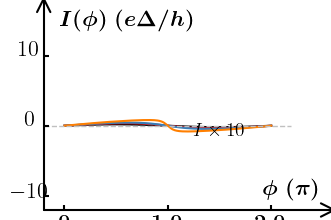

In [160]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 添加axisartist导入
from mpl_toolkits.axisartist.axislines import SubplotZero

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

import pandas as pd
import ast  # 添加ast模块用于解析字面量

def read_cpr_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'v_tau','Phase', 'Current'])
    
    # 转换数据类型
    df = df.astype({
        'v_tau':float,
        'Phase': float,
        'Current': float
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='v_tau')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 1.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1
    height = 0.64 * width*1
    fig = plt.figure(figsize=(width, height))

    gs = GridSpec(1, 3, width_ratios=[0.05,1, 0.05],wspace=0.1)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 3: CPR curves - 使用axisartist创建带箭头的坐标轴
    # ======================
    # 创建SubplotZero而不是常规子图
    ax1 = SubplotZero(fig, gs[0, 1])
    fig.add_subplot(ax1)
    
    # 隐藏所有默认的坐标轴
    for direction in ["left", "right", "bottom", "top"]:
        ax1.axis[direction].set_visible(False)
    
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []

    file_path = f"CPR_B=0.0_Vdis=0.0_Vtaus=4s_disorder1.csv"
    
    metadata, df = read_cpr_data(file_path)
    
    # 获取唯一B值和相位值
    vtaus = np.sort(df['v_tau'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    print((current_matrix).shape)
    
    for i0, vtau0 in enumerate(vtaus):

        x_data = phase_values/np.pi
        if vtau0 == 0.338:
            y_data = 10*current_matrix[i0,:]
        else:
            y_data = current_matrix[i0,:]
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax1.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])

    ax1.axhline(y=0, xmin=-0.0, xmax=0.92, linestyle='--',color='silver', linewidth=1.0)
    
    # ax1.axvline(x=1, ymin=0.08, ymax=0.9, linestyle='--',color='silver', linewidth=1.0)
               
    # # ax1.axvline(x=0.6/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.0)

    # ax1.axvline(x=2/3, ymin=0.08, ymax=0.3, linestyle='--',color='silver', linewidth=1.0)
    # ax1.axvline(x=2/5, ymin=0.08, ymax=0.22, linestyle='--',color='silver', linewidth=1.0)
    # ax1.axvline(x=2/6, ymin=0.08, ymax=0.18, linestyle='--',color='silver', linewidth=1.0)
    
    # 计算数据范围
    x_min, x_max = -0.2,2.4
    # y_min, y_max = -1,1
    y_min, y_max = -12,15
    
    # 设置坐标轴范围，确保原点在最小值位置
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax1.axis["x"] = ax1.new_floating_axis(0, y_min)  # x轴位于y_min位置
    ax1.axis["x"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    ax1.axis["x"].set_visible(True)
    ax1.axis["x"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    ax1.axis["y"] = ax1.new_floating_axis(1, x_min)  # y轴位于x_min位置
    ax1.axis["y"].set_axisline_style("->", size=1.5)  # y轴箭头样式
    ax1.axis["y"].set_visible(True)
    
    # 关键修改：将Y轴刻度标签位置调整到左侧（图外侧）
    ax1.axis["y"].major_ticks.set_tick_out(False)  # 确保刻度线朝内
    ax1.axis["y"].set_ticklabel_direction('-')  # 负号表示标签在轴的左侧
    ax1.axis["y"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    # 设置轴标签
    # ax1.axis["x"].label.set_text(r'$\boldsymbol{V_{dis}/V_0}$')
    # ax1.axis["x"].label.set_fontsize(sizes['label'])
    
    # ax1.axis["y"].label.set_text(r'$\boldsymbol{I_c~(e\Delta/h)}$')
    # ax1.axis["y"].label.set_fontsize(sizes['label'])
    ax1.axis["y"].major_ticklabels.set_rotation(90)  # 设置刻度标签水平显示
    ax1.axis["y"].major_ticklabels.set_pad(0)  # 调整标签与轴的距离，根据需要调整数值


    # 设置轴标签
    # 手动设置标签位置 - 你可以根据需要调整这些值
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    ax1.text(2.2, -9., r'$\boldsymbol{\phi~(\pi)}$', 
             fontsize=sizes['label'], ha='center', va='center')
    
    ax1.text(0.6, 15, r'$\boldsymbol{I(\phi)~(e\Delta/h)}$', 
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    
    # 设置刻度
    ax1.set_xticks([0,1.0, 2.0])
    ax1.set_xticklabels([r"\bf{0}",r"\bf{1.0}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # ax1.set_yticks([-10.0,0,10.0])
    # ax1.set_yticklabels([r"\bf{-10}",r"\bf{0}",r"\bf{10}",r"\bf{15}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    # 添加图例
    # ax1.legend(loc='upper right', 
    #           title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
    #           title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
    #           **legend_settings)
    # ax1.text(3.0, 17, r'$D_{\tau} = 1.00 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    # ax1.text(3.4, 13.5, r'$0.85 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    # ax1.text(3.4, 10, r'$0.75 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    # ax1.text(3.4, 5, r'$0.05 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')

    ax1.text(1.5, -0.5, r'$I \times 10 $', 
             fontsize=sizes['legend'], ha='center', va='center')
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels_CPR_v0.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

Directory already exists: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection
(4, 242)


/var/folders/sx/8zcff90529g69ly3gjnfhzgr0000gn/T/ipykernel_41855/1925335192.py:364: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax1.grid(**grid_settings)


Plot saved to: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection/combined_plot_4panels_CPR_v1.png


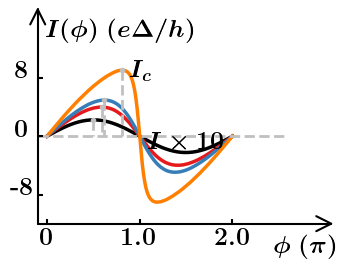

In [7]:
# 找出每条curve的最大值，标记为一个银白色的点，并从该点画虚线交于虚线y=0：
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 添加axisartist导入
from mpl_toolkits.axisartist.axislines import SubplotZero

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import ast  # 添加ast模块用于解析字面量

def read_cpr_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'v_tau','Phase', 'Current'])
    
    # 转换数据类型
    df = df.astype({
        'v_tau':float,
        'Phase': float,
        'Current': float
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='v_tau')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
    # 字体大小设置
    label_size = 18
    title_size = 14
    legend_size = 18
    tick_size = 18
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1
    height = 0.64 * width*1
    fig = plt.figure(figsize=(width, height))

    gs = GridSpec(1, 3, width_ratios=[0.05,1, 0.05],wspace=0.1)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 3: CPR curves - 使用axisartist创建带箭头的坐标轴
    # ======================
    # 创建SubplotZero而不是常规子图
    ax1 = SubplotZero(fig, gs[0, 1])
    fig.add_subplot(ax1)
    
    # 隐藏所有默认的坐标轴
    for direction in ["left", "right", "bottom", "top"]:
        ax1.axis[direction].set_visible(False)
    
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []

    file_path = f"CPR_B=0.0_Vdis=0.0_Vtaus=4s_disorder1.csv"
    
    metadata, df = read_cpr_data(file_path)
    
    # 获取唯一B值和相位值
    vtaus = np.sort(df['v_tau'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    print((current_matrix).shape)
    
    # 存储每条曲线的最大值点信息
    max_points = []
    
    for i0, vtau0 in enumerate(vtaus):

        x_data = phase_values/np.pi
        if vtau0 == 0.338:
            y_data = 10*current_matrix[i0,:]
        else:
            y_data = current_matrix[i0,:]
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax1.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])
        
        # 找到当前曲线的最大值及其位置
        max_idx = np.argmax(y_data)
        x_max = x_data[max_idx]
        y_max = y_data[max_idx]
        
        # 存储最大值点信息
        max_points.append((x_max, y_max, vtau0))
        
        # 绘制最大值点（银白色点）
        ax1.plot(x_max, y_max, '.', color='silver', markersize=8, markeredgecolor='none', markeredgewidth=0.5)
        
        # 从最大值点向y=0画虚线
        ax1.plot([x_max, x_max], [y_max, 0], '--', color='silver', linewidth=2.0, alpha=1.0)

    ax1.axhline(y=0, xmin=-0.0, xmax=0.92, linestyle='--',color='silver', linewidth=2.0)
    
    # ax1.axvline(x=1, ymin=0.08, ymax=0.9, linestyle='--',color='silver', linewidth=1.0)
               
    # # ax1.axvline(x=0.6/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.0)

    # ax1.axvline(x=2/3, ymin=0.08, ymax=0.3, linestyle='--',color='silver', linewidth=1.0)
    # ax1.axvline(x=2/5, ymin=0.08, ymax=0.22, linestyle='--',color='silver', linewidth=1.0)
    # ax1.axvline(x=2/6, ymin=0.08, ymax=0.18, linestyle='--',color='silver', linewidth=1.0)
    
    # 计算数据范围
    x_min, x_max = -0.1,2.8
    y_min, y_max = -12,14
    
    # 设置坐标轴范围，确保原点在最小值位置
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax1.axis["x"] = ax1.new_floating_axis(0, y_min)  # x轴位于y_min位置
    ax1.axis["x"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    ax1.axis["x"].set_visible(True)
    ax1.axis["x"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    ax1.axis["y"] = ax1.new_floating_axis(1, x_min)  # y轴位于x_min位置
    ax1.axis["y"].set_axisline_style("->", size=1.5)  # y轴箭头样式
    ax1.axis["y"].set_visible(True)
    
    # 关键修改：将Y轴刻度标签位置调整到左侧（图外侧）
    ax1.axis["y"].major_ticks.set_tick_out(False)  # 确保刻度线朝内
    ax1.axis["y"].set_ticklabel_direction('-')  # 负号表示标签在轴的左侧
    ax1.axis["y"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    # 设置轴标签
    # ax1.axis["x"].label.set_text(r'$\boldsymbol{V_{dis}/V_0}$')
    # ax1.axis["x"].label.set_fontsize(sizes['label'])
    
    # ax1.axis["y"].label.set_text(r'$\boldsymbol{I_c~(e\Delta/h)}$')
    # ax1.axis["y"].label.set_fontsize(sizes['label'])
    ax1.axis["y"].major_ticklabels.set_rotation(90)  # 设置刻度标签水平显示
    ax1.axis["y"].major_ticklabels.set_pad(0)  # 调整标签与轴的距离，根据需要调整数值


    # 设置轴标签
    # 手动设置标签位置 - 你可以根据需要调整这些值
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    ax1.text(2.8, -15, r'$\boldsymbol{\phi~(\pi)}$', 
             fontsize=sizes['label'], ha='center', va='center')
    
    ax1.text(0.8, 14.5, r'$\boldsymbol{I(\phi)~(e\Delta/h)}$', 
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    
    # 设置刻度
    ax1.set_xticks([0,1.0, 2.0])
    ax1.set_xticklabels([r"\bf{0}",r"\bf{1.0}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax1.set_yticks([-8.0,0,8.0])
    ax1.set_yticklabels([r"\bf{-8~~}",r"\bf{0}",r"\bf{8}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    ax1.grid(**grid_settings)
    
    # 设置刻度方向
    ax1.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    # 添加图例
    # ax1.legend(loc='upper right', 
    #           title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
    #           title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
    #           **legend_settings)
    # ax1.text(3.0, 17, r'$D_{\tau} = 1.00 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    # ax1.text(3.4, 13.5, r'$0.85 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    # ax1.text(3.4, 10, r'$0.75 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    # ax1.text(3.4, 5, r'$0.05 $', 
    #          fontsize=sizes['legend'], ha='center', va='center')

    ax1.text(1.5, -0.5, r'$\boldsymbol{I \times 10} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax1.text(1.0, 9, r'$\boldsymbol{I_c}$', 
             fontsize=sizes['legend'], ha='center', va='center')

    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels_CPR_v1.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

# DC plot for Fig 3

No handles with labels found to put in legend.


Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/combined_plot_4panels.png


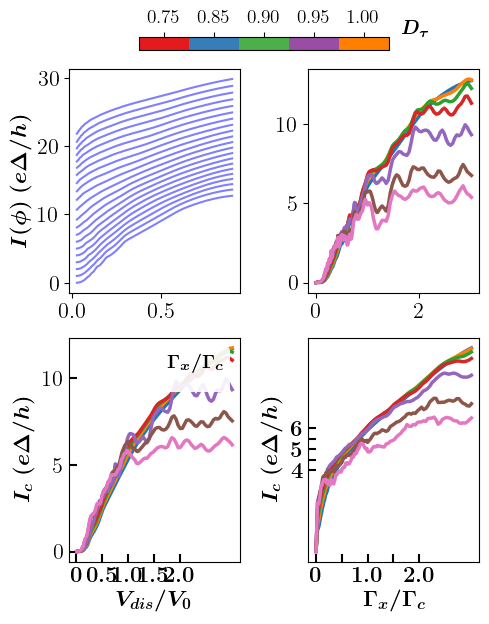

In [35]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

import pandas as pd
import csv


def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns
    
    Args:
        file_path (str): Path to data file
        columns_to_read (list, optional): List of column names to extract. 
            If None, reads all columns.
    
    Returns:
        tuple: (metadata dict, DataFrame with selected columns)
    """
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            # Try to convert first value to float
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df


def read_select_data_cp(file_path, columns_to_read=None):
    """Load data with option to select specific columns
    
    Args:
        file_path (str): Path to data file
        columns_to_read (list, optional): List of column names to extract. 
            If None, reads all columns.
    
    Returns:
        tuple: (metadata dict, DataFrame with selected columns)
    """
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            # Try to convert first value to float
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN']) #columns=[ 'Bias Voltage', 'Current','SidebandN'])
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1.3
    height = 0.64 * width*2
    fig = plt.figure(figsize=(width, height))
    gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1],wspace=0.4,hspace=0.2)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 1: DC IV curves at various B
    # ======================
    
    ax0 = fig.add_subplot(gs[0, 0])
    vtaus0 = [0.842, 1.000]
    selected_bs = [0.5, 2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    file_path = "DC_IV_2D_Bs_vtau=0.882_inflead_lines.csv"
    # 读取数据 
    metadata, df = read_dc_data(file_path, twoD_index = True)
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 绘制数据
    for i0 in range((len(b_values))):
        ax0.plot(vbias_values, current_matrix[i0,:]+1*i0,'b',alpha=0.5)
    
    # 设置轴标签
    # ax0.set_xlabel(r'$\boldsymbol{\phi~(\pi)}$', fontsize=sizes['label'])
    ax0.set_ylabel(r'$\boldsymbol{I{(\phi)}~(e\Delta/h)}$', fontsize=sizes['label'])
    
    
    # ======================
    # Panel 2: Critical current vs B
    # ======================
    
    ax1 = fig.add_subplot(gs[0, 1])
    vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882
    # 使用离散颜色方案绘制数据
    for i0,Vdis in enumerate(Vdis_list):
        # color = vtau_colors[vtau]
        file_path = f"DC_adaptive=True_B=0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        # if vtau0 == 0.338:
        ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
        # else:
        #     ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values,
        #                 '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])
    

    # ======================
    # Panel 3: CPR curves
    # ======================
    ax2 = fig.add_subplot(gs[1, 0])
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    # 绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        
        # file_path = f"CPR_data_sweep_B_vtau_{vtau:.3f}_separate_summary_B={B0:.1f}_disorder1.csv"
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        # if vtau0 == 0.338:
        ax2.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    # 设置轴标签
    ax2.set_xlabel(r'$\boldsymbol{V_{dis}/V_0}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # 设置刻度
    ax2.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax2.set_xticklabels([r"\bf{0}", r"\bf{0.5}", r"\bf{1.0}", r"\bf{1.5}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax2.set_yticks([0,0.5,1.0])
    # ax2.set_yticklabels([r"\bf{0.0}",r"\bf{0.5}",r"\bf{1.0}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])
    # ax2.axvline(x=1, ymin=-3, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # ax2.axhline(y=0, xmin=0, xmax=2, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    ax2.grid(**grid_settings)
    
    # 设置刻度方向
    ax2.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    
    ax2.legend(loc='upper right', 
              title = r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', 
              title_fontsize=sizes['legend'],handlelength=0.9,ncol=2,
              **legend_settings)

    # ======================
    # Panel 4: Critical current vs B
    # ======================
    
    ax3 = fig.add_subplot(gs[1, 1])
    # vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]  [0.338] -> [0.05]
    vtau = 0.882
    alpha_list = [0.1,0.2, 0.3,0.4,0.5, 0.6,0.8,0.9,0.95,1.0]
    Vdis_list = [0.0,0.1,0.2,0.3,0.5,0.8, 1.0]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        # if vtau0 == 0.338:
        ax3.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    # 设置轴标签
    ax3.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'])
    ax3.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # 设置刻度
    ax3.set_xticks([0, 0.5, 1.0, 1.5, 2.0])
    ax3.set_xticklabels([r"\bf{0}", r"", r"\bf{1.0}", r"", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax3.set_yticks([4., 4.5,5,5.5, 6])
    ax3.set_yticklabels([r"\bf{4}",r"", r"\bf{5}",r"", r"\bf{6}", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax3.set_ylim([4.3, 6.3])

    # ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    # 设置网格
    ax3.grid(**grid_settings)
    
    # 设置刻度方向
    ax3.tick_params(direction=tick_settings['direction'], length=tick_settings['length'], width=tick_settings['width'])
    
    # ======================
    # 创建离散颜色条
    # ======================
    # cbar_ax = fig.add_axes([0.92, 0.35, 0.02, 0.3])  # [x, y, width, height]
    cbar_ax = fig.add_axes([0.22, 0.95, 0.5, 0.02])  # [x, y, width, height]
   
    # 创建离散颜色映射
    cmap = ListedColormap([vtau_colors[v] for v in vtaus])
    bounds = np.arange(len(vtaus) + 1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    # 创建颜色条
    cbar = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm,
                                    boundaries=bounds, 
                                    ticks=np.arange(len(vtaus)) + 0.5,
                                    spacing='proportional',
                                    orientation='horizontal')
    
    # 设置刻度标签
    cbar.set_ticklabels([f'{D:.2f}' for D in Dtaus])
    cbar.ax.tick_params(labelsize=sizes['cbar_tick'])
    cbar_ax.xaxis.set_ticks_position('top')
    
    # cbar.set_label(r'$\boldsymbol{v_{\tau}}$', fontsize=sizes['cbar_label'], labelpad=10)
    
    # 添加颜色条标题
    cbar_ax.text(1.1, 0.70, r'$\boldsymbol{D_{\tau}}$', 
                 transform=cbar_ax.transAxes, 
                 fontsize=sizes['cbar_label'], 
                 ha='center', va='bottom')
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_4panels.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/combined_plot_5panels.png


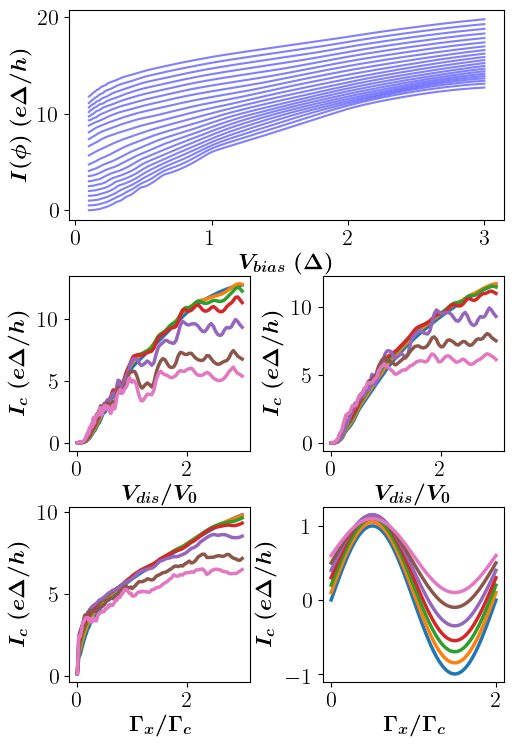

In [226]:
# updated panal plot
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import csv
import ast  # 需要添加这个import

def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns
    
    Args:
        file_path (str): Path to data file
        columns_to_read (list, optional): List of column names to extract. 
            If None, reads all columns.
    
    Returns:
        tuple: (metadata dict, DataFrame with selected columns)
    """
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            # Try to convert first value to float
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局 - 修改为3行2列的GridSpec
    width = 3.847 * 1.3
    height = 0.64 * width * 2.5  # 稍微调整高度以适应3行
    fig = plt.figure(figsize=(width, height))
    
    # 创建3行2列的GridSpec，最上面一行横跨两列
    gs = GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1.2, 1, 1], wspace=0.4, hspace=0.3)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 1: 最上面的宽panel (横跨两列)
    # ======================
    ax0 = fig.add_subplot(gs[0, :])  # 第0行，横跨所有列
    
    vtaus0 = [0.842, 1.000]
    selected_bs = [0.5, 2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    # file_path = "DC_IV_2D_Bs_vtau=0.882.csv"
    file_path = "DC_IV_2D_Bs_vtau=0.882_inflead_lines.csv"
    # 读取数据 
    metadata, df = read_dc_data(file_path, twoD_index=True)
    # 获取唯一B值和相位值
    b_values = np.sort(df['Magnetic Field'].unique())
    vbias_values = np.sort(df['Bias Voltage'].unique())/0.3
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 绘制数据
    for i0 in range(min(21, len(b_values))):
        ax0.plot(vbias_values, current_matrix[i0, :] + 0.5*i0, 'b', alpha=0.5)
    
    # 设置轴标签
    ax0.set_xlabel(r'$\boldsymbol{V_{bias}~(\Delta)}$', fontsize=sizes['label'])
    ax0.set_ylabel(r'$\boldsymbol{I{(\phi)}~(e\Delta/h)}$', fontsize=sizes['label'])
    # ax0.set_title('Panel 1: Wide Top Panel', fontsize=sizes['title'])
    
    # ======================
    # Panel 2: 第二排左panel
    # ======================
    ax1 = fig.add_subplot(gs[1, 0])
    vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882
    
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    ax1.set_xlabel(r'$\boldsymbol{V_{dis}/V_0}$', fontsize=sizes['label'])
    ax1.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'])
    # ax1.set_title('Panel 2', fontsize=sizes['title'])
    
    # ======================
    # Panel 3: 第二排右panel
    # ======================
    ax2 = fig.add_subplot(gs[1, 1])
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    selected_bs = [0.0, 0.5, 1.5, 2.0]
    
    # 绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        ax2.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    ax2.set_xlabel(r'$\boldsymbol{V_{dis}/V_0}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'])
    # ax2.set_title('Panel 3', fontsize=sizes['title'])
    
    # ======================
    # Panel 4: 第三排左panel
    # ======================
    ax3 = fig.add_subplot(gs[2, 0])
    vtau = 0.882
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        ax3.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    ax3.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'])
    ax3.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/h)}$', fontsize=sizes['label'])
    # ax3.set_title('Panel 4', fontsize=sizes['title'])
    
    # ======================
    # Panel 5: 第三排右panel (新增)
    # ======================
    ax4 = fig.add_subplot(gs[2, 1])
    vtau = 0.882
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    
    # 使用离散颜色方案绘制数据 - 这里可以添加第五个panel的内容
    for i0, Vdis in enumerate(Vdis_list):
        # 这里使用不同的文件或参数来展示第五个panel
        file_path = f"DC_adaptive=True_B=1.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"  # 修改B值以示区别
        try:
            metadata, df = read_dc_data(file_path)
            ax4.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 0*(i0),
                            '-', linewidth=line_styles['default']['linewidth'])
        except:
            # 如果文件不存在，绘制示例数据
            x = np.linspace(0, 2, 100)
            y = np.sin(x * np.pi) * (1 - Vdis/2) + i0 * 0.1
            ax4.plot(x, y, '-', linewidth=line_styles['default']['linewidth'])
    
    ax4.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'])
    ax4.set_ylabel(r'$\boldsymbol{I_{c}~(e\Delta/h)}$', fontsize=sizes['label'])
    # ax4.set_title('Panel 5', fontsize=sizes['title'])
    
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.08, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_5panels.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

In [42]:
# version 2, add the DOS plot. 

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/combined_plot_2rows_5panels_optimized.png


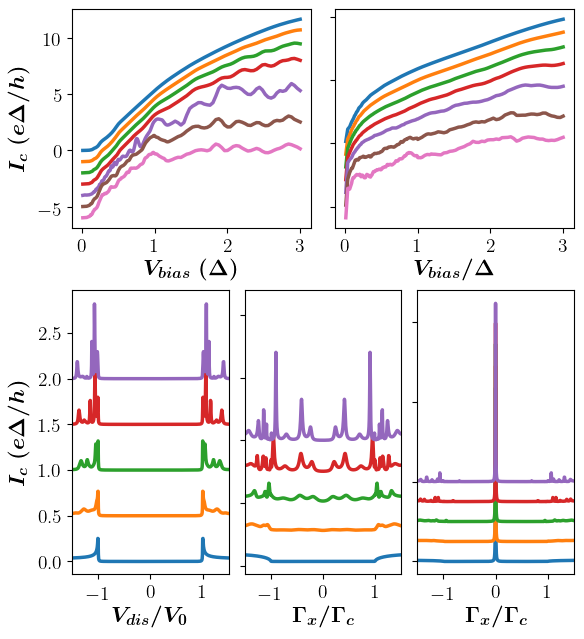

In [74]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import csv
import ast

def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False,spectra_index =False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        if spectra_index:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['v_tau','Magnetic Field', 'Energy', 'DOS'])
        else:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    if spectra_index:
        df = df.astype({
            'Magnetic Field': float,
            'Energy': float,
           'DOS': float
            })
        # 确保磁场方向正确
        df = df.sort_values(by='Magnetic Field')
    else:
        df = df.astype({
            'Bias Voltage': float,
            'Current': float,
           'SidebandN': int
        })
        
        # 确保磁场方向正确
        df = df.sort_values(by='Bias Voltage')
        
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 14
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.50': '#E41A1C',
        'vtau_0.80': '#377EB8',
        'vtau_0.90': '#4DAF4A',
        'vtau_0.95': '#984EA3',
        'vtau_1.00': '#FF7F00',
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局 - 调整高度比例和整体尺寸
    width = 3.847 * 1.5  # 增加宽度以适应3列
    height = 0.64 * width * 1.8  # 调整高度比例
    fig = plt.figure(figsize=(width, height))
    
    # 创建2行的GridSpec，第一行扁一点，第二行高一点
    # 调整高度比例，让第一行更扁
    gs = GridSpec(2, 1, height_ratios=[1, 1.3], hspace=0.25)  # 减小高度差异
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # 第一行：2个panel
    # ======================
    # 在第一行创建2列的subgrid，减小列间距
    gs_top = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0], wspace=0.1)
    
    # Panel 1: 第一行左
    ax0 = fig.add_subplot(gs_top[0, 0])
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }
    
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882    
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        ax0.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    ax0.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    
    # 设置轴标签 - 只设置左panel的ylabel
    ax0.set_xlabel(r'$\boldsymbol{V_{bias}~(\Delta)}$', fontsize=sizes['label'])
    ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'])
    
    # Panel 2: 第一行右
    ax1 = fig.add_subplot(gs_top[0, 1])
    vtaus = [0.842, 0.882, 0.904, 0.934, 1.000]
    Dtaus = [0.75, 0.85, 0.90, 0.95, 1.00]
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882
    
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    ax1.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    # 不设置右panel的ylabel，共用左panel的
    ax1.set_ylabel('')
    # 移除右panel的y轴刻度标签
    ax1.tick_params(labelleft=False)
    
    # ======================
    # 第二行：3个panel
    # ======================
    # 在第二行创建3列的subgrid，减小列间距
    gs_bottom = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.1)
    
    # Panel 3: 第二行左
    ax2 = fig.add_subplot(gs_bottom[0, 0])
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    Vdis_list = [0.0, 0.2, 0.5, 0.8, 1.0]
    selected_bs = [0.0, 0.5, 1.5, 2.0]
    
    # 绘制数据
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        # metadata, df = read_dc_data(file_path)
        metadata, df = read_dc_data(file_path, twoD_index=True,spectra_index=True)
        # 获取唯一B值和相位值
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
    
    # 重塑数据为矩阵
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        ax2.plot(E_values/0.3, DOS_matrix[0,:] +0.5*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    
    ax2.set_xlabel(r'$\boldsymbol{V_{dis}/V_0}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'])
    # ax2.set_ylim([-0.5,5])
    ax2.set_xlim([-1.5,1.5])
    
    # Panel 4: 第二行中
    ax3 = fig.add_subplot(gs_bottom[0, 1])
    vtau = 0.882
    Vdis_list = [0.0, 0.2, 0.5, 0.8,1.0]
    Bs = [0.0,0.5,1.0,1.5,2.0]
    
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        # metadata, df = read_dc_data(file_path)
        metadata, df = read_dc_data(file_path, twoD_index=True,spectra_index=True)
        # 获取唯一B值和相位值
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
    
    # 重塑数据为矩阵
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        ax3.plot(E_values/0.3, DOS_matrix[2,:] + 0.1*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    ax3.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'])
    # 不设置中间panel的ylabel
    ax3.set_ylabel('')
    ax3.tick_params(labelleft=False)
    # ax3.set_ylim([-0.5,5])
    ax3.set_xlim([-1.5,1.5])
    
    # Panel 5: 第二行右
    ax4 = fig.add_subplot(gs_bottom[0, 2])
    vtau = 0.882
    Vdis_list = [0.0, 0.2, 0.5, 0.8,1.0]
    Bs = [0.0,0.5,1.0,1.5,2.0]
    
    # 使用离散颜色方案绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        # metadata, df = read_dc_data(file_path)
        metadata, df = read_dc_data(file_path, twoD_index=True,spectra_index=True)
        # 获取唯一B值和相位值
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
    
    # 重塑数据为矩阵
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        ax4.plot(E_values/0.3, DOS_matrix[4,:] +0.5*(i0),
                        '-', linewidth=line_styles['default']['linewidth'])
    
    ax4.set_xlabel(r'$\boldsymbol{\Gamma_{x}/\Gamma_c}$', fontsize=sizes['label'])
    # 不设置右panel的ylabel
    ax4.set_ylabel('')
    ax4.tick_params(labelleft=False)
    # ax4.set_ylim([-0.5,5])
    ax4.set_xlim([-1.5,1.5])
    # ======================
    # 调整布局并保存
    # ======================
    # 调整边距，让图形更紧凑
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.10, top=0.95)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "combined_plot_2rows_5panels_optimized.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

# Fig 3. modified fig plot of DC_IV

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/combined_plot_2rows_5panels_clipped.png


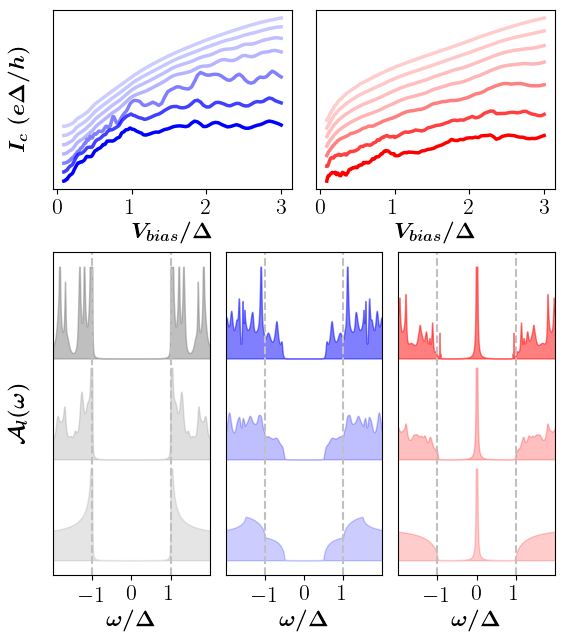

In [220]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import csv
import ast

def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False,spectra_index =False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        if spectra_index:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['v_tau','Magnetic Field', 'Energy', 'DOS'])
        else:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    if spectra_index:
        df = df.astype({
            'Magnetic Field': float,
            'Energy': float,
           'DOS': float
            })
        # 确保磁场方向正确
        df = df.sort_values(by='Magnetic Field')
    else:
        df = df.astype({
            'Bias Voltage': float,
            'Current': float,
           'SidebandN': int
        })
        
        # 确保磁场方向正确
        df = df.sort_values(by='Bias Voltage')
        
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'serif'
    mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置 - 添加bottom panel的颜色
    colors = {
        'vtau_0.50': '#E41A1C',
        'vtau_0.80': '#377EB8',
        'vtau_0.90': '#4DAF4A',
        'vtau_0.95': '#984EA3',
        'vtau_1.00': '#FF7F00',
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black',
        'bottom_panel1': 'grey',  # 蓝色
        'bottom_panel2': 'blue',  # 橙色
        'bottom_panel3': 'red',  # 绿色
        'top_panel1': 'blue',     # 蓝色
        'top_panel2': 'red'      # 红色
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置 - 添加top panel的透明度范围
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7,
        'top_min': 0.2,
        'top_max': 1.0,
        'bottom_area': 0.6
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

def clip_data_to_range(data, baseline, max_height):
    """
    将数据限制在baseline到baseline + max_height范围内
    超出范围的部分设为NaN
    """
    clipped_data = data.copy()
    # 将超过baseline + max_height的部分设为NaN
    clipped_data[data > max_height] = max_height #np.nan
    return clipped_data

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1.5
    height = 0.64 * width * 1.8
    fig = plt.figure(figsize=(width, height))
    
    # 创建2行的GridSpec
    gs = GridSpec(2, 1, height_ratios=[1, 1.8], hspace=0.25)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    transparencies = plot_config['transparencies']
    
    # ======================
    # 第一行：2个panel - 使用透明度区分Vdis
    # ======================
    gs_top = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0], wspace=0.1)
    
    # Panel 1: 第一行左 - B=0.5
    ax0 = fig.add_subplot(gs_top[0, 0])
    
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882
    
    # 计算透明度梯度
    alpha_min = transparencies['top_min']
    alpha_max = transparencies['top_max']
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min] #np.linspace(alpha_max, alpha_min, len(Vdis_list))
    alpha_values = list(reversed(alpha_values)) 
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax0.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax0.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color=colors['top_panel1'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    ax0.set_yticks([])
    ax0.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax0.set_xticks([0,1, 2,3])
    # ax0.set_xlim([0.1,2.1])

    # Panel 2: 第一行右 - B=2.0
    ax1 = fig.add_subplot(gs_top[0, 1])
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax1.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color=colors['top_panel2'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    ax1.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    ax1.set_yticks([])
    ax1.tick_params(labelleft=False)
    ax1.set_xticks([0,1, 2,3])
    # ax1.set_xlim([0.1,2.1])

    # ======================
    # 第二行：3个panel - 使用area plot，每个panel一个颜色
    # ======================
    gs_bottom = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.1)
    
    # 定义bottom panel的颜色和offset
    bottom_colors = [
        colors['bottom_panel1'],  # Panel 3
        colors['bottom_panel2'],  # Panel 4  
        colors['bottom_panel3']   # Panel 5
    ]
    
    # 根据幅度差异设置不同的offset量
    # bottom_offsets = [0.2, 0.1, 0.1]  # 对应三个panel的offset
    
    # 设置每条线允许的最大高度（相对于baseline）
    line_max_heights = [0.1, 0.1, 0.1] #[0.3, 0.08, 0.3]  # 每个panel中line的最大高度
    bottom_offsets = [i*1.1 for i in line_max_heights]
    
    Vdis_list_bottom = [0.0, 0.2, 0.5] #, 0.8], 1.0
    alpha_index = [0, 2, 4]
    
    # Panel 3: 第二行左 - B=0.0
    ax2 = fig.add_subplot(gs_bottom[0, 0])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        # 获取当前曲线的数据
        y_data = DOS_matrix[0, :]
        baseline = i0 * bottom_offsets[0]  # 零线位置
        
        # 限制line的高度，只显示baseline到baseline + max_height的部分
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[0])
        
        # 绘制area plot - 填充从零线到数据点的区域
        # 使用原始数据绘制填充，保持area plot的连续性
        ax2.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[0], 
                        alpha = alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax2.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[0], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    ax2.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    ax2.set_yticks([])
    ax2.set_xticks([-1,0,1])
    ax2.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{\mathcal{A}_l(\omega)}$', fontsize=sizes['label'],labelpad=15)
    ax2.set_xlim([-2.0, 2.0])
    
    # Panel 4: 第二行中 - B=0.5
    ax3 = fig.add_subplot(gs_bottom[0, 1])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[1, :]
        baseline = i0 * bottom_offsets[1]  # 使用较小的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[1])
        
        # 绘制area plot
        ax3.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[1], 
                        alpha= alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax3.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[1], 
        #         linewidth=1.0, 
        #         alpha=0.9)

    ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    ax3.set_xticks([-1.0, 0,1.0])
    ax3.set_yticks([])

    ax3.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax3.set_ylabel('')
    ax3.tick_params(labelleft=False)
    ax3.set_xlim([-2.0, 2.0])
    
    # Panel 5: 第二行右 - B=2.0
    ax4 = fig.add_subplot(gs_bottom[0, 2])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[4, :]
        baseline = i0 * bottom_offsets[2]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[2])
        
        # 绘制area plot
        ax4.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[2], 
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax4.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[2], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    
    ax4.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    ax4.set_xticks([-1.0, 0,1.0])
    ax4.set_yticks([])
    ax4.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax4.set_ylabel('')
    ax4.tick_params(labelleft=False)
    ax4.set_xlim([-2.0, 2.0])
    
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.10, top=0.95)
    
    output_path = os.path.join(dirF, "combined_plot_2rows_5panels_clipped.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

# updated version, consistent style , Fig3_v0, Oct24_2025

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/Fig3_v0.png


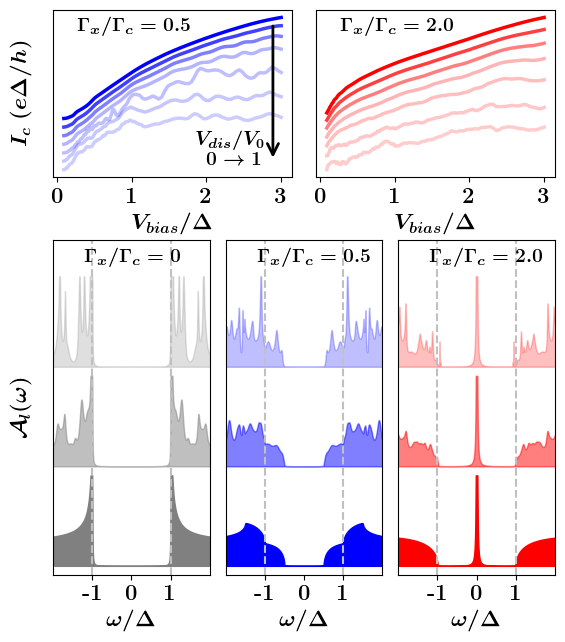

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# from pylab import *
# from numarray import *


reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import csv
import ast

def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False,spectra_index =False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        if spectra_index:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['v_tau','Magnetic Field', 'Energy', 'DOS'])
        else:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    if spectra_index:
        df = df.astype({
            'Magnetic Field': float,
            'Energy': float,
           'DOS': float
            })
        # 确保磁场方向正确
        df = df.sort_values(by='Magnetic Field')
    else:
        df = df.astype({
            'Bias Voltage': float,
            'Current': float,
           'SidebandN': int
        })
        
        # 确保磁场方向正确
        df = df.sort_values(by='Bias Voltage')
        
    return metadata, df

# ======================
# 画图参数设置函数 - 修改为与代码2一致
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
    # 字体大小设置 - 与代码2一致
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16  # 修改为16，与代码2一致
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置 - 保留代码1中的颜色，但使用代码2的命名
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black',
        'bottom_panel1': 'grey',  # 蓝色
        'bottom_panel2': 'blue',  # 橙色
        'bottom_panel3': 'red',  # 绿色
        'top_panel1': 'blue',     # 蓝色
        'top_panel2': 'red'      # 红色
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置 - 与代码2一致
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7,
        'top_min': 0.2,
        'top_max': 1.0,
        'bottom_area': 0.6
    }
    
    # 图例设置 - 与代码2一致
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'  # 与代码2一致
    }
    
    # 刻度设置 - 与代码2一致
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置 - 与代码2一致
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

def clip_data_to_range(data, baseline, max_height):
    """
    将数据限制在baseline到baseline + max_height范围内
    超出范围的部分设为NaN
    """
    clipped_data = data.copy()
    # 将超过baseline + max_height的部分设为NaN
    clipped_data[data > max_height] = max_height #np.nan
    return clipped_data

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1.5
    height = 0.64 * width * 1.8
    fig = plt.figure(figsize=(width, height))
    
    # 创建2行的GridSpec
    gs = GridSpec(2, 1, height_ratios=[1, 2.], hspace=0.25)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    transparencies = plot_config['transparencies']
    
    # ======================
    # 第一行：2个panel - 使用透明度区分Vdis
    # ======================
    gs_top = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[0], wspace=0.1)
    
    # Panel 1: 第一行左 - B=0.5
    ax0 = fig.add_subplot(gs_top[0, 0])
    
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882

    # 计算透明度梯度
    alpha_min = transparencies['top_min']
    alpha_max = transparencies['top_max']
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min] #np.linspace(alpha_max, alpha_min, len(Vdis_list))
    
    # alpha_values = list(reversed(alpha_values)) 
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax0.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax0.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color=colors['top_panel1'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax0.set_yticks([])
    ax0.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax0.set_xticks([0,1, 2,3])
    # ax0.set_xlim([0,3.2])
    # 设置刻度标签为黑体，与代码2一致
    # ax0.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax0.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    

    ax0.annotate('', xy=(0.92, 0.1), xytext=(0.92, 0.92), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=2,mutation_scale=20))
    ax0.text(0.6, 0.22, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    ax0.text(0.64, 0.1, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    ax0.text(0.1, 0.9, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    
    # Panel 2: 第一行右 - B=2.0
    ax1 = fig.add_subplot(gs_top[0, 1])
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax1.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color=colors['top_panel2'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax1.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    ax1.set_yticks([])
    ax1.tick_params(labelleft=False)
    ax1.set_xticks([0,1, 2,3])
    # 设置刻度标签为黑体，与代码2一致
    ax1.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax1.text(0.1, 0.9, r'$\boldsymbol{\Gamma_x/\Gamma_c = 2.0}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)


    # ax1.set_xlim([0.1,2.1])

    # ======================
    # 第二行：3个panel - 使用area plot，每个panel一个颜色
    # ======================
    gs_bottom = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1], wspace=0.1)
    
    # 定义bottom panel的颜色和offset
    bottom_colors = [
        colors['bottom_panel1'],  # Panel 3
        colors['bottom_panel2'],  # Panel 4  
        colors['bottom_panel3']   # Panel 5
    ]
    
    # 根据幅度差异设置不同的offset量
    # bottom_offsets = [0.2, 0.1, 0.1]  # 对应三个panel的offset
    
    # 设置每条线允许的最大高度（相对于baseline）
    line_max_heights = [0.1, 0.1, 0.1] #[0.3, 0.08, 0.3]  # 每个panel中line的最大高度
    bottom_offsets = [i*1.1 for i in line_max_heights]
    
    Vdis_list_bottom = [0.0, 0.2, 0.5] #, 0.8], 1.0
    alpha_index = [0, 2, 4]
    
    # Panel 3: 第二行左 - B=0.0
    ax2 = fig.add_subplot(gs_bottom[0, 0])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        # 获取当前曲线的数据
        y_data = DOS_matrix[0, :]
        baseline = i0 * bottom_offsets[0]  # 零线位置
        
        # 限制line的高度，只显示baseline到baseline + max_height的部分
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[0])
        
        # 绘制area plot - 填充从零线到数据点的区域
        # 使用原始数据绘制填充，保持area plot的连续性
        ax2.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[0], 
                        alpha = alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax2.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[0], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    ax2.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    # 修改轴标签设置，与代码2一致
    ax2.set_yticks([])
    ax2.set_xticks([-1,0,1])
    # 设置刻度标签为黑体，与代码2一致
    ax2.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax2.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{\mathcal{A}_l(\omega)}$', fontsize=sizes['label'],labelpad=15)
    ax2.set_xlim([-2.0, 2.0])
    ax2.set_ylim([-0.01,0.36])
    ax2.text(0.2, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)

    # Panel 4: 第二行中 - B=0.5
    ax3 = fig.add_subplot(gs_bottom[0, 1])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[1, :]
        baseline = i0 * bottom_offsets[1]  # 使用较小的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[1])
        
        # 绘制area plot
        ax3.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[1], 
                        alpha= alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax3.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[1], 
        #         linewidth=1.0, 
        #         alpha=0.9)

    ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.text(0.2, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax3.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax3.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax3.set_yticks([])

    ax3.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax3.set_ylabel('')
    ax3.tick_params(labelleft=False)
    ax3.set_xlim([-2.0, 2.0])
    ax3.set_ylim([-0.01,0.36])
    
    # Panel 5: 第二行右 - B=2.0
    ax4 = fig.add_subplot(gs_bottom[0, 2])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[4, :]
        baseline = i0 * bottom_offsets[2]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[2])
        
        # 绘制area plot
        ax4.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[2], 
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax4.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[2], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    
    ax4.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.text(0.2, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 2.0}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax4.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax4.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax4.set_yticks([])
    ax4.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax4.set_ylabel('')
    ax4.tick_params(labelleft=False)
    ax4.set_xlim([-2.0, 2.0])
    ax4.set_ylim([-0.01,0.36])
    
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.10, top=0.95)
    
    output_path = os.path.join(dirF, "Fig3_v0.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

# Fig 4 other version 

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/Fig3_v2.png


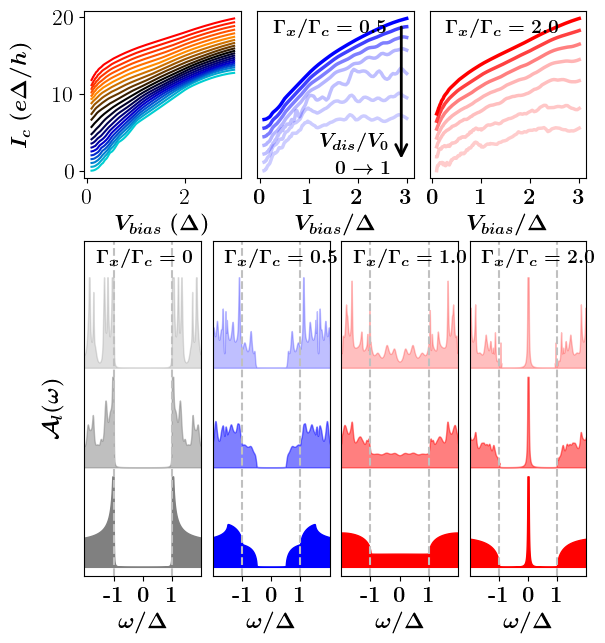

In [29]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# from pylab import *
# from numarray import *
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import csv
import ast

def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False,spectra_index =False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        if spectra_index:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['v_tau','Magnetic Field', 'Energy', 'DOS'])
        else:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    if spectra_index:
        df = df.astype({
            'Magnetic Field': float,
            'Energy': float,
           'DOS': float
            })
        # 确保磁场方向正确
        df = df.sort_values(by='Magnetic Field')
    else:
        df = df.astype({
            'Bias Voltage': float,
            'Current': float,
           'SidebandN': int
        })
        
        # 确保磁场方向正确
        df = df.sort_values(by='Bias Voltage')
        
    return metadata, df

# ======================
# 画图参数设置函数 - 修改为与代码2一致
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
    # 字体大小设置 - 与代码2一致
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16  # 修改为16，与代码2一致
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置 - 保留代码1中的颜色，但使用代码2的命名
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black',
        'bottom_panel1': 'grey',  # 蓝色
        'bottom_panel2': 'blue',  # 橙色
        'bottom_panel3': 'red',  # 绿色
        'top_panel1': 'blue',     # 蓝色
        'top_panel2': 'red'      # 红色
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置 - 与代码2一致
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7,
        'top_min': 0.2,
        'top_max': 1.0,
        'bottom_area': 0.6
    }
    
    # 图例设置 - 与代码2一致
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'  # 与代码2一致
    }
    
    # 刻度设置 - 与代码2一致
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置 - 与代码2一致
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

def clip_data_to_range(data, baseline, max_height):
    """
    将数据限制在baseline到baseline + max_height范围内
    超出范围的部分设为NaN
    """
    clipped_data = data.copy()
    # 将超过baseline + max_height的部分设为NaN
    clipped_data[data > max_height] = max_height #np.nan
    return clipped_data

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1.5
    height = 0.64 * width * 1.8
    fig = plt.figure(figsize=(width, height))
    
    # 创建2行的GridSpec
    gs = GridSpec(2, 1, height_ratios=[1, 2.], hspace=0.25)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    transparencies = plot_config['transparencies']
    
    # ======================
    # 第一行：2个panel - 使用透明度区分Vdis
    # ======================
    gs_top = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0], wspace=0.1)

    ax0_add = fig.add_subplot(gs_top[0, 0])

    
    # file_path = "DC_IV_2D_Bs_vtau=0.882.csv"
    file_path = "DC_IV_2D_Bs_vtau=0.882_inflead_lines.csv"
    # 读取数据 
    metadata, df = read_dc_data(file_path, twoD_index=True)
    # 获取唯一B值和相位值
    
    b_values = np.sort(df['Magnetic Field'].unique()).astype(float)
    
    vbias_values = np.sort(df['Bias Voltage'].unique())/0.3


    # 设置colormap - 使用seismic colormap
    # cmap = cm.get_cmap('PRGn')
    # colors = ['blue','darkblue', 'black', 'darkred','red']
    # colors_add = ['#2E86AB', '#1B5E8E', 'black', '#C44536', '#D72638']
    # colors_add = ['#1E90FF', '#4169E1', 'black', '#DC143C', '#FF0000']
    # colors_add = ['#00BFFF', '#1E90FF', 'black', '#FF4500', '#FF0000']
    # colors_add = ['#00FFFF', '#0000FF', 'black', '#FF00FF', '#FF0000']
    colors_add = ['#00CED1', '#0000CD', 'black', '#FF8C00', '#FF0000']
       
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_diverging', colors_add, N=256)
    norm = Normalize(vmin=min(b_values), vmax=max(b_values))
    # print(cmap(norm(0.0)))
    # Bs_colors_cmap = cmap(np.linspace(0,1, len(b_values))) #  

    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 绘制数据
    for i0, B0 in enumerate(b_values):
        # print(B0)
        color = cmap(norm(B0))
        ax0_add.plot(vbias_values, current_matrix[i0, :] + 0.5*i0, color =color, alpha=1)
    
    # 设置轴标签
    ax0_add.set_xlabel(r'$\boldsymbol{V_{bias}~(\Delta)}$', fontsize=sizes['label'])
    ax0_add.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax0_add.set_xticks([0,1, 2,3])
    # 设置刻度标签为黑体，与代码2一致
    ax0_add.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax0_add.set_yticks([0,1, 2,3])

    
    # Panel 1: 第一行左 - B=0.5
    ax0 = fig.add_subplot(gs_top[0, 1])
    
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882

    # 计算透明度梯度
    alpha_min = transparencies['top_min']
    alpha_max = transparencies['top_max']
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min] #np.linspace(alpha_max, alpha_min, len(Vdis_list))
    
    # alpha_values = list(reversed(alpha_values)) 
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax0.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax0.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color=colors['top_panel1'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax0.set_yticks([])
    ax0.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    ax0.set_ylabel(r"")
    
    # ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax0.set_xticks([0,1, 2,3])
    # ax0.set_xlim([0,3.2])
    # 设置刻度标签为黑体，与代码2一致
    # ax0.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax0.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    

    ax0.annotate('', xy=(0.92, 0.1), xytext=(0.92, 0.92), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=2,mutation_scale=20))
    ax0.text(0.40, 0.22, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    ax0.text(0.5, 0.05, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    ax0.text(0.1, 0.9, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    
    # Panel 2: 第一行右 - B=2.0
    ax1 = fig.add_subplot(gs_top[0, 2])
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax1.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color=colors['top_panel2'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax1.set_xlabel(r'$\boldsymbol{V_{bias}/\Delta}$', fontsize=sizes['label'])
    ax1.set_yticks([])
    ax1.tick_params(labelleft=False)
    ax1.set_xticks([0,1, 2,3])
    # 设置刻度标签为黑体，与代码2一致
    ax1.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax1.text(0.1, 0.9, r'$\boldsymbol{\Gamma_x/\Gamma_c = 2.0}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)


    # ax1.set_xlim([0.1,2.1])

    # ======================
    # 第二行：3个panel - 使用area plot，每个panel一个颜色
    # ======================
    gs_bottom = GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[1], wspace=0.1)
    
    # 定义bottom panel的颜色和offset
    bottom_colors = [
        colors['bottom_panel1'],  # Panel 3
        colors['bottom_panel2'],  # Panel 4  
        colors['bottom_panel3']   # Panel 5
    ]
    
    # 根据幅度差异设置不同的offset量
    # bottom_offsets = [0.2, 0.1, 0.1]  # 对应三个panel的offset
    
    # 设置每条线允许的最大高度（相对于baseline）
    line_max_heights = [0.1, 0.1, 0.1] #[0.3, 0.08, 0.3]  # 每个panel中line的最大高度
    bottom_offsets = [i*1.1 for i in line_max_heights]
    
    Vdis_list_bottom = [0.0, 0.2, 0.5] #, 0.8], 1.0
    alpha_index = [0, 2, 4]
    
    # Panel 3: 第二行左 - B=0.0
    ax2 = fig.add_subplot(gs_bottom[0, 0])
    ax2_add = fig.add_subplot(gs_bottom[0, 2])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        # 获取当前曲线的数据
        y_data = DOS_matrix[0, :]
        baseline = i0 * bottom_offsets[0]  # 零线位置
        
        # 限制line的高度，只显示baseline到baseline + max_height的部分
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[0])
        
        # 绘制area plot - 填充从零线到数据点的区域
        # 使用原始数据绘制填充，保持area plot的连续性
        ax2.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[0], 
                        alpha = alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax2.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[0], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    ax2.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    # 修改轴标签设置，与代码2一致
    ax2.set_yticks([])
    ax2.set_xticks([-1,0,1])
    # 设置刻度标签为黑体，与代码2一致
    ax2.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax2.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{\mathcal{A}_l(\omega)}$', fontsize=sizes['label'],labelpad=15)
    ax2.set_xlim([-2.0, 2.0])
    ax2.set_ylim([-0.01,0.36])
    ax2.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)

    # Panel 4: 第二行中 - B=0.5
    ax3 = fig.add_subplot(gs_bottom[0, 1])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[1, :]
        baseline = i0 * bottom_offsets[1]  # 使用较小的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[1])
        
        # 绘制area plot
        ax3.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[1], 
                        alpha= alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax3.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[1], 
        #         linewidth=1.0, 
        #         alpha=0.9)

    ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax3.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax3.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax3.set_yticks([])

    ax3.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax3.set_ylabel('')
    ax3.tick_params(labelleft=False)
    ax3.set_xlim([-2.0, 2.0])
    ax3.set_ylim([-0.01,0.36])
    
    # Panel 5: 第二行右 - B=2.0
    ax4 = fig.add_subplot(gs_bottom[0, 3])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[4, :]
        baseline = i0 * bottom_offsets[2]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[2])
        
        # 绘制area plot
        ax4.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[2], 
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )


        y_data = DOS_matrix[2, :]
        baseline = i0 * bottom_offsets[2]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[2])
        
        # 绘制area plot
        ax2_add.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color=bottom_colors[2], 
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )

    
        # 使用限制高度后的数据绘制轮廓线
        # ax4.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[2], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    
    ax4.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 2.0}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax4.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax4.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax4.set_yticks([])
    ax4.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax4.set_ylabel('')
    ax4.tick_params(labelleft=False)
    ax4.set_xlim([-2.0, 2.0])
    ax4.set_ylim([-0.01,0.36])


    ax2_add.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2_add.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2_add.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 1.0}$', transform=ax2_add.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax2_add.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax2_add.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax2_add.set_yticks([])
    ax2_add.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax2_add.set_ylabel('')
    ax2_add.tick_params(labelleft=False)
    ax2_add.set_xlim([-2.0, 2.0])
    ax2_add.set_ylim([-0.01,0.36])

    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.10, top=0.95)
    
    output_path = os.path.join(dirF, "Fig3_v2.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

# Finalalized Fig 3 here

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/Fig3_v5.png


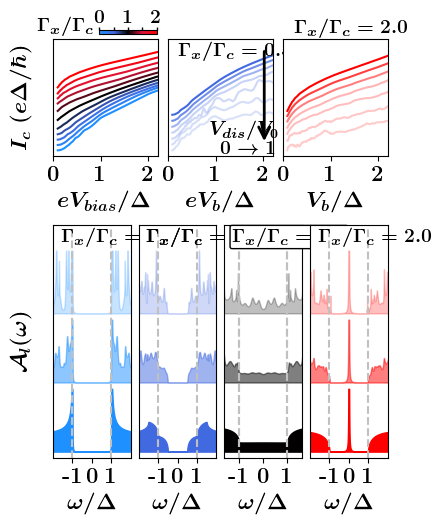

In [319]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# from pylab import *
# from numarray import *
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import csv
import ast

def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False,spectra_index =False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        if spectra_index:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['v_tau','Magnetic Field', 'Energy', 'DOS'])
        else:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    if spectra_index:
        df = df.astype({
            'Magnetic Field': float,
            'Energy': float,
           'DOS': float
            })
        # 确保磁场方向正确
        df = df.sort_values(by='Magnetic Field')
    else:
        df = df.astype({
            'Bias Voltage': float,
            'Current': float,
           'SidebandN': int
        })
        
        # 确保磁场方向正确
        df = df.sort_values(by='Bias Voltage')
        
    return metadata, df

# ======================
# 画图参数设置函数 - 修改为与代码2一致
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
    # 字体大小设置 - 与代码2一致
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16  # 修改为16，与代码2一致
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置 - 保留代码1中的颜色，但使用代码2的命名
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black',
        'bottom_panel1': 'grey',  # 蓝色
        'bottom_panel2': 'blue',  # 橙色
        'bottom_panel3': 'red',  # 绿色
        'top_panel1': 'blue',     # 蓝色
        'top_panel2': 'red'      # 红色
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 1.5}
    }
    
    # 透明度设置 - 与代码2一致
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7,
        'top_min': 0.2,
        'top_max': 1.0,
        'bottom_area': 0.6
    }
    
    # 图例设置 - 与代码2一致
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'  # 与代码2一致
    }
    
    # 刻度设置 - 与代码2一致
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置 - 与代码2一致
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

def clip_data_to_range(data, baseline, max_height):
    """
    将数据限制在baseline到baseline + max_height范围内
    超出范围的部分设为NaN
    """
    clipped_data = data.copy()
    # 将超过baseline + max_height的部分设为NaN
    clipped_data[data > max_height] = max_height #np.nan
    return clipped_data

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    # width = 3.847 * 1.5
    # height = 0.64 * width * 1.8

    width = 3.847 * 1.00
    height = 0.64 * width * 2.0
    
    fig = plt.figure(figsize=(width, height))
    
    # 创建2行的GridSpec
    gs = GridSpec(2, 1, height_ratios=[1, 2.], hspace=0.4)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    transparencies = plot_config['transparencies']
    
    # ======================
    # 第一行：2个panel - 使用透明度区分Vdis
    # ======================
    gs_top = GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0], wspace=0.1)

    ax0_add = fig.add_subplot(gs_top[0, 0])

    
    # file_path = "DC_IV_2D_Bs_vtau=0.882.csv"
    file_path = "DC_IV_2D_Bs_vtau=0.882_inflead_lines.csv"
    # 读取数据 
    metadata, df = read_dc_data(file_path, twoD_index=True)
    # 获取唯一B值和相位值
    
    b_values = np.sort(df['Magnetic Field'].unique()).astype(float)
    
    vbias_values = np.sort(df['Bias Voltage'].unique())/0.3


    # 设置colormap - 使用seismic colormap
    # cmap = cm.get_cmap('PRGn')
    # colors = ['blue','darkblue', 'black', 'darkred','red']
    # colors_add = ['#2E86AB', '#1B5E8E', 'black', '#C44536', '#D72638']
    # colors_add = ['#1E90FF', '#4169E1', 'black', '#DC143C', '#FF0000']
    # colors_add = ['#00BFFF', '#1E90FF', 'black', '#FF4500', '#FF0000']
    # colors_add = ['#00FFFF', '#0000FF', 'black', '#FF00FF', '#FF0000']
    
    # colors_add = ['#00CED1', '#0000CD', 'black', '#FF8C00', '#FF0000']
    colors_add = ['#1E90FF', '#4169E1', 'black', '#DC143C', '#FF0000']
    cmap_Bs = mcolors.LinearSegmentedColormap.from_list('custom_diverging', colors_add, N=256)
    norm = Normalize(vmin=min(b_values), vmax=max(b_values))
    # print(cmap(norm(0.0)))
    # Bs_colors_cmap = cmap(np.linspace(0,1, len(b_values))) #  

    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 绘制数据
    for i0, B0 in enumerate(b_values):
        # print(B0)
        if i0%2==0:
            color = cmap_Bs(norm(B0))
            ax0_add.plot(vbias_values, current_matrix[i0, :] + 0.5*i0, color =color, alpha=1)
    
    # 设置轴标签
    ax0_add.set_xlabel(r'$\boldsymbol{eV_{bias}/\Delta}$', fontsize=sizes['label'])
    ax0_add.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/\hbar)}$', fontsize=sizes['label'],labelpad =15)
    ax0_add.set_xticks([0,1, 2,3])
    # 设置刻度标签为黑体，与代码2一致
    ax0_add.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax0_add.set_xlim([0,2.2])
    # ax0_add.set_ylim([-0.5,24])
    
    ax0_add.set_yticks([])
    ax0_add.set_yticklabels([])
    
    # Panel 1: 第一行左 - B=0.5
    ax0 = fig.add_subplot(gs_top[0, 1])
    
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882

    # 计算透明度梯度
    alpha_min = transparencies['top_min']
    alpha_max = transparencies['top_max']
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min] #np.linspace(alpha_max, alpha_min, len(Vdis_list))
    
    # alpha_values = list(reversed(alpha_values)) 
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax0.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax0.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color= cmap_Bs(norm(0.5)), #colors['top_panel1'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax0.set_yticks([])
    ax0.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$', fontsize=sizes['label'])
    ax0.set_ylabel(r"")
    
    # ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax0.set_xticks([0,1, 2,3])
    ax0.set_xlim([0,2.2])
    
    # 设置刻度标签为黑体，与代码2一致
    # ax0.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
    #                    color=tick_settings['color'], size=sizes['tick'])

    ax0.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    

    ax0.annotate('', xy=(0.92, 0.1), xytext=(0.92, 0.92), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=2,mutation_scale=20))
    ax0.text(0.40, 0.22, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    ax0.text(0.5, 0.05, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    ax0.text(0.1, 0.9, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    
    # Panel 2: 第一行右 - B=2.0
    ax1 = fig.add_subplot(gs_top[0, 2])
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax1.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color= cmap_Bs(norm(2.0)), #colors['top_panel2'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax1.set_xlabel(r'$\boldsymbol{V_{b}/\Delta}$', fontsize=sizes['label'])
    ax1.set_yticks([])
    ax1.tick_params(labelleft=False)
    ax1.set_xticks([0,1, 2,3])
    # 设置刻度标签为黑体，与代码2一致
    ax1.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax1.text(0.1, 1.1, r'$\boldsymbol{\Gamma_x/\Gamma_c = 2.0}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)


    ax1.set_xlim([0.00,2.2])

    # ======================
    # 第二行：3个panel - 使用area plot，每个panel一个颜色
    # ======================
    gs_bottom = GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[1], wspace=0.1)
    
    # 定义bottom panel的颜色和offset
    bottom_colors = [
        colors['bottom_panel1'],  # Panel 3
        colors['bottom_panel2'],  # Panel 4  
        colors['bottom_panel3']   # Panel 5
    ]
    
    # 根据幅度差异设置不同的offset量
    # bottom_offsets = [0.2, 0.1, 0.1]  # 对应三个panel的offset
    
    # 设置每条线允许的最大高度（相对于baseline）
    line_max_heights = [0.1, 0.1, 0.1,0.1] #[0.3, 0.08, 0.3]  # 每个panel中line的最大高度
    bottom_offsets = [i*1.1 for i in line_max_heights]
    
    Vdis_list_bottom = [0.0, 0.2, 0.5] #, 0.8], 1.0
    alpha_index = [0, 2, 4]
    
    # Bs = [0.0,]
    # Panel 3: 第二行左 - B=0.0
    B0 = 0
    ax2 = fig.add_subplot(gs_bottom[0, 0])
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        # 获取当前曲线的数据
        y_data = DOS_matrix[0, :]
        baseline = i0 * bottom_offsets[0]  # 零线位置
        
        # 限制line的高度，只显示baseline到baseline + max_height的部分
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[0])
        
        # 绘制area plot - 填充从零线到数据点的区域
        # 使用原始数据绘制填充，保持area plot的连续性
        ax2.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)), #bottom_colors[0], 
                        alpha = alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        
        # 使用限制高度后的数据绘制轮廓线
        # ax2.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[0], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    ax2.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)

    # 修改轴标签设置，与代码2一致
    ax2.set_yticks([])
    ax2.set_xticks([-1,0,1])
    # 设置刻度标签为黑体，与代码2一致
    ax2.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax2.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax2.set_ylabel(r'$\boldsymbol{\mathcal{A}_l(\omega)}$', fontsize=sizes['label'],labelpad=15)
    ax2.set_xlim([-2.0, 2.0])
    ax2.set_ylim([-0.01,0.36])
    ax2.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)

    # Panel 4: 第二行中 - B=0.5
    B0 = 0.5
    ax3 = fig.add_subplot(gs_bottom[0, 1])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[1, :]
        baseline = i0 * bottom_offsets[1]  # 使用较小的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[1])
        
        # 绘制area plot
        ax3.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)),#bottom_colors[1], 
                        alpha= alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
    
        # 使用限制高度后的数据绘制轮廓线
        # ax3.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[1], 
        #         linewidth=1.0, 
        #         alpha=0.9)

    ax3.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax3.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax3.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax3.set_yticks([])

    ax3.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax3.set_ylabel('')
    ax3.tick_params(labelleft=False)
    ax3.set_xlim([-2.0, 2.0])
    ax3.set_ylim([-0.01,0.36])

    # added B =1.0  
    B0 = 1.0
    ax2_add = fig.add_subplot(gs_bottom[0, 2])
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values

        y_data = DOS_matrix[2, :]
        baseline = i0 * bottom_offsets[2]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[2])
        
        # 绘制area plot
        ax2_add.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)),
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )

    ax2_add.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2_add.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2_add.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 0.5}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax2_add.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax2_add.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax2_add.set_yticks([])

    ax2_add.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax2_add.set_ylabel('')
    ax2_add.tick_params(labelleft=False)
    ax2_add.set_xlim([-2.0, 2.0])
    ax2_add.set_ylim([-0.01,0.36])
    
    # Panel 5: 第二行右 - B=2.0
    B0 = 2.0
    ax4 = fig.add_subplot(gs_bottom[0, 3])
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[4, :]
        baseline = i0 * bottom_offsets[3]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[3])
        
        # 绘制area plot
        ax4.fill_between(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)), #bottom_colors[2], 
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )

    
        # 使用限制高度后的数据绘制轮廓线
        # ax4.plot(E_values/0.3, baseline + y_data_clipped, 
        #         color=bottom_colors[2], 
        #         linewidth=1.0, 
        #         alpha=0.9)
    
    ax4.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 2.0}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)
    # 修改轴标签设置，与代码2一致
    ax4.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax4.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax4.set_yticks([])
    ax4.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax4.set_ylabel('')
    ax4.tick_params(labelleft=False)
    ax4.set_xlim([-2.0, 2.0])
    ax4.set_ylim([-0.01,0.36])


    ax2_add.axvline(x=1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2_add.axvline(x=-1, ymin=0, ymax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2_add.text(0.1, 0.95, r'$\boldsymbol{\Gamma_x/\Gamma_c = 1.0}$', transform=ax2_add.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                 bbox=dict(boxstyle='round',  # 边框样式，这里用圆角矩形
                  facecolor='white',  # 背景色 # edgecolor='none',  # 边框颜色
                  alpha = 1,  # 透明度
                  pad=0.1)  # 文本与边框之间的填充
                )
    
    # 修改轴标签设置，与代码2一致
    ax2_add.set_xticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax2_add.set_xticklabels([r"\bf{-1}", r"\bf{0}", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax2_add.set_yticks([])
    ax2_add.set_xlabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax2_add.set_ylabel('')
    ax2_add.tick_params(labelleft=False)
    ax2_add.set_xlim([-1.6, 1.6])
    ax2_add.set_ylim([-0.01,0.36])

    # 创建colorbar的位置
    cbar_top_ax = fig.add_axes([0.2, 0.96, 0.15, 0.01])  # 调整位置在底部
    
    # 创建共用colorbar
    cbar_top = mpl.colorbar.ColorbarBase(cbar_top_ax, 
                                         cmap= cmap_Bs,  # 使用其中一个colormap
                                           norm=mpl.colors.Normalize(vmin=0, vmax=2),
                                           orientation='horizontal')
    
    # 隐藏所有刻度
    # cbar_top.ax.tick_params(which='both', labelbottom=False, labeltop=True)

    cbar_top.set_label(r"$\boldsymbol{\Gamma_x /\Gamma_c}$", fontsize = sizes['cbar_label'], rotation=0,
                       x= -0.6, labelpad=-15, verticalalignment='bottom') # 
    
    cbar_top.set_ticks([0, 0.5, 1, 1.5, 2])
    cbar_top.ax.tick_params(direction='out',
                            labelsize =  sizes['cbar_tick'],
                            length = 2.0 ,#tick_settings['length'],
                            width= 1,
                            pad= 0) #tick_settings['width'])
    
    cbar_top.ax.xaxis.set_ticks_position('top')
    cbar_top.ax.xaxis.set_label_position('top')
    cbar_top.ax.set_xticklabels([r"\bf{0}",r"", r"\bf{1}", r"",r"\bf{2}"]) 
    
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.10, top=0.95)
    
    output_path = os.path.join(dirF, "Fig3_v5.png")
    pdf_output_path = os.path.join(dirF, "Fig3_v5.pdf")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

Directory already exists: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection
Plot saved to: /home/zengcc/JJ_nw_notebook/Jun12th_2025_SNS_Calc/SNS_DC_12th/Plots_collection/Fig3_v6.png


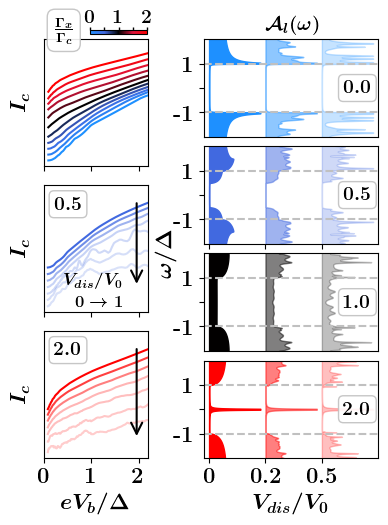

In [404]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
# from pylab import *
# from numarray import *
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import csv
import ast

def read_select_data(file_path, columns_to_read=None):
    """Load data with option to select specific columns"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # Parse arrays
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # Convert numeric values
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # Skip header if present
    header = None
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            header = [col.strip() for col in data_lines[0].split(',')]
            data_lines = data_lines[1:]
    
    # Process data lines
    data = []
    for line in data_lines:
        if line:
            values = line.split(',')
            try:
                # Convert to float where possible
                row = []
                for v in values:
                    try:
                        row.append(float(v))
                    except ValueError:
                        row.append(v.strip())
                data.append(row)
            except:
                data.append([v.strip() for v in values])
    
    if not data:
        return metadata, pd.DataFrame()
    
    # Create DataFrame with or without header
    if header:
        df = pd.DataFrame(data, columns=header)
    else:
        df = pd.DataFrame(data, columns=[f'col_{i}' for i in range(len(data[0]))])
    
    # Convert columns to numeric where possible
    for col in df.columns:
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass
    
    # Select specific columns if requested
    if columns_to_read:
        available_cols = set(df.columns)
        selected_cols = [col for col in columns_to_read if col in available_cols]
        
        if not selected_cols:
            raise ValueError(f"None of the requested columns {columns_to_read} found in data")
        
        # Check for case sensitivity issues
        if len(selected_cols) < len(columns_to_read):
            missing = set(columns_to_read) - set(selected_cols)
            print(f"Warning: Some columns not found: {missing}. Using available columns.")
        
        df = df[selected_cols]
    
    return metadata, df

def read_dc_data(file_path, twoD_index= False,spectra_index =False):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    if twoD_index:
        if spectra_index:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['v_tau','Magnetic Field', 'Energy', 'DOS'])
        else:
            df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=['Magnetic Field', 'Bias Voltage', 'Current','SidebandN'])
    
    else:
        df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                          columns=[ 'Bias Voltage', 'Current','SidebandN'])

    # 转换数据类型
    if spectra_index:
        df = df.astype({
            'Magnetic Field': float,
            'Energy': float,
           'DOS': float
            })
        # 确保磁场方向正确
        df = df.sort_values(by='Magnetic Field')
    else:
        df = df.astype({
            'Bias Voltage': float,
            'Current': float,
           'SidebandN': int
        })
        
        # 确保磁场方向正确
        df = df.sort_values(by='Bias Voltage')
        
    return metadata, df

# ======================
# 画图参数设置函数 - 修改为与代码2一致
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    mpl.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
    # 字体大小设置 - 与代码2一致
    label_size = 16
    title_size = 14
    legend_size = 14
    tick_size = 16  # 修改为16，与代码2一致
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置 - 保留代码1中的颜色，但使用代码2的命名
    colors = {
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black',
        'bottom_panel1': 'grey',  # 蓝色
        'bottom_panel2': 'blue',  # 橙色
        'bottom_panel3': 'red',  # 绿色
        'top_panel1': 'blue',     # 蓝色
        'top_panel2': 'red'      # 红色
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 1.5}
    }
    
    # 透明度设置 - 与代码2一致
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7,
        'top_min': 0.2,
        'top_max': 1.0,
        'bottom_area': 0.6
    }
    
    # 图例设置 - 与代码2一致
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'  # 与代码2一致
    }
    
    # 刻度设置 - 与代码2一致
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置 - 与代码2一致
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

def clip_data_to_range(data, baseline, max_height):
    """
    将数据限制在baseline到baseline + max_height范围内
    超出范围的部分设为NaN
    """
    clipped_data = data.copy()
    # 将超过baseline + max_height的部分设为NaN
    clipped_data[data > max_height] = max_height #np.nan
    return clipped_data

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    # width = 3.847 * 1.5
    # height = 0.64 * width * 1.8

    width = 3.847 * 1.00
    height = 0.64 * width * 2.0
    
    fig = plt.figure(figsize=(width, height))
    
    # 创建2行的GridSpec
    gs = GridSpec(1, 2, width_ratios=[0.6, 1], wspace=0.4)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    transparencies = plot_config['transparencies']
    
    # ======================
    # 第一行：2个panel - 使用透明度区分Vdis
    # ======================
    gs_top = GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0], height_ratios = [1,1,1,],hspace=0.15)

    ax0_add = fig.add_subplot(gs_top[0, 0])
    ax0 = fig.add_subplot(gs_top[1, 0])
    ax1 = fig.add_subplot(gs_top[2, 0]) 
    
    
    # file_path = "DC_IV_2D_Bs_vtau=0.882.csv"
    file_path = "DC_IV_2D_Bs_vtau=0.882_inflead_lines.csv"
    # 读取数据 
    metadata, df = read_dc_data(file_path, twoD_index=True)
    # 获取唯一B值和相位值
    
    b_values = np.sort(df['Magnetic Field'].unique()).astype(float)
    
    vbias_values = np.sort(df['Bias Voltage'].unique())/0.3


    # 设置colormap - 使用seismic colormap
    # cmap = cm.get_cmap('PRGn')
    # colors = ['blue','darkblue', 'black', 'darkred','red']
    # colors_add = ['#2E86AB', '#1B5E8E', 'black', '#C44536', '#D72638']
    colors_add = ['#1E90FF', '#4169E1', 'black', '#DC143C', '#FF0000']
    # colors_add = ['#00BFFF', '#1E90FF', 'black', '#FF4500', '#FF0000']
    # colors_add = ['#00FFFF', '#0000FF', 'black', '#FF00FF', '#FF0000']
    
    # colors_add = ['#00CED1', '#0000CD', 'black', '#FF8C00', '#FF0000']
       
    cmap_Bs = mcolors.LinearSegmentedColormap.from_list('custom_diverging', colors_add, N=256)
    norm = Normalize(vmin=min(b_values), vmax=max(b_values))
    # print(cmap(norm(0.0)))
    # Bs_colors_cmap = cmap(np.linspace(0,1, len(b_values))) #  

    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='Magnetic Field', columns='Bias Voltage', values='Current').values
    
    # 绘制数据
    for i0, B0 in enumerate(b_values):
        # print(B0)
        if i0%2==0:
            color = cmap_Bs(norm(B0))
            ax0_add.plot(vbias_values, current_matrix[i0, :] + 0.5*i0, color =color, alpha=1)
    
    # 设置轴标签
    # ax0_add.set_xlabel(r'$\boldsymbol{eV_{bias}/\Delta}$', fontsize=sizes['label'])
    
    ax0_add.set_ylabel(r'$\boldsymbol{I_c}$', fontsize=sizes['label'],labelpad =10) # ~(e\Delta/\hbar)
    ax0_add.set_xticks([0,1, 2])
    ax0_add.set_xticklabels([r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax0_add.set_xlim([0,2.2])
    # ax0_add.set_ylim([-0.5,24])
    
    ax0_add.set_yticks([])
    ax0_add.set_yticklabels([])
    
    # Panel 1: 第一行左 - B=0.5
    # ax0 = fig.add_subplot(gs_top[0, 1])
    
    Vdis_list = [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]
    vtau = 0.882

    # 计算透明度梯度
    alpha_min = transparencies['top_min']
    alpha_max = transparencies['top_max']
    alpha_values = [alpha_max,
                    alpha_max*0.75, 
                    alpha_max*0.5,
                    alpha_min*1.45,
                    alpha_min*1.25,
                    alpha_min*1.1,
                    alpha_min] #np.linspace(alpha_max, alpha_min, len(Vdis_list))
    
    # alpha_values = list(reversed(alpha_values)) 
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=0.5_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax0.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax0.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color= cmap_Bs(norm(0.5)), #colors['top_panel1'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax0.set_yticks([])
    # ax0.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$', fontsize=sizes['label'])
    
    ax0.set_ylabel(r'$\boldsymbol{I_c}$', fontsize=sizes['label'],labelpad =10)
    
    # ax0.set_ylabel(r'$\boldsymbol{I_c~(e\Delta/h)}$', fontsize=sizes['label'],labelpad =15)
    ax0.set_xticks([0,1,2])
    ax0.set_xlim([0,2.2])
    ax0.set_xticklabels([r"", r"", r""], 
                       color=tick_settings['color'], size=sizes['tick'])

    ax0.annotate('', xy=(0.89, 0.2), xytext=(0.89, 0.88), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=20))
    ax0.text(0.20, 0.25, r'$\boldsymbol{V_{dis}/V_0}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize= sizes['legend']-2, rotation=0)
    ax0.text(0.3, 0.08, r'$\boldsymbol{0 \rightarrow 1}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend']-2, rotation=0)
    ax0.text(0.1, 0.85, r'$\boldsymbol{0.5}$', transform=ax0.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )



    # Panel 2: 第一行右 - B=2.0
    # ax1 = fig.add_subplot(gs_top[0, 2])
    
    # 使用单一颜色但不同透明度绘制数据
    for i0, Vdis in enumerate(Vdis_list):
        file_path = f"DC_adaptive=True_B=2.0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
        
        metadata, df = read_dc_data(file_path)
        if i0 ==-1:
            ax1.plot(df['Bias Voltage'].values/0.3, df['Current'].values - 1.0*(i0),
                     color = 'k', 
                     alpha = 1,
                     linewidth=line_styles['default']['linewidth'])
        else:
            ax1.plot(df['Bias Voltage'].values[3:]/0.3, df['Current'].values[3:] - 1.0*(i0),
                     color= cmap_Bs(norm(2.0)), #colors['top_panel2'], 
                     alpha = alpha_values[i0],
                     linewidth=line_styles['default']['linewidth'])
    
    # 修改轴标签设置，与代码2一致
    ax1.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$', fontsize=sizes['label'])
    ax1.set_ylabel(r'$\boldsymbol{I_c}$', fontsize=sizes['label'],labelpad =10)
    ax1.set_yticks([])
    ax1.tick_params(labelleft=False)
    ax1.set_xticks([0,1, 2,3])
    # 设置刻度标签为黑体，与代码2一致
    ax1.set_xticklabels([r"\bf{0}", r"\bf{1}", r"\bf{2}", r"\bf{3}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax1.text(0.1, 0.85, r'$\boldsymbol{2.0}$', transform=ax1.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )

    ax1.annotate('', xy=(0.89, 0.15), xytext=(0.89, 0.88), xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, mutation_scale=20))
    ax1.set_xlim([0.00,2.2])

    # ======================
    # 第二行：3个panel - 使用area plot，每个panel一个颜色
    # ======================
    gs_bottom = GridSpecFromSubplotSpec(4, 1, subplot_spec=gs[1], height_ratios= [1,1,1,1],hspace=0.1)
    ax2 = fig.add_subplot(gs_bottom[0, 0])    
    ax3 = fig.add_subplot(gs_bottom[1, 0])
    ax2_add = fig.add_subplot(gs_bottom[2, 0])
    ax4 = fig.add_subplot(gs_bottom[3, 0])

    
    # 定义bottom panel的颜色和offset
    bottom_colors = [
        colors['bottom_panel1'],  # Panel 3
        colors['bottom_panel2'],  # Panel 4  
        colors['bottom_panel3']   # Panel 5
    ]
    
    # 根据幅度差异设置不同的offset量
    # bottom_offsets = [0.2, 0.1, 0.1]  # 对应三个panel的offset
    
    # 设置每条线允许的最大高度（相对于baseline）
    line_max_heights = [0.1, 0.1, 0.1,0.1] #[0.3, 0.08, 0.3]  # 每个panel中line的最大高度
    bottom_offsets = [i*1.1 for i in line_max_heights]
    
    Vdis_list_bottom = [0.0, 0.2, 0.5] #, 0.8], 1.0
    alpha_index = [0, 2, 4]
    
    # Bs = [0.0,]
    # Panel 3: 第二行左 - B=0.0
    B0 = 0
    # ax2 = fig.add_subplot(gs_bottom[0, 0])
    ax2.axhline(y=1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2.axhline(y=-1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        # 获取当前曲线的数据
        y_data = DOS_matrix[0, :]
        baseline = i0 * bottom_offsets[0]  # 零线位置
        
        # 限制line的高度，只显示baseline到baseline + max_height的部分
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[0])
        
        # 绘制area plot - 填充从零线到数据点的区域
        # 使用原始数据绘制填充，保持area plot的连续性
        ax2.fill_betweenx(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)), #bottom_colors[0], 
                        alpha = alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )
        

    # 修改轴标签设置，与代码2一致
    ax2.set_xticks([])
    ax2.set_yticks([-1,0,1])
    # 设置刻度标签为黑体，与代码2一致
    ax2.set_yticklabels([r"\bf{-1}", r" ", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    # ax2.set_ylabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    
    # ax2.set_xlabel(r'$\boldsymbol{\mathcal{A}_l(\omega)}$', fontsize=sizes['label'],labelpad=15)
    ax2.text(0.35, 1.15, r'$\boldsymbol{\mathcal{A}_l(\omega)}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0)    
    
    
    ax2.set_ylim([-2.0, 2.0])
    ax2.set_xlim([-0.01,0.33])
    
    ax2.text(0.8, 0.5, r'$\boldsymbol{0.0}$', transform=ax2.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    # Panel 4: 第二行中 - B=0.5
    B0 = 0.5
    # ax3 = fig.add_subplot(gs_bottom[0, 1])
    ax3.axhline(y=1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
    ax3.axhline(y=-1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
        
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[1, :]
        baseline = i0 * bottom_offsets[1]  # 使用较小的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[1])
        
        # 绘制area plot
        ax3.fill_betweenx(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)),#bottom_colors[1], 
                        alpha= alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )


    ax3.text(0.8, 0.5, r'$\boldsymbol{0.5}$', transform=ax3.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    
    # 修改轴标签设置，与代码2一致
    ax3.set_yticks([-1.0, 0,1.0])
    # 设置刻度标签为黑体，与代码2一致
    ax3.set_yticklabels([r"\bf{-1}", r"", r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax3.set_xticks([0, 1 * bottom_offsets[3], 2*bottom_offsets[3]])
    ax3.set_xticklabels([])
    
    # ax3.set_ylabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    ax3.set_xlabel('')
    # ax3.tick_params(labelleft=False)
    ax3.set_ylim([-2.0, 2.0])
    ax3.set_xlim([-0.01,0.33])

    # added B =1.0  
    B0 = 1.0
    # ax2_add = fig.add_subplot(gs_bottom[0, 2])
    ax2_add.axhline(y=1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
    ax2_add.axhline(y=-1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values

        y_data = DOS_matrix[2, :]
        baseline = i0 * bottom_offsets[2]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[2])
        
        # 绘制area plot
        ax2_add.fill_betweenx(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)),
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )

    ax2_add.text(0.8, 0.5, r'$\boldsymbol{1.0}$', transform=ax2_add.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    
    # 修改轴标签设置，与代码2一致
    ax2_add.set_yticks([-1.0, 0,1.0])
    ax2_add.set_yticklabels([r'\bf{-1}', r"", r'\bf{1}'], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax2_add.set_xticks([])

    # ax2_add.set_ylabel(r'$\boldsymbol{\omega/\Delta}$', fontsize=sizes['label'])
    
    ax2_add.set_xlabel('')
    # ax2_add.tick_params(labelleft=False)
    ax2_add.set_ylim([-2.0, 2.0])
    
    ax2_add.set_xlim([-0.01,0.33])
    
    # Panel 5: 第二行右 - B=2.0
    B0 = 2.0
    # ax4 = fig.add_subplot(gs_bottom[0, 3])
    ax4.axhline(y=1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
    ax4.axhline(y=-1, xmin=0, xmax=3, linestyle='--',color='silver', linewidth=1.5)
    
    for i0, Vdis in enumerate(Vdis_list_bottom):
        file_path = f"SPECTRA_adaptive=True_V_tau=0.882_5Bs_Vdis={Vdis:.1f}.csv"
        
        metadata, df = read_dc_data(file_path, twoD_index=True, spectra_index=True)
        E_values = np.sort(df['Energy'].unique())
        b_values = np.sort(df['Magnetic Field'].unique())/0.3
        
        DOS_matrix = df.pivot(index='Magnetic Field', columns='Energy', values='DOS').values
        
        y_data = DOS_matrix[4, :]
        baseline = i0 * bottom_offsets[3]  # 使用较大的offset
        
        # 限制line的高度
        y_data_clipped = clip_data_to_range(y_data, baseline, line_max_heights[3])
        
        # 绘制area plot
        ax4.fill_betweenx(E_values/0.3, baseline, baseline + y_data_clipped,
                        color= cmap_Bs(norm(B0)), #bottom_colors[2], 
                        alpha =  alpha_values[alpha_index[i0]] #transparencies['bottom_area']
                        )

    
    ax4.text(0.8, 0.5, r'$\boldsymbol{2.0}$', transform=ax4.transAxes, 
             ha='left', va='center', fontsize=sizes['legend'], rotation=0,
                                bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.25)
            )
    
    ax4.set_yticks([-1.0, 0,1.0])
    ax4.set_yticklabels([r'\bf{-1}', r"", r'$\boldsymbol{1}$'], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # ax4.set_yticklabels([r'$\boldsymbol{-\Delta}$', r"", r'$\boldsymbol{\Delta}$'], 
    #                    color=tick_settings['color'], size=sizes['tick'])
    
    ax4.set_xticks([0, 1 * bottom_offsets[3], 2*bottom_offsets[3]])
    ax4.set_xticklabels([r"\bf{0}", r"\bf{0.2}", r"\bf{0.5}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    ax4.set_xlabel(r'$\boldsymbol{V_{dis}/V_0}$', fontsize=sizes['label'])
    


    # ax4.tick_params(labelleft=False)
    ax4.set_ylim([-2.0, 2.0])
    ax4.set_xlim([-0.01,0.33])

    # ax2.set_ylabel(r'$\boldsymbol{{\omega}/{\Delta}}$', fontsize=sizes['label'],labelpad=-2 ) # r'$\boldsymbol{\frac{\omega}{\Delta}}$'
    # ax3.set_ylabel(r'$\boldsymbol{{\omega}/{\Delta}}$', fontsize=sizes['label'],labelpad=-2 )
    # ax4.set_ylabel(r'$\boldsymbol{{\omega}/{\Delta}}$', fontsize=sizes['label'],labelpad=-2 )
    # ax2_add.set_ylabel(r'$\boldsymbol{{\omega}/{\Delta}}$', fontsize=sizes['label'],labelpad=-2 )
    
    ax2_add.text(-0.28, 1, r'$\boldsymbol{{\omega}/{\Delta}}$', fontsize=sizes['label'], transform=ax2_add.transAxes, 
             ha='left', va='center',  rotation= 90
            ) 
    
    # ax2.text(-0.2, 1, r'$\boldsymbol{\frac{\omega}{\Delta}}$', fontsize=sizes['label'], transform=ax2.transAxes, 
    #          ha='left', va='center',  rotation=0
    #         )    
    # 创建colorbar的位置
    cbar_top_ax = fig.add_axes([0.2, 0.96, 0.15, 0.01])  # 调整位置在底部
    
    # 创建共用colorbar
    cbar_top = mpl.colorbar.ColorbarBase(cbar_top_ax, 
                                         cmap= cmap_Bs,  # 使用其中一个colormap
                                           norm=mpl.colors.Normalize(vmin=0, vmax=2),
                                           orientation='horizontal')
    
    # 隐藏所有刻度
    # cbar_top.ax.tick_params(which='both', labelbottom=False, labeltop=True)

    cbar_top.set_label(r"$\boldsymbol{\frac{\Gamma_x} {\Gamma_c}}$", fontsize = sizes['cbar_label'], rotation=0,
                       x= -0.45, labelpad=-18, verticalalignment='bottom',
                    bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.4)
                      ) # 

    # cbar_top.set_label(r"$\boldsymbol{{\Gamma_x} /{\Gamma_c}}$", fontsize = sizes['cbar_label'], rotation=0,
    #                    x= -0.7, labelpad=-16, verticalalignment='bottom',
    #                 bbox=dict(boxstyle='round',  facecolor='white', edgecolor ='silver',alpha = 0.9,pad=0.2)
    #                   ) #     
    cbar_top.set_ticks([0, 0.5, 1, 1.5, 2])
    cbar_top.ax.tick_params(direction='out',
                            labelsize =  sizes['cbar_tick'],
                            length = 2.0 ,#tick_settings['length'],
                            width= 1,
                            pad= 0) #tick_settings['width'])
    
    cbar_top.ax.xaxis.set_ticks_position('top')
    cbar_top.ax.xaxis.set_label_position('top')
    cbar_top.ax.set_xticklabels([r"\bf{0}",r"", r"\bf{1}", r"",r"\bf{2}"]) 
    
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.95, bottom=0.10, top=0.95)
    
    output_path = os.path.join(dirF, "Fig3_v6.png")
    pdf_output_path = os.path.join(dirF, "Fig3_v6.pdf")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    
    print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

# pre Fig 4, check for the CPR and corresponding DC_IV 

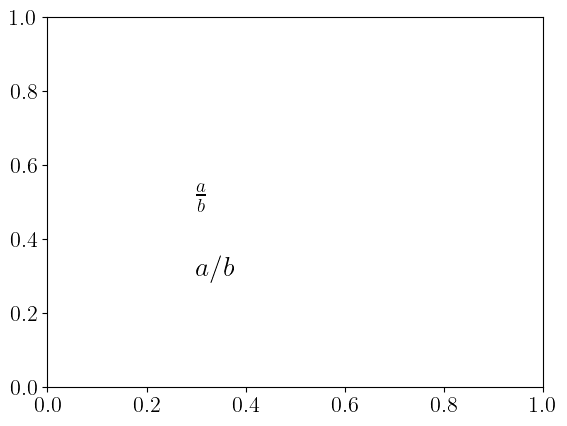

In [359]:
import matplotlib.pyplot as plt

plt.figure()
# 使用竖直分式
plt.text(0.3, 0.5, r'$\frac{a}{b}$', fontsize=20)
# 使用斜线分式（倾斜）
plt.text(0.3, 0.3, r'$a/b$', fontsize=20)
plt.show()

# pre Fig 4, check the Q factor for RCSJ model 

# we need to read the dc_iv file as well as the CPR file and try to calculate the Q factor
# with various vtau, with various B, and later, with various disorder effect

2.597801156381929
46.40063695522216
57.51922382367178
105.21266895579488


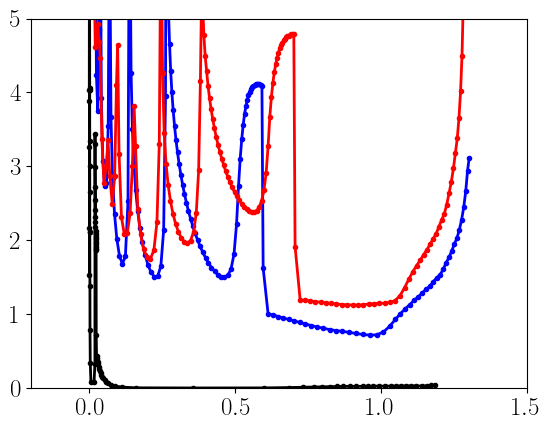

In [69]:

# Physical Constants (SI units)
# -------------------------
H_BAR = 1.0545718e-34    # Reduced Planck constant (J·s)
H = 4.135667696e-15      # in eV*s
E_CHARGE = 1.60217662e-19  # Electron charge (C)
PI = np.pi
KB = 1.380649e-23        # Boltzmann constant (J/K)
current_factor = E_CHARGE*0.3e-3/H*10**9   # unit in nA
# reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3
reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9 *0.3
cap_farads =0.01e-15  # in fF


Vdis =0.0
# vtau =0.882

# vtaus = [0.882,1.000]
vtaus = [0.338, 0.842, 0.882]
colors = ['k','b','r','g']

file_path = f"CPR_B=0.0_Vdis=0.0_Vtaus=4s_disorder1.csv"
metadata, df_cpr = read_cpr_data(file_path)
vtaus = np.sort(df_cpr['v_tau'].unique())
phase_values = np.sort(df_cpr['Phase'].unique())



# 重塑数据为矩阵
current_matrix = df_cpr.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
for i0, vtau in enumerate(vtaus):
    ## obtain the DC current, for the resistance
    
    file_path = f"DC_adaptive=True_B=0_Vdis={Vdis:.1f}_Vtau={vtau:.3f}_disorder1.csv"
    metadata, df = read_dc_data(file_path)

    ## obtain the CPR, for the Ic
    Ic = np.max(current_matrix[i0,:])* reduced_factor/2*(2*np.pi)  # in nA
    print(Ic)
    plasma_freq = np.sqrt(2 * E_CHARGE *  Ic*1e-9/ (H_BAR * cap_farads)) # in Hz
    
    dc_current = df['Current'].values* reduced_factor /4 # in nA
    dc_voltage = df['Current'].values # in mV

    plt.plot(dc_current/Ic, np.abs(1/np.gradient(dc_current,dc_voltage[1]-dc_voltage[0])*1e6)*plasma_freq*cap_farads,'.-',
                     alpha = 1,
             color = colors[i0],
                     linewidth=2)
plt.ylim([-0,5])
plt.xlim([-0.2,1.5])
plt.show()

In [41]:
max(dc_current )

109.2969035806605

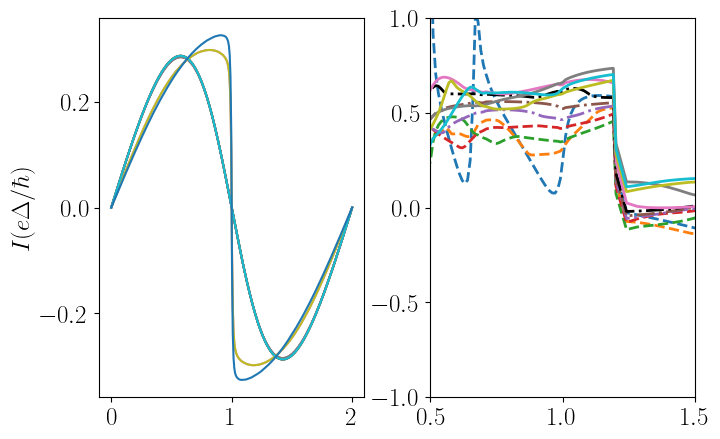

In [248]:
# Various magnetic fields, same vtau 
# Physical Constants (SI units)
# -------------------------
H_BAR = 1.0545718e-34    # Reduced Planck constant (J·s)
H = 4.135667696e-15      # in eV*s
E_CHARGE = 1.60217662e-19  # Electron charge (C)
PI = np.pi
KB = 1.380649e-23        # Boltzmann constant (J/K)
current_factor = E_CHARGE*0.3e-3/H*10**9   # unit in nA
# reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9*0.3*2
current_factor = 1.6e-19 * 0.3e-3/ (4.13e-15) * 1e9*2*np.pi  # in nA

cap_farads =  0.1* 1e-15  # in fF


Vdis =0.0
# vtau =0.882

# vtaus = [0.882,1.000]
vtaus = [0.338, 0.842, 0.882]



# let's first read the CPR and save the infor of Ic first. 
vtau =0.822
Bs = [0.0,0.25,0.5,0.75,0.9,1.0,1.1,1.25,1.5,1.75,2.0]
# i0s_ad = [0,0,1,1,1,0,2,1,3] # means the index order in Bs1,2,3,4

i0s_ad = [0,0,1,1,0,1,2,0,2,1,3]
Bs1 = [0, 0.5, 1.5, 2.0]
Bs2 = [0.25, 0.75]
Bs3 = [1.25, 1.75]
Bs4 = [0.9, 1.0,1.1]


width = 3.847 * 2
height = width * .64
fig = plt.figure(figsize=(width, height))

# 创建2行的GridSpec
gs = GridSpec(1, 2, width_ratios=[1, 1.], wspace=0.25)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

Ics = [] 
plasma_freqs = []
for i0, B in enumerate(Bs):
    
    if B in Bs:
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_4Bs.csv"
    elif B in Bs1:
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_2Bs_add0.csv"
    elif B in Bs2: 
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_2Bs_add1.csv"
    else:  
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_3Bs.csv"
        
    metadata, df_cpr = read_cpr_data(file_path)
    vtaus = np.sort(df_cpr['v_tau'].unique())
    phase_values = np.sort(df_cpr['Phase'].unique())
    # 重塑数据为矩阵
    current_matrix = df_cpr.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    
    Ic0 = np.max(current_matrix[i0s_ad[i0],:])  # in eDelta/hbar
    
    Ics.append(Ic0)
    plasma_freq0 = np.sqrt(2 * E_CHARGE * Ic0*1e-9*current_factor/ (H_BAR * cap_farads))
    plasma_freqs.append(plasma_freq0)
    
    ax0.plot(phase_values/(np.pi),current_matrix[i0s_ad[i0],:])
    
ax0.set_ylabel(r"$I (e\Delta/\hbar)$")

# Bs = [0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0]
Bs = [0.0,0.25,0.5,0.75,0.9,1.0,1.1,1.25,1.5,1.75,2.0] 
# colors = ['m','b','r','g','pink','k','','c','y','orange','grey']
colors = ['C0','C1','C2','C3','C4','C5','k','C6','C7','C8','C9','C10']

# next, try to calculate the Q factor for the above Ics and the dc_IVs below
for i0, B in enumerate(Bs):
    if B <=0.75:
        linestyle ='--'
    elif B>=1.25:
        linestyle = '-'
    else:
        linestyle ='-.'
    ## obtain the DC current, for the resistance
    
    file_path = f"DC_IV_RCSJ_vtau={vtau:.3f}_B={B:.2f}_Vdis=0.0_5Delta.csv"
    metadata, df = read_dc_data(file_path)

    ## obtain the CPR, for the Ic
    
    dc_current = df['Current'].values/(np.pi*2)/2  # in eDelta/hbar 
    dc_voltage = df['Bias Voltage'].values   # in mV
    
    Q_value  = np.abs(1e6*1/np.gradient(dc_current*current_factor,dc_voltage[1]-dc_voltage[0]))*plasma_freqs[i0]*cap_farads
    ax1.plot(dc_voltage/0.3,np.log10(Q_value) ,
             linestyle = linestyle,
                     alpha = 1,
             color = colors[i0],
                     linewidth=2)
ax1.set_ylim([-1,1])
ax1.set_xlim([0.5,1.5])
plt.show()

0.28501209665848476
0.28730936476263863
0.29836659294212053
0.32627681352306154


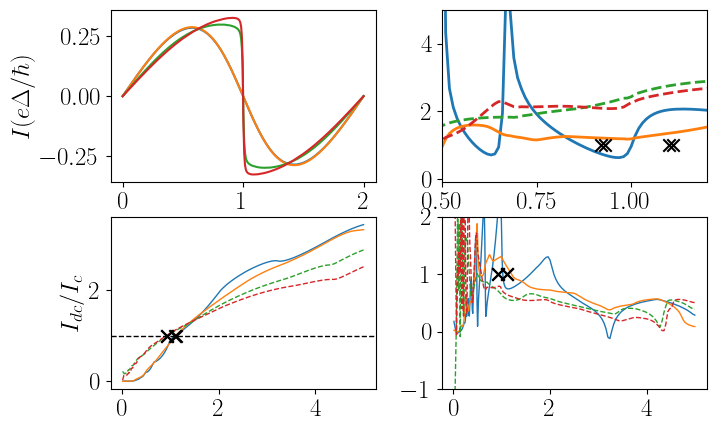

In [333]:
# Various magnetic fields, same vtau 
# Physical Constants (SI units)
# -------------------------
H_BAR = 1.0545718e-34    # Reduced Planck constant (J·s)
H = 4.135667696e-15      # in eV*s
E_CHARGE = 1.60217662e-19  # Electron charge (C)
PI = np.pi
KB = 1.380649e-23        # Boltzmann constant (J/K)
current_factor = E_CHARGE*0.3e-3/H*10**9   # unit in nA
# reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)/0.3

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9*0.3*2
current_factor0 = 1.6e-19 * 0.3e-3/ (4.13e-15) * 1e9*2*np.pi  # in nA

cap_farads =  0.2* 1e-15  # in fF


Vdis =0.0
# vtau =0.882

# vtaus = [0.882,1.000]
vtaus = [0.338, 0.842, 0.882]


# let's first read the CPR and save the infor of Ic first. 
vtau =0.822

Bs = [0.0,0.25,0.5,0.75,0.9,1.0,1.1,1.25,1.5,1.75,2.0]
# i0s_ad = [0,0,1,1,1,0,2,1,3] # means the index order in Bs1,2,3,4

# i0s_ad = [0,0,1,1,0,1,2,0,2,1,3]

Bs1 = [0, 0.5, 1.5, 2.0]
Bs2 = [0.25, 0.75]
Bs3 = [1.25, 1.75]
Bs4 = [0.9, 1.0,1.1]

i0s_ad = [0,1,2,3]
width = 3.847 * 2
height = width * .64
fig = plt.figure(figsize=(width, height))

# 创建2行的GridSpec
gs = GridSpec(2, 2, width_ratios=[1, 1.], wspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

Ics = [] 
plasma_freqs = []
for i0, B in enumerate(Bs1):
    
    if B in Bs:
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_4Bs.csv"
    elif B in Bs1:
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_2Bs_add0.csv"
    elif B in Bs2: 
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_2Bs_add1.csv"
    else:  
        file_path = f"CPR_RCSJ_vtau={vtau:.3f}_Vdis=0.0_3Bs.csv"
        
    metadata, df_cpr = read_cpr_data(file_path)
    vtaus = np.sort(df_cpr['v_tau'].unique())
    phase_values = np.sort(df_cpr['Phase'].unique())
    # 重塑数据为矩阵
    current_matrix = df_cpr.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    
    Ic0 = np.max(current_matrix[i0s_ad[i0],:])  # in eDelta/hbar
    print(Ic0)
    Ics.append(Ic0)
    plasma_freq0 = np.sqrt(2 * E_CHARGE * Ic0*1e-9*current_factor0/ (H_BAR * cap_farads))
    plasma_freqs.append(plasma_freq0)
    
    ax0.plot(phase_values/(np.pi),current_matrix[i0s_ad[i0],:])
    
ax0.set_ylabel(r"$I (e\Delta/\hbar)$")

# Bs = [0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0]
Bs = [0.0,0.25,0.5,0.75,0.9,1.0,1.1,1.25,1.5,1.75,2.0] 
# colors = ['m','b','r','g','pink','k','','c','y','orange','grey']
colors = ['C0','C1','C2','C3','C4','C5','k','C6','C7','C8','C9','C10']



ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

intersection_points = []
idx_list = [] 

# next, try to calculate the Q factor for the above Ics and the dc_IVs below
for i0, B in enumerate(Bs1):
    if B <=0.75:
        linestyle ='-'
    elif B>=1.25:
        linestyle = '--'
    else:
        linestyle ='-.'
    ## obtain the DC current, for the resistance

    file_path = f"DC_IV_RCSJ_vtau={vtau:.3f}_B={B:.2f}_Vdis=0.0_5Delta.csv" # for vtau =0.882 
    # file_path = f"DC_IV_RCSJ_vtau={vtau:.3f}_B={B:.2f}_Vdis=0.0_5Delta.csv"  # for vtau = 0.822
    # file_path = f"DC_IV_RCSJ_vtau={vtau:.3f}_B={B:.1f}_Vdis=0.0_5Delta_CP.csv" # for vtau =0.934 and above 
    
    metadata, df = read_dc_data(file_path)

    ## obtain the CPR, for the Ic
    
    dc_current = df['Current'].values/(np.pi*2)/2  # in eDelta/hbar 
    dc_voltage = df['Bias Voltage'].values   # in mV

    # 归一化电流
    normalized_current = dc_current/Ics[i0]
    normalized_voltage = dc_voltage/0.3
    
    # 寻找y=1的交点
    # 方法：找到电流值最接近1的点
    idx = np.argmin(np.abs(normalized_current - 1))
    idx_list.append(idx)
    intersection_voltage = normalized_voltage[idx]
    intersection_points.append((B, intersection_voltage))
    
    
    Q_value  = np.abs(1e6*1/np.gradient(dc_current*current_factor0,dc_voltage))*plasma_freqs[i0]*cap_farads

    # dc_current/Ics[i0], dc_voltage/0.3
    ax1.plot(dc_voltage/0.3, (Q_value), 
             linestyle = linestyle,
                     alpha = 1,
             color = colors[i0],
                     linewidth=2)
    # ax1.scatter(x_pos, Q_value[:,x_pos], color=colors[i], marker='x', s=80, zorder=5)
    ax2.plot(dc_voltage/0.3, dc_current/Ics[i0],
             linestyle = linestyle,
                     alpha = 1,
             color = colors[i0],
                     linewidth=1)
    ax3.plot(dc_voltage/0.3, np.gradient(dc_current,dc_voltage), #dc_voltage[1]-dc_voltage[0]
             
    linestyle = linestyle, alpha = 1,color = colors[i0],linewidth=1)

ax2.axhline(y=1, linestyle='--', 
                color='k', linewidth=1.0)  # 使用红色

ax2.set_ylabel(r"$I_{dc}/I_{c}$")

# 在panel 3 (ax2)中也标记交点以便验证
for i, (B, x_pos) in enumerate(intersection_points):
    ax2.scatter(x_pos, 1, color='k', marker='x', s=80, zorder=5)
    ax1.scatter(x_pos, 1, color='k', marker='x', s=80, zorder=5)
    ax3.scatter(x_pos, 1, color='k', marker='x', s=80, zorder=5)   
    
ax1.set_ylim([-0.1,5])
ax1.set_xlim([0.5,1.2])
# ax2.set_xlim([0.5,1.5])
# ax3.set_xlim([0.5,1.5])
ax3.set_ylim([-1,2])

plt.show()

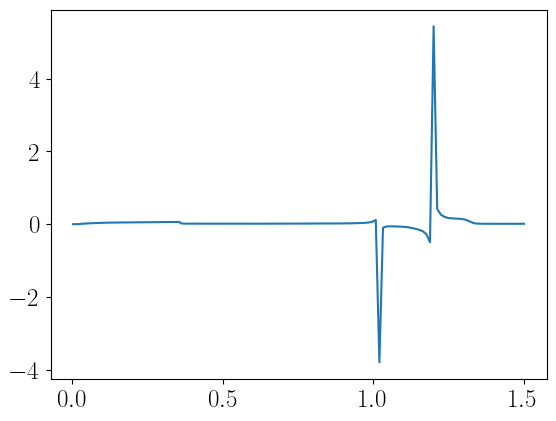

In [313]:
plt.plot(dc_voltage,1/np.gradient(dc_current*current_factor0,dc_voltage[1]-dc_voltage[0]))

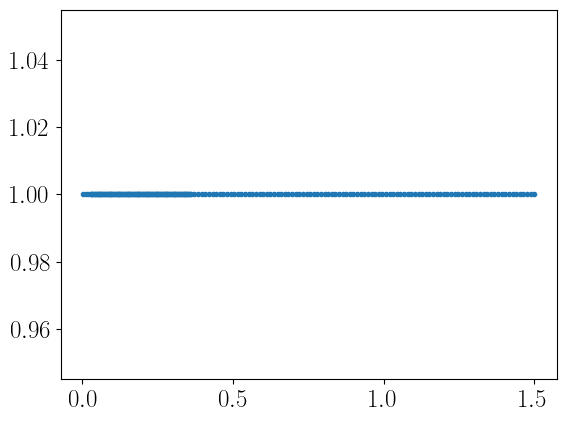

In [319]:
plt.plot(dc_voltage,np.ones(np.array(dc_voltage).shape),'.')

In [221]:
# 找出y=1时与各曲线相交的x点位置
intersection_points = []

for i0, B in enumerate(Bs1):
    if B <=0.75:
        linestyle ='-'
    elif B>=1.25:
        linestyle = '--'
    else:
        linestyle ='-.'
    
    # 获取DC数据
    file_path = f"DC_IV_RCSJ_vtau={vtau:.3f}_B={B:.2f}_Vdis=0.0_5Delta.csv"
    metadata, df = read_dc_data(file_path)

    dc_current = df['Current'].values/(np.pi*2)/2  # in eDelta/hbar 
    dc_voltage = df['Bias Voltage'].values   # in mV
    
    # 归一化电流
    normalized_current = dc_current/Ics[i0]
    normalized_voltage = dc_voltage/0.3
    
    # 寻找y=1的交点
    # 方法：找到电流值最接近1的点
    idx = np.argmin(np.abs(normalized_current - 1))
    
    intersection_voltage = normalized_voltage[idx]
    intersection_points.append((B, intersection_voltage))
    
    print(f"B={B:.2f}: y=1时，x≈{intersection_voltage:.3f}")

# 在panel 4 (ax3)中标记这些交点
for i, (B, x_pos) in enumerate(intersection_points):
    # 获取对应B值的导数数据
    file_path = f"DC_IV_RCSJ_vtau={vtau:.3f}_B={B:.2f}_Vdis=0.0_5Delta.csv"
    metadata, df = read_dc_data(file_path)
    
    dc_current = df['Current'].values/(np.pi*2)/2
    dc_voltage = df['Bias Voltage'].values
    normalized_voltage = dc_voltage/0.3
    derivative = np.gradient(dc_current, dc_voltage[1]-dc_voltage[0])
    
    # 找到对应的y值
    idx = np.argmin(np.abs(normalized_voltage - x_pos))
    y_value = derivative[idx]
    
    # 在ax3中标记
    ax3.scatter(x_pos, y_value, color=colors[i], marker='o', s=50, zorder=5)
    ax3.annotate(f'B={B}', (x_pos, y_value), 
                xytext=(10, 5), textcoords='offset points', 
                fontsize=8, alpha=0.8)

# 在panel 3 (ax2)中也标记交点以便验证
for i, (B, x_pos) in enumerate(intersection_points):
    ax2.scatter(x_pos, 1, color=colors[i], marker='x', s=80, zorder=5)

B=0.00: y=1时，x≈1.100
B=0.50: y=1时，x≈1.110
B=1.50: y=1时，x≈0.930
B=2.00: y=1时，x≈0.920


开始测试自定义colormap...


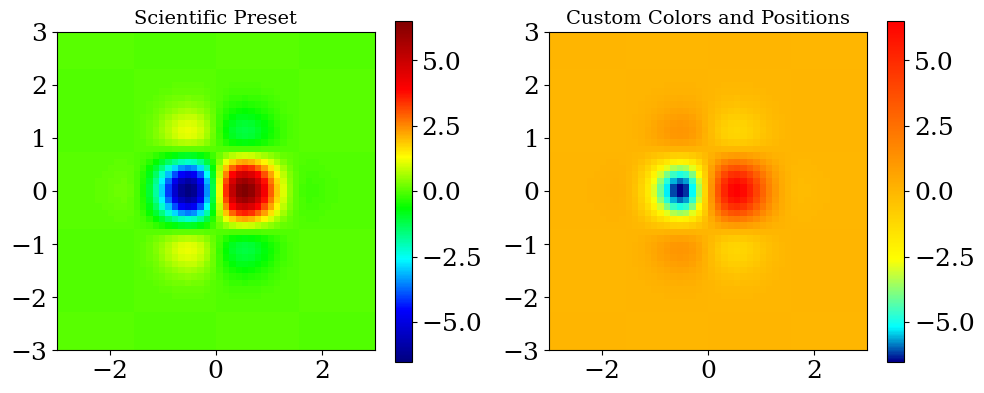

简化测试成功!
测试过程中出现错误: 'ListedColormap' object has no attribute 'resample'
但核心功能应该正常工作
自定义colormap创建完成！


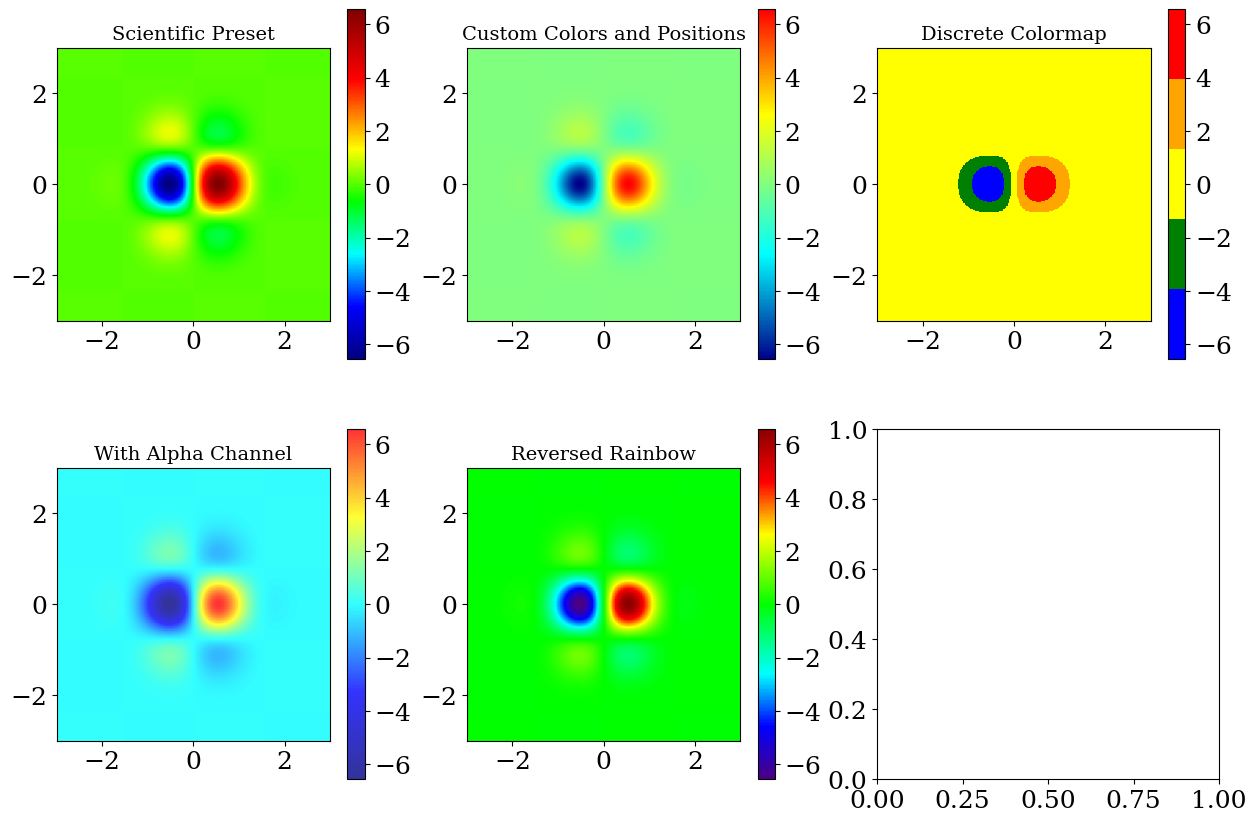

In [336]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from typing import List, Union, Tuple, Optional

def create_custom_colormap(
    colors: Optional[List[Union[str, Tuple]]] = None,
    positions: Optional[List[float]] = None,
    ncolors: int = 256,
    cmap_name: str = "custom_cmap",
    gamma: float = 1.0,
    segment_type: str = "linear",
    reverse: bool = False,
    alpha: Optional[float] = None
) -> mcolors.Colormap:
    """
    创建自定义colormap
    
    参数:
    ----------
    colors : list, optional
        颜色列表，可以是颜色名称字符串或RGB元组
        例如: ['darkblue', 'cyan', 'yellow', 'red'] 或 [(0,0,0.5), (0,1,1), (1,1,0), (1,0,0)]
    positions : list, optional
        颜色在colormap中的位置，范围[0,1]
        例如: [0.0, 0.3, 0.7, 1.0]
    ncolors : int, default=256
        如果未提供colors，则使用内置colormap时的颜色数量
    cmap_name : str, default="custom_cmap"
        colormap名称
    gamma : float, default=1.0
        伽马校正值
    segment_type : str, default="linear"
        插值类型："linear"或"discrete"
    reverse : bool, default=False
        是否反转colormap
    alpha : float, optional
        透明度，范围[0,1]
    
    返回:
    -------
    matplotlib.colors.Colormap
        自定义colormap对象
    """
    
    # 如果没有提供颜色，使用默认的颜色方案
    if colors is None:
        # 根据ncolors选择不同的默认颜色方案
        if ncolors <= 8:
            # 小数量颜色 - 使用离散的彩虹色
            colors = ['#00008B', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF0000', '#8B0000']
            positions = np.linspace(0, 1, len(colors)).tolist()
        else:
            # 使用新的API获取内置colormap
            return plt.colormaps['viridis'].resample(ncolors)
    
    # 如果没有提供位置，均匀分布
    if positions is None:
        positions = np.linspace(0, 1, len(colors)).tolist()
    
    # 确保位置列表长度与颜色列表长度一致
    if len(positions) != len(colors):
        raise ValueError("colors和positions的长度必须一致")
    
    # 确保位置在[0,1]范围内且有序
    if not all(0 <= p <= 1 for p in positions):
        raise ValueError("所有位置值必须在[0,1]范围内")
    
    if positions != sorted(positions):
        raise ValueError("位置值必须按升序排列")
    
    # 处理透明度
    if alpha is not None:
        colors = [mcolors.to_rgba(color, alpha) for color in colors]
    else:
        colors = [mcolors.to_rgba(color) for color in colors]
    
    # 反转colormap
    if reverse:
        colors = colors[::-1]
        positions = [1 - p for p in positions[::-1]]
    
    # 创建colormap
    if segment_type == "discrete":
        # 离散colormap
        cmap = mcolors.ListedColormap(colors, name=cmap_name, N=len(colors))
    else:
        # 线性插值colormap
        cmap = mcolors.LinearSegmentedColormap.from_list(
            cmap_name, 
            list(zip(positions, colors)), 
            N=ncolors,
            gamma=gamma
        )
    
    return cmap

# 预定义的一些常用colormap配置
def get_preset_colormap(preset_name: str, ncolors: int = 256, **kwargs) -> mcolors.Colormap:
    """
    获取预定义的colormap配置
    
    参数:
    ----------
    preset_name : str
        预定义配置名称，可选:
        - 'cool_warm': 冷到暖色调
        - 'rainbow': 彩虹色
        - 'topography': 地形图色
        - 'heat': 热力图色
        - 'scientific': 科学论文常用
    ncolors : int, default=256
        颜色数量
    **kwargs : 
        传递给create_custom_colormap的其他参数
    
    返回:
    -------
    matplotlib.colors.Colormap
    """
    
    presets = {
        'cool_warm': {
            'colors': ['#1f4e79', '#2e75b6', '#9dc3e6', '#ffffff', '#f4b183', '#ed7d31', '#c00000'],
            'positions': [0.0, 0.25, 0.4, 0.5, 0.6, 0.75, 1.0]
        },
        'rainbow': {
            'colors': ['#8B0000', '#FF0000', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF', '#4B0082'],
            'positions': [0.0, 0.15, 0.3, 0.5, 0.7, 0.85, 1.0]
        },
        'topography': {
            'colors': ['#006400', '#228B22', '#90EE90', '#F5F5DC', '#8B4513', '#A0522D', '#FFFFFF'],
            'positions': [0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]
        },
        'heat': {
            'colors': ['#000000', '#8B0000', '#FF0000', '#FFA500', '#FFFF00', '#FFFFFF'],
            'positions': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
        },
        'scientific': {
            'colors': ['#000080', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00', '#FF0000', '#800000'],
            'positions': [0.0, 0.15, 0.3, 0.45, 0.6, 0.8, 1.0]
        }
    }
    
    if preset_name not in presets:
        raise ValueError(f"未知的预设名称: {preset_name}。可选: {list(presets.keys())}")
    
    preset = presets[preset_name]
    return create_custom_colormap(
        colors=preset['colors'],
        positions=preset['positions'],
        ncolors=ncolors,
        cmap_name=preset_name,
        **kwargs
    )

# 测试函数 - 修正版本
def test_custom_colormaps():
    """测试自定义colormap功能"""
    
    # 禁用LaTeX渲染，避免&字符问题
    plt.rcParams['text.usetex'] = False
    
    # 创建测试数据
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-(X**2 + Y**2)) * np.sin(2*X) * np.cos(2*Y) * 10
    
    # 测试不同的colormap配置
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # 1. 使用预定义配置
    cmap1 = get_preset_colormap('scientific', 256)
    im1 = axes[0].imshow(Z, cmap=cmap1, extent=[-3, 3, -3, 3])
    axes[0].set_title('Scientific Preset')
    plt.colorbar(im1, ax=axes[0])
    
    # 2. 自定义颜色和位置 - 修复标题中的&字符
    colors2 = ['darkblue', 'cyan', 'yellow', 'red']
    positions2 = [0.0, 0.3, 0.7, 1.0]
    cmap2 = create_custom_colormap(colors=colors2, positions=positions2)
    im2 = axes[1].imshow(Z, cmap=cmap2, extent=[-3, 3, -3, 3])
    axes[1].set_title('Custom Colors and Positions')  # 将 & 改为 and
    plt.colorbar(im2, ax=axes[1])
    
    # 3. 离散colormap
    cmap3 = create_custom_colormap(
        colors=['blue', 'green', 'yellow', 'orange', 'red'],
        segment_type='discrete'
    )
    im3 = axes[2].imshow(Z, cmap=cmap3, extent=[-3, 3, -3, 3])
    axes[2].set_title('Discrete Colormap')
    plt.colorbar(im3, ax=axes[2])
    
    # 4. 带透明度的colormap
    cmap4 = create_custom_colormap(
        colors=['#000080', '#0000FF', '#00FFFF', '#FFFF00', '#FF0000'],
        alpha=0.8
    )
    im4 = axes[3].imshow(Z, cmap=cmap4, extent=[-3, 3, -3, 3])
    axes[3].set_title('With Alpha Channel')
    plt.colorbar(im4, ax=axes[3])
    
    # 5. 反转的colormap
    cmap5 = get_preset_colormap('rainbow', reverse=True)
    im5 = axes[4].imshow(Z, cmap=cmap5, extent=[-3, 3, -3, 3])
    axes[4].set_title('Reversed Rainbow')
    plt.colorbar(im5, ax=axes[4])
    
    # 6. 使用默认配置（仅指定颜色数量）
    cmap6 = create_custom_colormap(ncolors=128)
    im6 = axes[5].imshow(Z, cmap=cmap6, extent=[-3, 3, -3, 3])
    axes[5].set_title('Default (ncolors=128)')
    plt.colorbar(im6, ax=axes[5])
    
    try:
        plt.tight_layout()
    except:
        # 如果tight_layout失败，使用subplots_adjust作为备选
        plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.3, hspace=0.3)
    
    plt.show()

# 简化的测试函数，避免复杂布局问题
def simple_test():
    """简化测试，避免布局问题"""
    # 禁用LaTeX渲染
    plt.rcParams['text.usetex'] = False
    
    # 创建测试数据
    x = np.linspace(-3, 3, 50)
    y = np.linspace(-3, 3, 50)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-(X**2 + Y**2)) * np.sin(2*X) * np.cos(2*Y) * 10
    
    # 只测试一个colormap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # 使用预设配置
    cmap1 = get_preset_colormap('scientific')
    im1 = ax1.imshow(Z, cmap=cmap1, extent=[-3, 3, -3, 3])
    ax1.set_title('Scientific Preset')
    plt.colorbar(im1, ax=ax1)
    
    # 自定义配置
    colors = ['darkblue', 'cyan', 'yellow', 'red']
    positions = [0.0, 0.1, 0.3, 1.0]
    cmap2 = create_custom_colormap(colors=colors, positions=positions)
    im2 = ax2.imshow(Z, cmap=cmap2, extent=[-3, 3, -3, 3])
    ax2.set_title('Custom Colors and Positions')
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.show()

# 使用示例
if __name__ == "__main__":
    print("开始测试自定义colormap...")
    
    try:
        # 先运行简化测试
        simple_test()
        print("简化测试成功!")
        
        # 如果简化测试成功，再运行完整测试
        test_custom_colormaps()
        print("完整测试成功!")
        
    except Exception as e:
        print(f"测试过程中出现错误: {e}")
        print("但核心功能应该正常工作")
    
    # 快速创建示例
    # 方法1: 使用预设
    scientific_cmap = get_preset_colormap('scientific')
    
    # 方法2: 完全自定义
    my_cmap = create_custom_colormap(
        colors=['#000004', '#3b0f70', '#8c2981', '#de4968', '#fe9f6d', '#fcfdbf'],
        positions=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
        cmap_name='my_viridis'
    )
    
    print("自定义colormap创建完成！")

# Fig. 1: Here try to import a figure as an input of a panel

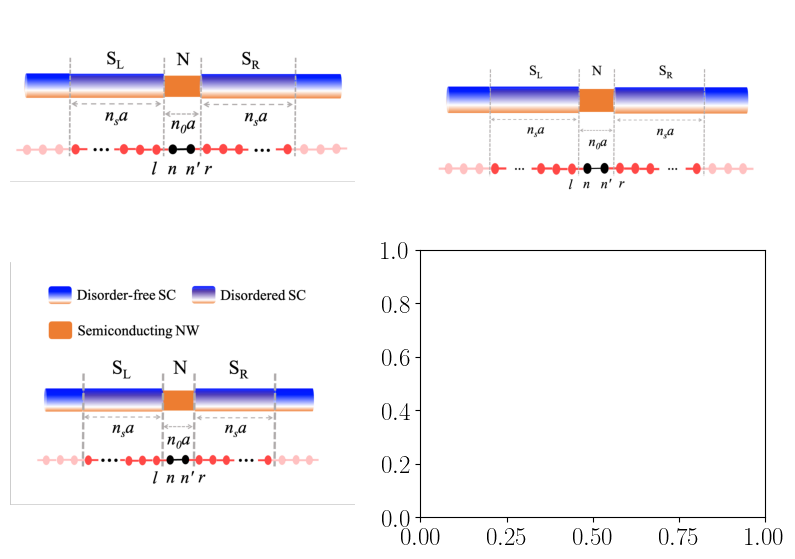

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 1. Load the image from file
# Replace 'your_image.png' with the path to your actual PNG file
img_array = mpimg.imread('SNS_schem0.png')

# 2. Create a figure with a 2x2 grid of axes (panels)
fig, axs = plt.subplots(2, 2, figsize=(8,6))

# Optional: Flatten the axes array for easier iteration
axs = axs.ravel()

# 3. Place the image in a specific panel (e.g., top-left, index 0)
axs[0].imshow(img_array)
# axs[0].set_title('PNG Image Panel')
axs[0].axis('off') # Hide the axis ticks and labels for a cleaner image display

img_array1 = mpimg.imread('draft_plot_2.png')
axs[1].imshow(img_array1)
axs[1].axis('off') 

img_array2 = mpimg.imread('draft_plot_5.png')
axs[2].imshow(img_array2)
axs[2].axis('off') 



# 5. Adjust layout and display the figure
plt.tight_layout()
plt.show()


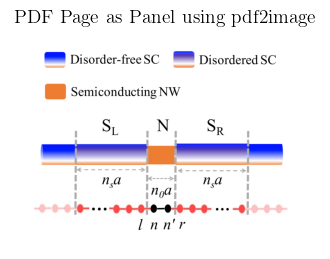

In [26]:
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

def plot_pdf_page_with_pdf2image(pdf_path, page_num, ax):
    # page_num here is 1-based for convert_from_path's slicing logic
    images = convert_from_path(pdf_path, first_page=page_num + 1, last_page=page_num + 1)
    if images:
        img = images[0]
        # Convert PIL Image to NumPy array for Matplotlib
        img_array = np.array(img)
        ax.imshow(img_array)
        ax.axis('off')
    else:
        print(f"Could not convert page {page_num}.")

# --- Example Usage ---
pdf_file = 'draft_plot_5.pdf'
fig, ax = plt.subplots(figsize=(4, 4))
plot_pdf_page_with_pdf2image(pdf_file, 0, ax) # Plot the first page
plt.title('PDF Page as Panel using pdf2image')
plt.show()

In [2]:
# 找出每条curve的最大值，标记为一个银白色的点，并从该点画虚线交于虚线y=0：
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 添加axisartist导入
from mpl_toolkits.axisartist.axislines import SubplotZero

reduced_factor = 2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9/(2*np.pi)*0.3

import pandas as pd
import ast  # 添加ast模块用于解析字面量

import matplotlib.image as mpimg
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

def plot_pdf_page_with_pdf2image(pdf_path, page_num, ax):
    # page_num here is 1-based for convert_from_path's slicing logic
    images = convert_from_path(pdf_path, first_page=page_num + 1, last_page=page_num + 1)
    if images:
        img = images[0]
        # Convert PIL Image to NumPy array for Matplotlib
        img_array = np.array(img)
        ax.imshow(img_array)
        ax.axis('off')
    else:
        print(f"Could not convert page {page_num}.")

# --- Example Usage ---


def read_cpr_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'v_tau','Phase', 'Current'])
    
    # 转换数据类型
    df = df.astype({
        'v_tau':float,
        'Phase': float,
        'Current': float
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='v_tau')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
    # 字体大小设置
    label_size = 18
    title_size = 14
    legend_size = 18
    tick_size = 18
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    width = 3.847 * 1.2
    height = 0.64 * width*3
    fig = plt.figure(figsize=(width, height))

    gs = GridSpec(3, 1, height_ratios=[1, 0.5, 1],hspace=0.2)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # ======================
    # Panel 3: CPR curves - 使用axisartist创建带箭头的坐标轴
    # ======================
    # 创建SubplotZero而不是常规子图
    ax1 = SubplotZero(fig, gs[0, 0])
    fig.add_subplot(ax1)

    ax2 = SubplotZero(fig, gs[1, 0])
    fig.add_subplot(ax2)

    gs_bottom = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2,0], wspace=0.4)  
    
    ax3_cpr = SubplotZero(fig, gs_bottom[0, 0])
    ax3_dc = SubplotZero(fig, gs_bottom[0, 1])
    
    fig.add_subplot(ax3_cpr) 
    fig.add_subplot(ax3_dc) 
    
    # 隐藏所有默认的坐标轴
    for direction in ["left", "right", "bottom", "top"]:
        ax3_cpr.axis[direction].set_visible(False)

    # # plot the schematic setup


    # img_array = mpimg.imread('draft_plot_5.png')
    img_array = mpimg.imread('Schematic_setup2.png')
    ax1.imshow(img_array, extent=[0, 1, 0, 1], aspect='auto', origin='upper', zorder=0)
    ax1.set_xlim(0, 1)
    ax1.set_ylim(0, 1)
    ax1.axis('off')

    # pdf_file = 'draft_plot_5.pdf'
    # plot_pdf_page_with_pdf2image(pdf_file, 0, ax1) # Plot the first page
    # ax1.axis('off')


    # # plot CPR 
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []

    file_path = f"CPR_B=0.0_Vdis=0.0_Vtaus=4s_disorder1.csv"
    
    metadata, df = read_cpr_data(file_path)
    
    # 获取唯一B值和相位值
    vtaus = np.sort(df['v_tau'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    print((current_matrix).shape)
    
    # 存储每条曲线的最大值点信息
    max_points = []
    
    for i0, vtau0 in enumerate(vtaus):

        x_data = phase_values/np.pi
        if vtau0 == 0.338:
            y_data = 10*current_matrix[i0,:]
        else:
            y_data = current_matrix[i0,:]
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax3_cpr.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])
        
        # 找到当前曲线的最大值及其位置
        max_idx = np.argmax(y_data)
        x_max = x_data[max_idx]
        y_max = y_data[max_idx]
        
        # 存储最大值点信息
        max_points.append((x_max, y_max, vtau0))
        
        # 绘制最大值点（银白色点）
        ax3_cpr.plot(x_max, y_max, '.', color='silver', markersize=8, markeredgecolor='none', markeredgewidth=0.5)
        
        # 从最大值点向y=0画虚线
        ax3_cpr.plot([x_max, x_max], [y_max, 0], '--', color='silver', linewidth=2.0, alpha=1.0)

    ax3_cpr.axhline(y=0, xmin=-0.0, xmax=0.92, linestyle='--',color='silver', linewidth=2.0)
    
    # 计算数据范围
    x_min, x_max = -0.1,2.8
    y_min, y_max = -12,14
    
    # 设置坐标轴范围，确保原点在最小值位置
    ax3_cpr.set_xlim(x_min, x_max)
    ax3_cpr.set_ylim(y_min, y_max)
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax3_cpr.axis["x"] = ax3_cpr.new_floating_axis(0, y_min)  # x轴位于y_min位置
    ax3_cpr.axis["x"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    ax3_cpr.axis["x"].set_visible(True)
    ax3_cpr.axis["x"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    ax3_cpr.axis["y"] = ax3_cpr.new_floating_axis(1, x_min)  # y轴位于x_min位置
    ax3_cpr.axis["y"].set_axisline_style("->", size=1.5)  # y轴箭头样式
    ax3_cpr.axis["y"].set_visible(True)
    
    # 关键修改：将Y轴刻度标签位置调整到左侧（图外侧）
    ax3_cpr.axis["y"].major_ticks.set_tick_out(False)  # 确保刻度线朝内
    ax3_cpr.axis["y"].set_ticklabel_direction('-')  # 负号表示标签在轴的左侧
    ax3_cpr.axis["y"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    # 设置轴标签
    # ax1.axis["x"].label.set_text(r'$\boldsymbol{V_{dis}/V_0}$')
    # ax1.axis["x"].label.set_fontsize(sizes['label'])
    
    # ax1.axis["y"].label.set_text(r'$\boldsymbol{I_c~(e\Delta/h)}$')
    # ax1.axis["y"].label.set_fontsize(sizes['label'])
    ax3_cpr.axis["y"].major_ticklabels.set_rotation(90)  # 设置刻度标签水平显示
    ax3_cpr.axis["y"].major_ticklabels.set_pad(0)  # 调整标签与轴的距离，根据需要调整数值


    # 设置轴标签
    # 手动设置标签位置 - 你可以根据需要调整这些值
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    ax3_cpr.text(2.8, -15, r'$\boldsymbol{\phi~(\pi)}$', 
             fontsize=sizes['label'], ha='center', va='center')
    
    ax3_cpr.text(0.8, 14.5, r'$\boldsymbol{I(\phi)~(e\Delta/h)}$', 
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    
    # 设置刻度
    ax3_cpr.set_xticks([0,1.0, 2.0])
    ax3_cpr.set_xticklabels([r"\bf{0}",r"\bf{1.0}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax3_cpr.set_yticks([-8.0,0,8.0])
    ax3_cpr.set_yticklabels([r"\bf{-8~~}",r"\bf{0}",r"\bf{8}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    # ax3_cpr.grid(**grid_settings)
    
    # 设置刻度方向
    ax3_cpr.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    

    ax3_cpr.text(1.5, -0.5, r'$\boldsymbol{I \times 10} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax3_cpr.text(1.0, 9, r'$\boldsymbol{I_c}$', 
             fontsize=sizes['legend'], ha='center', va='center')

    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    # output_path = os.path.join(dirF, "combined_plot_4panels_CPR_v1.png")
    # plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=colors['background'])
    # print(f"Plot saved to: {output_path}")
    plt.show()

# ======================
# 运行主程序
# ======================
if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'pdf2image'

In [6]:
def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

def read_cpr_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'v_tau','Phase', 'Current'])
    
    # 转换数据类型
    df = df.astype({
        'v_tau':float,
        'Phase': float,
        'Current': float
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='v_tau')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 12
    tick_size = 14
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # # 创建图形和布局
    # width = 3.847 * 1.2
    # height = 0.64 * width*3
    # fig = plt.figure(figsize=(width, height))

    # gs = GridSpec(3, 1, height_ratios=[1, 0.5, 1],hspace=0.2)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # 读取图片并获取尺寸
    img_path = 'Schematic_setup2.png'
    img = mpimg.imread(img_path)
    
    # pdf_path = 'draft_plot_5.pdf'
    # page_num = 0
    # imgs = convert_from_path(pdf_path, first_page=page_num+1, last_page=page_num+1)
    
    # cropped_img = crop_image_borders(img_array, crop_ratio=0.001)
    
    img_height, img_width = img.shape[:2]
    img_aspect_ratio = img_height / img_width
    
    # 设置基础宽度
    base_width = 3.847 * 1.
    
    # 根据图片宽高比计算第一个panel的高度
    panel1_height = base_width * img_aspect_ratio*0.85
    
    # 设置其他panel的高度
    panel2_height = 0.64 * base_width * 0.28  # 根据需要调整
    panel3_height = 0.64 * base_width * 0.55  # 根据需要调整
    
    # 计算总高度
    total_height = panel1_height + panel2_height + panel3_height
    
    # 创建figure
    fig = plt.figure(figsize=(base_width, total_height))
    
    # 创建GridSpec，高度比例基于实际尺寸
    gs = GridSpec(2, 1, height_ratios=[panel1_height + panel2_height, panel3_height], hspace=0.3)

    gs_top = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0,0], height_ratios=[panel1_height, panel2_height],hspace=-0.05)
    # Panel 1: 显示图片
    ax1 = fig.add_subplot(gs_top[0,0])
    ax1.imshow(img,aspect='auto')
    ax1.axis('off')
    
    # Panel 2: 其他内容
    ax2 = fig.add_subplot(gs_top[1,0])

    disorder_Data = np.loadtxt("disorder_data_test_Nd=50_ld=10_v0=2Delta.csv", delimiter=',', dtype=float, skiprows=1)
    
    site_x = disorder_Data[:,0]
    amps_y = disorder_Data[:,1]
    
    # # full function shown as below:    
    # site_xs = np.arange(-280,291)
    
    # ax2.fill_between(site_xs[311:461], 0, amps_y[152:], 
    #                      color='darkred', alpha=0.7)

    # ax2.fill_between(site_xs[111:261], 0,  amps_y[:150], 
    #                      color='darkred', alpha=0.7) 
    
    # ax2.fill_between(site_xs[262:310],0,0)
    
    # ax2.set_xlim([-280,291])
    # ax2.axis('off')
    ## part shown to look better as below:

    site_xs = np.arange(-140,146)
    ax2.fill_between(site_xs[154:233], 0, amps_y[152:231], 
                         color='darkred',linewidth=1.0, alpha=0.7)
    ax2.fill_between(site_xs[56:131], 0,  amps_y[75:150], 
                         color='darkred',linewidth=1.0, alpha=0.7)     
    # ax2.fill_between(site_xs[132:154],0,[0*i for i in site_xs[132:154]])   
    ax2.plot(site_xs[131:155],[0*i for i in site_xs[131:155]],color='darkred',linewidth =1., alpha=0.7)   
    ax2.plot(site_xs[30:56],[0*i for i in site_xs[30:56]],color='darkred',linewidth =1., alpha=0.7)
    ax2.plot(site_xs[233:259],[0*i for i in site_xs[233:259]],color='darkred',linewidth =1., alpha=0.7)

    ax2.set_xlim([-140,146])
    ax2.set_ylim([-0.9, 0.9])
    ax2.text(-100, 0.7, r'$\boldsymbol{V_{dis}}$',  # ~(e\Delta/\hbar)
             fontsize=sizes['legend'], ha='center', va='center', rotation=0)
    ax2.axis('off') 

    # Panel 3: 分为两个子panel
    
    gs_bottom = GridSpecFromSubplotSpec(1, 5, subplot_spec=gs[1,0], width_ratios= [0.12,1,0.15,1,0.12], wspace=0.3)
    
    # 使用SubplotZero创建带箭头的坐标轴
    ax3_cpr = SubplotZero(fig, gs_bottom[0, 1])
    ax3_dc = SubplotZero(fig, gs_bottom[0, 3])
    fig.add_subplot(ax3_cpr)
    fig.add_subplot(ax3_dc)  

    
    ##################################################
    # # plot CPR 
    ##################################################
    
    # # 隐藏所有默认的坐标轴
    for direction in ["right", "top"]: # "left",   "bottom",
        ax3_cpr.axis[direction].set_visible(False)
        
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    
    reduced_factor = (2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9)*0.3*2 
    
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []

    file_path = f"CPR_B=0.0_Vdis=0.0_Vtaus=4s_disorder1.csv"
    
    metadata, df = read_cpr_data(file_path)
    
    # 获取唯一B值和相位值
    vtaus = np.sort(df['v_tau'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    print((current_matrix).shape)
    
    # 存储每条曲线的最大值点信息
    max_points = []
    ax3_cpr.axhline(y=0, xmin=-0.0, xmax=0.92, linestyle='-',color='silver', linewidth=1.)
    
    for i0, vtau0 in enumerate(vtaus):

        x_data = phase_values/np.pi
        if vtau0 == 0.338:
            y_data = 10*current_matrix[i0,:]
        else:
            y_data = current_matrix[i0,:]
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        

        
        # 找到当前曲线的最大值及其位置
        max_idx = np.argmax(y_data)
        x_max = x_data[max_idx]
        y_max = y_data[max_idx]
        
        # 存储最大值点信息
        max_points.append((x_max, y_max, vtau0))
        

        
        # 从最大值点向y=0画虚线
        ax3_cpr.plot([x_max, x_max], [y_max, 0], '--', color='silver', linewidth=1.5, alpha=1.0)

        ax3_cpr.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=1.5)     #
        # 绘制最大值点（银白色点）
        ax3_cpr.plot(x_max, y_max, '.', color='green', markersize=8, markeredgecolor='none', markeredgewidth=0.5)   
        
    # 计算数据范围
    x_min, x_max = -0.1,2.1
    
    y_min, y_max = -0.75,0.75
    
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax3_cpr.axis["left"].set_axisline_style("->", size=1.5) 
    
    ax3_cpr.axis[ "bottom"].set_axisline_style("->", size=1.5)  # x轴箭头样式


    # 设置轴标签
    # 设置标签位置 - 
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    
    y_label_pos = (x_min - (x_max - x_min) * 0.1, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    # ax3_cpr.text(1.0, -1.2, r'$\boldsymbol{\phi/\pi}$',  #(\pi)
    #          fontsize=sizes['label'], ha='center', va='center')
    
    ax3_cpr.text(-0.5, 0.85, r'$\boldsymbol{I}$',  # ~(e\Delta/\hbar)
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    ax3_cpr.set_xlabel(r'$\boldsymbol{\phi/\pi}$',  #(\pi)
             fontsize=sizes['label'], ha='center', va='center',labelpad =10)
    
    # 设置刻度
    ax3_cpr.set_xticks([0,1.0, 2.0])
    ax3_cpr.set_xticklabels([r"\bf{0}",r"\bf{1}", r"$\boldsymbol{2}$"],  #$\boldsymbol{\pi}$
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax3_cpr.set_yticks([-0.5,0,0.5])
    ax3_cpr.set_yticklabels([r"\bf{-0.5}",r"\bf{0}",r"\bf{0.5}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    # ax3_cpr.grid(**grid_settings)
    
    # 设置刻度方向
    ax3_cpr.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    

    # ax3_cpr.text(1.5, -0.1, r'$\boldsymbol{I \times 10} $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    
    ax3_cpr.text(0.95, 0.9, r'$\boldsymbol{(\phi_c,I_c)}$', 
             fontsize=sizes['legend'], ha='center', va='center')

    # 设置坐标轴范围，确保原点在最小值位置
    ax3_cpr.set_xlim(x_min, x_max)
    ax3_cpr.set_ylim(y_min, y_max)

    
    ##################################################
    # # dc IV
    ##################################################
    # # 隐藏所有默认的坐标轴
    for direction in ["right", "top"]: #"left", "bottom", 
        ax3_dc.axis[direction].set_visible(False)
    
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []
    
    for vtau0 in vtaus:
        file_path = f"DC_adaptive=True_B=0_Vdis=0.0_Vtau={vtau0:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        
        x_data = df['Bias Voltage'].values/0.3
        if vtau0 == 0.338:
            y_data = 10*df['Current'].values/(2*np.pi)/2
        else:
            y_data = df['Current'].values/(2*np.pi)/2
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax3_dc.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=1.5) #line_styles['default']['linewidth']

    ax3_dc.axvline(x=2/2, ymin=0.08, ymax=0.4, linestyle='--',color='silver', linewidth=1.5)
    ax3_dc.axvline(x=2/4, ymin=0.08, ymax=0.25, linestyle='--',color='silver', linewidth=1.5)
    # ax1.axvline(x=0.6/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.0)

    ax3_dc.axvline(x=2/3, ymin=0.08, ymax=0.3, linestyle='--',color='silver', linewidth=1.5)
    ax3_dc.axvline(x=2/5, ymin=0.08, ymax=0.22, linestyle='--',color='silver', linewidth=1.5)
    # ax3_dc.axvline(x=2/6, ymin=0.08, ymax=0.18, linestyle='--',color='silver', linewidth=1.5)
    
    # 计算数据范围
    x_min, x_max = -0.1,2.3
    y_min, y_max = -0.1,1.35
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax3_dc.axis["left"].set_axisline_style("->", size=1.5)  # x轴箭头样式 
    ax3_dc.axis[ "bottom"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    

    


    # 设置轴标签
    # 手动设置标签位置
    # x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    # y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    # ax3_dc.text(1.1, -0.4, r'$\boldsymbol{V_{bias}}$',  # eV_{bias}/\Delta
    #          fontsize=sizes['label'], ha='center', va='center')  
    ax3_dc.text(-0.65, 1.45, r'$\boldsymbol{I_{dc}}$',  # ~(e\Delta/\hbar)
             fontsize=sizes['label'], ha='center', va='center', rotation=0)

    ax3_dc.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$',fontsize=sizes['label'], ha='center', va='center',labelpad= 10 )
    
    # 设置刻度
    ax3_dc.set_xticks([0,0.5,1.0, 1.5, 2.0]) # 1/3, 2/5,  2/3,
    ax3_dc.set_xticklabels([r"\bf{0}", r"",r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax3_dc.set_yticks([0,0.5, 1])
    ax3_dc.set_yticklabels([r"\bf{0}",r"",r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    
    # 设置刻度方向
    ax3_dc.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    

    ax3_dc.text(1.2, 1.4, r'$\boldsymbol{D_{\tau}= 1.0}$', 
             fontsize=sizes['legend'], ha='center', va='center')   
    # ax3_dc.text(1.5, 1.2, r'$\boldsymbol{1.00 }$', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    ax3_dc.text(1.55, 0.85, r'$\boldsymbol{0.85} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax3_dc.text(2.3, 0.5, r'$\boldsymbol{0.75} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax3_dc.text(2.6, 0.15, r'$\boldsymbol{0.05} $', 
             fontsize=sizes['legend'], ha='center', va='center')

    # ax3_dc.text(2.7, 0.1, r'$\boldsymbol{I_{dc} \times 10} $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    

    
    # 设置坐标轴范围，确保原点在最小值位置
    ax3_dc.set_xlim(x_min, x_max)
    ax3_dc.set_ylim(y_min, y_max)
    
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "Fig1_v6.png")
    pdf_output_path = os.path.join(dirF, "Fig1_v6.pdf")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor='white')
    
    print(f"Plot saved to: {output_path}")
    plt.show()


if __name__ == "__main__":
    main()

Directory already exists: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection


FileNotFoundError: [Errno 2] No such file or directory: 'Schematic_setup2.png'

In [5]:
def read_dc_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'Bias Voltage', 'Current','SidebandN'])
    
    # 转换数据类型
    df = df.astype({
        'Bias Voltage': float,
        'Current': float,
       'SidebandN': int
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='Bias Voltage')
    
    return metadata, df

def read_cpr_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'v_tau','Phase', 'Current'])
    
    # 转换数据类型
    df = df.astype({
        'v_tau':float,
        'Phase': float,
        'Current': float
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='v_tau')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
    # 字体大小设置
    label_size = 16
    title_size = 14
    legend_size = 12
    tick_size = 14
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # # 创建图形和布局
    # width = 3.847 * 1.2
    # height = 0.64 * width*3
    # fig = plt.figure(figsize=(width, height))

    # gs = GridSpec(3, 1, height_ratios=[1, 0.5, 1],hspace=0.2)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # 读取图片并获取尺寸
    img_path = 'Schematic_setup2.png'
    img = mpimg.imread(img_path)
    
    # pdf_path = 'draft_plot_5.pdf'
    # page_num = 0
    # imgs = convert_from_path(pdf_path, first_page=page_num+1, last_page=page_num+1)
    
    # cropped_img = crop_image_borders(img_array, crop_ratio=0.001)
    
    img_height, img_width = img.shape[:2]
    img_aspect_ratio = img_height / img_width
    
    # 设置基础宽度
    base_width = 3.847 * 1.
    
    # 根据图片宽高比计算第一个panel的高度
    panel1_height = base_width * img_aspect_ratio*0.85
    
    # 设置其他panel的高度
    panel2_height = 0.64 * base_width * 0.28  # 根据需要调整
    panel3_height = 0.64 * base_width * 0.55  # 根据需要调整
    
    # 计算总高度
    total_height = panel1_height + panel2_height + panel3_height
    
    # 创建figure
    fig = plt.figure(figsize=(base_width, total_height))
    
    # 创建GridSpec，高度比例基于实际尺寸
    gs = GridSpec(2, 1, height_ratios=[panel1_height + panel2_height, panel3_height], hspace=0.3)

    gs_top = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0,0], height_ratios=[panel1_height, panel2_height],hspace=-0.05)
    
    # Panel 1: 显示图片
    # ax1 = fig.add_subplot(gs_top[0,0])
    # ax1.imshow(img,aspect='auto')
    # ax1.axis('off')
    
    # Panel 2: 其他内容
    ax2 = fig.add_subplot(gs_top[1,0])

    disorder_Data = np.loadtxt("disorder_data_test_Nd=50_ld=10_v0=2Delta.csv", delimiter=',', dtype=float, skiprows=1)
    
    site_x = disorder_Data[:,0]
    amps_y = disorder_Data[:,1]
    
    # # full function shown as below:    
    # site_xs = np.arange(-280,291)
    
    # ax2.fill_between(site_xs[311:461], 0, amps_y[152:], 
    #                      color='darkred', alpha=0.7)

    # ax2.fill_between(site_xs[111:261], 0,  amps_y[:150], 
    #                      color='darkred', alpha=0.7) 
    
    # ax2.fill_between(site_xs[262:310],0,0)
    
    # ax2.set_xlim([-280,291])
    # ax2.axis('off')
    ## part shown to look better as below:

    site_xs = np.arange(-140,146)
    ax2.fill_between(site_xs[154:233], 0, amps_y[152:231], 
                         color='darkred',linewidth=1.0, alpha=0.7)
    ax2.fill_between(site_xs[56:131], 0,  amps_y[75:150], 
                         color='darkred',linewidth=1.0, alpha=0.7)     
    # ax2.fill_between(site_xs[132:154],0,[0*i for i in site_xs[132:154]])   
    ax2.plot(site_xs[131:155],[0*i for i in site_xs[131:155]],color='darkred',linewidth =1., alpha=0.7)   
    ax2.plot(site_xs[30:56],[0*i for i in site_xs[30:56]],color='darkred',linewidth =1., alpha=0.7)
    ax2.plot(site_xs[233:259],[0*i for i in site_xs[233:259]],color='darkred',linewidth =1., alpha=0.7)

    ax2.set_xlim([-140,146])
    ax2.set_ylim([-0.9, 0.9])
    ax2.text(-100, 0.7, r'$\boldsymbol{V_{dis}}$',  # ~(e\Delta/\hbar)
             fontsize=sizes['legend'], ha='center', va='center', rotation=0)
    ax2.axis('off') 

    # Panel 3: 分为两个子panel
    
    gs_bottom = GridSpecFromSubplotSpec(1, 5, subplot_spec=gs[1,0], width_ratios= [0.12,1,0.15,1,0.12], wspace=0.3)
    
    # 使用SubplotZero创建带箭头的坐标轴
    ax3_cpr = SubplotZero(fig, gs_bottom[0, 1])
    ax3_dc = SubplotZero(fig, gs_bottom[0, 3])
    fig.add_subplot(ax3_cpr)
    fig.add_subplot(ax3_dc)  

    
    ##################################################
    # # plot CPR 
    ##################################################
    
    # # 隐藏所有默认的坐标轴
    for direction in ["right", "top"]: # "left",   "bottom",
        ax3_cpr.axis[direction].set_visible(False)
        
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    
    reduced_factor = (2 * 1.6e-19 * 1e-3 / (4.13e-15) * 1e9)*0.3*2 
    
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []

    file_path = f"CPR_B=0.0_Vdis=0.0_Vtaus=4s_disorder1.csv"
    
    metadata, df = read_cpr_data(file_path)
    
    # 获取唯一B值和相位值
    vtaus = np.sort(df['v_tau'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    print((current_matrix).shape)
    
    # 存储每条曲线的最大值点信息
    max_points = []
    ax3_cpr.axhline(y=0, xmin=-0.0, xmax=0.92, linestyle='-',color='silver', linewidth=1.)
    
    for i0, vtau0 in enumerate(vtaus):

        x_data = phase_values/np.pi
        if vtau0 == 0.338:
            y_data = 10*current_matrix[i0,:]
        else:
            y_data = current_matrix[i0,:]
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        

        
        # 找到当前曲线的最大值及其位置
        max_idx = np.argmax(y_data)
        x_max = x_data[max_idx]
        y_max = y_data[max_idx]
        
        # 存储最大值点信息
        max_points.append((x_max, y_max, vtau0))
        

        
        # 从最大值点向y=0画虚线
        ax3_cpr.plot([x_max, x_max], [y_max, 0], '--', color='silver', linewidth=1.5, alpha=1.0)

        ax3_cpr.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=1.5)     #
        # 绘制最大值点（银白色点）
        ax3_cpr.plot(x_max, y_max, '.', color='green', markersize=8, markeredgecolor='none', markeredgewidth=0.5)   
        
    # 计算数据范围
    x_min, x_max = -0.1,2.1
    
    y_min, y_max = -0.75,0.75
    
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax3_cpr.axis["left"].set_axisline_style("->", size=1.5) 
    
    ax3_cpr.axis[ "bottom"].set_axisline_style("->", size=1.5)  # x轴箭头样式


    # 设置轴标签
    # 设置标签位置 - 
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    
    y_label_pos = (x_min - (x_max - x_min) * 0.1, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    # ax3_cpr.text(1.0, -1.2, r'$\boldsymbol{\phi/\pi}$',  #(\pi)
    #          fontsize=sizes['label'], ha='center', va='center')
    
    ax3_cpr.text(-0.5, 0.85, r'$\boldsymbol{I}$',  # ~(e\Delta/\hbar)
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    ax3_cpr.set_xlabel(r'$\boldsymbol{\phi/\pi}$',  #(\pi)
             fontsize=sizes['label'], ha='center', va='center',labelpad =10)
    
    # 设置刻度
    ax3_cpr.set_xticks([0,1.0, 2.0])
    ax3_cpr.set_xticklabels([r"\bf{0}",r"\bf{1}", r"$\boldsymbol{2}$"],  #$\boldsymbol{\pi}$
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax3_cpr.set_yticks([-0.5,0,0.5])
    ax3_cpr.set_yticklabels([r"\bf{-0.5}",r"\bf{0}",r"\bf{0.5}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    # ax3_cpr.grid(**grid_settings)
    
    # 设置刻度方向
    ax3_cpr.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    

    # ax3_cpr.text(1.5, -0.1, r'$\boldsymbol{I \times 10} $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    
    ax3_cpr.text(0.95, 0.9, r'$\boldsymbol{(\phi_c,I_c)}$', 
             fontsize=sizes['legend'], ha='center', va='center')

    # 设置坐标轴范围，确保原点在最小值位置
    ax3_cpr.set_xlim(x_min, x_max)
    ax3_cpr.set_ylim(y_min, y_max)

    
    ##################################################
    # # dc IV
    ##################################################
    # # 隐藏所有默认的坐标轴
    for direction in ["right", "top"]: #"left", "bottom", 
        ax3_dc.axis[direction].set_visible(False)
    
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []
    
    for vtau0 in vtaus:
        file_path = f"DC_adaptive=True_B=0_Vdis=0.0_Vtau={vtau0:.3f}_disorder1.csv"
        metadata, df = read_dc_data(file_path)
        
        x_data = df['Bias Voltage'].values/0.3
        if vtau0 == 0.338:
            y_data = 10*df['Current'].values/(2*np.pi)/2
        else:
            y_data = df['Current'].values/(2*np.pi)/2
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax3_dc.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=1.5) #line_styles['default']['linewidth']

    ax3_dc.axvline(x=2/2, ymin=0.08, ymax=0.4, linestyle='--',color='silver', linewidth=1.5)
    ax3_dc.axvline(x=2/4, ymin=0.08, ymax=0.25, linestyle='--',color='silver', linewidth=1.5)
    # ax1.axvline(x=0.6/0.3, ymin=-1, ymax=5, linestyle='--',color='silver', linewidth=1.0)

    ax3_dc.axvline(x=2/3, ymin=0.08, ymax=0.3, linestyle='--',color='silver', linewidth=1.5)
    ax3_dc.axvline(x=2/5, ymin=0.08, ymax=0.22, linestyle='--',color='silver', linewidth=1.5)
    # ax3_dc.axvline(x=2/6, ymin=0.08, ymax=0.18, linestyle='--',color='silver', linewidth=1.5)
    
    # 计算数据范围
    x_min, x_max = -0.1,2.3
    y_min, y_max = -0.1,1.35
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax3_dc.axis["left"].set_axisline_style("->", size=1.5)  # x轴箭头样式 
    ax3_dc.axis[ "bottom"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    

    


    # 设置轴标签
    # 手动设置标签位置
    # x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    # y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    # ax3_dc.text(1.1, -0.4, r'$\boldsymbol{V_{bias}}$',  # eV_{bias}/\Delta
    #          fontsize=sizes['label'], ha='center', va='center')  
    ax3_dc.text(-0.65, 1.45, r'$\boldsymbol{I_{dc}}$',  # ~(e\Delta/\hbar)
             fontsize=sizes['label'], ha='center', va='center', rotation=0)

    ax3_dc.set_xlabel(r'$\boldsymbol{eV_{b}/\Delta}$',fontsize=sizes['label'], ha='center', va='center',labelpad= 10 )
    
    # 设置刻度
    ax3_dc.set_xticks([0,0.5,1.0, 1.5, 2.0]) # 1/3, 2/5,  2/3,
    ax3_dc.set_xticklabels([r"\bf{0}", r"",r"\bf{1}", r"", r"\bf{2}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax3_dc.set_yticks([0,0.5, 1])
    ax3_dc.set_yticklabels([r"\bf{0}",r"",r"\bf{1}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    
    # 设置刻度方向
    ax3_dc.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    

    ax3_dc.text(1.2, 1.4, r'$\boldsymbol{D_{\tau}= 1.0}$', 
             fontsize=sizes['legend'], ha='center', va='center')   
    # ax3_dc.text(1.5, 1.2, r'$\boldsymbol{1.00 }$', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    ax3_dc.text(1.55, 0.85, r'$\boldsymbol{0.85} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax3_dc.text(2.3, 0.5, r'$\boldsymbol{0.75} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax3_dc.text(2.6, 0.15, r'$\boldsymbol{0.05} $', 
             fontsize=sizes['legend'], ha='center', va='center')

    # ax3_dc.text(2.7, 0.1, r'$\boldsymbol{I_{dc} \times 10} $', 
    #          fontsize=sizes['legend'], ha='center', va='center')
    

    
    # 设置坐标轴范围，确保原点在最小值位置
    ax3_dc.set_xlim(x_min, x_max)
    ax3_dc.set_ylim(y_min, y_max)
    
    # ======================
    # 调整布局并保存
    # ======================
    plt.subplots_adjust(left=0.08, right=0.90, bottom=0.15, top=0.92)
    
    # 保存图形到Plots_collection目录
    output_path = os.path.join(dirF, "Fig1_v6.png")
    pdf_output_path = os.path.join(dirF, "Fig1_v6.pdf")
    plt.savefig(output_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig(pdf_output_path, dpi=300, bbox_inches='tight', facecolor='white')
    
    print(f"Plot saved to: {output_path}")
    plt.show()


if __name__ == "__main__":
    main()

Directory already exists: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection


FileNotFoundError: [Errno 2] No such file or directory: 'Schematic_setup2.png'

# Fig 1 replot and finialized here 

In [7]:
def read_cpr_data(file_path):
    """读取CPR数据文件，提取元数据和测量数据"""
    metadata = {}
    data_lines = []
    
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                if ':' in line:
                    key, value_str = line[1:].strip().split(':', 1)
                    key = key.strip()
                    value_str = value_str.strip()
                    
                    # 特殊处理sweep_values参数
                    if key == 'sweep_values':
                        try:
                            value_arr = np.array(ast.literal_eval(value_str))
                            metadata['sweep_min'] = float(np.min(value_arr))
                            metadata['sweep_max'] = float(np.max(value_arr))
                            metadata['sweep_points'] = len(value_arr)
                            # 保留参数名参考
                            if 'sweep_parameter' in metadata:
                                metadata['sweep_parameter'] = metadata['sweep_parameter']
                        except:
                            metadata[key] = value_str
                        continue
                    
                    # 尝试解析数组
                    if value_str.startswith('['):
                        try:
                            value = np.array(ast.literal_eval(value_str))
                            metadata[key] = value
                            continue
                        except:
                            pass
                    
                    # 尝试数值转换
                    try:
                        if '.' in value_str or 'e' in value_str.lower():
                            value = float(value_str)
                        else:
                            value = int(value_str)
                    except ValueError:
                        value = value_str
                    
                    metadata[key] = value
            else:
                data_lines.append(line.strip())
    
    # 检测并跳过标题行
    if data_lines:
        try:
            float(data_lines[0].split(',')[0])
        except ValueError:
            data_lines = data_lines[1:]
    
    # 创建DataFrame
    df = pd.DataFrame([line.split(',') for line in data_lines if line], 
                      columns=[ 'v_tau','Phase', 'Current'])
    
    # 转换数据类型
    df = df.astype({
        'v_tau':float,
        'Phase': float,
        'Current': float
    })
    
    # 确保磁场方向正确
    df = df.sort_values(by='v_tau')
    
    return metadata, df

# ======================
# 画图参数设置函数
# ======================
def set_plotting_style():
    """设置全局绘图参数"""
    # 全局参数
    plt.rcParams['text.usetex'] = True # 使用LaTeX渲染文本
    plt.rcParams['font.family'] = 'serif'  # 使用衬线字体
    # mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
    
    mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
    # 字体大小设置
    label_size = 18
    title_size = 14
    legend_size = 18
    tick_size = 18
    cbar_label_size = 14
    cbar_tick_size = 14
    
    # 设置全局字体大小
    mpl.rcParams['xtick.labelsize'] = tick_size
    mpl.rcParams['ytick.labelsize'] = tick_size
    mpl.rcParams['axes.labelsize'] = label_size
    mpl.rcParams['axes.titlesize'] = title_size
    mpl.rcParams['legend.fontsize'] = legend_size
    mpl.rcParams['figure.titlesize'] = title_size
    
    # 颜色设置
    colors = {
        'vtau_0.05':'k',
        'vtau_0.50': '#E41A1C',  # 红色
        'vtau_0.80': '#377EB8',  # 蓝色
        'vtau_0.90': '#4DAF4A',  # 绿色
        'vtau_0.95': '#984EA3',  # 紫色
        'vtau_1.00': '#FF7F00',  # 橙色
        'grid': '#DDDDDD',
        'background': 'white',
        'text': 'black'
    }
    
    # 线型设置
    line_styles = {
        'B=0.5': {'linestyle': ':', 'linewidth': 2.0},
        'B=2.0': {'linestyle': '-', 'linewidth': 3.0},
        'default': {'linestyle': '-', 'linewidth': 2.5}
    }
    
    # 透明度设置
    transparencies = {
        'legend': 0.9,
        'annotation': 0.8,
        'grid': 0.7
    }
    
    # 图例设置
    legend_settings = {
        'frameon': True,
        'fancybox': True,
        'framealpha': transparencies['legend'],
        'edgecolor': 'none'#'black'
    }
    
    # 刻度设置
    tick_settings = {
        'direction': 'in',
        'length': 6,
        'width': 1.5,
        'color': colors['text']
    }
    
    # 网格设置
    grid_settings = {
        'visible': False,
        'linestyle': '--',
        'linewidth': 0.5,
        'alpha': transparencies['grid'],
        'color': colors['grid']
    }
    
    # 返回所有设置
    return {
        'colors': colors,
        'line_styles': line_styles,
        'transparencies': transparencies,
        'legend_settings': legend_settings,
        'tick_settings': tick_settings,
        'grid_settings': grid_settings,
        'sizes': {
            'label': label_size,
            'title': title_size,
            'legend': legend_size,
            'tick': tick_size,
            'cbar_label': cbar_label_size,
            'cbar_tick': cbar_tick_size
        }
    }

# ======================
# 主程序
# ======================
def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    # 确保Plots_collection目录存在
    if not os.path.exists(dirF):
        os.makedirs(dirF)
        print(f"Created directory: {dirF}")
    else:
        print(f"Directory already exists: {dirF}")
    
    # 创建图形和布局
    # width = 3.847 * 1.2
    # height = 0.64 * width*3
    # fig = plt.figure(figsize=(width, height))

    # gs = GridSpec(3, 1, height_ratios=[1, 0.5, 1],hspace=0.2)
    
    # 获取配置参数
    colors = plot_config['colors']
    line_styles = plot_config['line_styles']
    legend_settings = plot_config['legend_settings']
    tick_settings = plot_config['tick_settings']
    grid_settings = plot_config['grid_settings']
    sizes = plot_config['sizes']
    
    # 读取图片并获取尺寸
    img_path = 'Schematic_setup2.png'
    img = mpimg.imread(img_path)
    
    # pdf_path = 'draft_plot_5.pdf'
    # page_num = 0
    # imgs = convert_from_path(pdf_path, first_page=page_num+1, last_page=page_num+1)
    
    # cropped_img = crop_image_borders(img_array, crop_ratio=0.001)
    
    img_height, img_width = img.shape[:2]
    img_aspect_ratio = img_height / img_width
    
    # 设置基础宽度
    base_width = 3.847 * 0.7
    
    # 根据图片宽高比计算第一个panel的高度
    panel1_height = base_width * img_aspect_ratio
    
    # 设置其他panel的高度
    panel2_height = 0.5 * panel1_height  # 根据需要调整
    
    panel3_height =  panel1_height + panel2_height #0.64 * base_width * 0.7  # 根据需要调整
    
    # 计算总高度
    total_height = panel3_height #panel1_height + panel2_height + panel3_height
    total_width = base_width*(1+0.5)
    
    # 创建figure
    fig = plt.figure(figsize=(total_width, total_height))
    
    # 创建GridSpec，高度比例基于实际尺寸
    gs = GridSpec(1, 2, width_ratios = [1, 0.4], hspace=0.1)
    gs_left = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0,0], height_ratios=[panel1_height, panel2_height], hspace=0.0)
    
    # Panel 1: 显示图片
    ax1 = fig.add_subplot(gs_left[0,0])
    ax1.imshow(img,aspect='auto')
    ax1.axis('off')
    
    # Panel 2: 其他内容
    ax2 = fig.add_subplot(gs_left[1,0])

    
    # Panel 3: 分为两个子panel
    gs_right = GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[0,1],height_ratios=[1,1], hspace=0.4)
    
    # 使用SubplotZero创建带箭头的坐标轴
    ax3_cpr = SubplotZero(fig, gs_right[0, 0])
    ax3_dc = SubplotZero(fig, gs_right[1, 0])
    fig.add_subplot(ax3_cpr)
    fig.add_subplot(ax3_dc)    
    # # plot CPR 
    vtaus0 = [0.842, 1.000]
    vtau = 0.882
    selected_bs = [0.0, 0.5, 1.5,2.0]
    
    # 自定义离散颜色方案
    vtau_colors = {
        0.338: colors['vtau_0.05'],
        0.842: colors['vtau_0.50'],
        0.882: colors['vtau_0.80'],
        0.904: colors['vtau_0.90'],
        0.934: colors['vtau_0.95'],
        1.000: colors['vtau_1.00']
    }

    vtaus = [0.338, 0.842,0.882,1.000]
    Ds = [0.05,0.75,0.85,1.00]
    linelinestylesstyles=['-.',':','-','--']
    linestyles = ['-','-','-','-'] 
    
    # 绘制数据
    all_x = []
    all_y = []

    file_path = f"CPR_B=0.0_Vdis=0.0_Vtaus=4s_disorder1.csv"
    
    metadata, df = read_cpr_data(file_path)
    
    # 获取唯一B值和相位值
    vtaus = np.sort(df['v_tau'].unique())
    phase_values = np.sort(df['Phase'].unique())
    
    # 重塑数据为矩阵
    current_matrix = df.pivot(index='v_tau', columns='Phase', values='Current').values/reduced_factor
    print((current_matrix).shape)
    
    # 存储每条曲线的最大值点信息
    max_points = []
    
    for i0, vtau0 in enumerate(vtaus):

        x_data = phase_values/np.pi
        if vtau0 == 0.338:
            y_data = 10*current_matrix[i0,:]
        else:
            y_data = current_matrix[i0,:]
            
        all_x.extend(x_data)
        all_y.extend(y_data)
        
        ax3_cpr.plot(x_data, y_data,
                    '-', color=vtau_colors[vtau0], linewidth=line_styles['default']['linewidth'])
        
        # 找到当前曲线的最大值及其位置
        max_idx = np.argmax(y_data)
        x_max = x_data[max_idx]
        y_max = y_data[max_idx]
        
        # 存储最大值点信息
        max_points.append((x_max, y_max, vtau0))
        
        # 绘制最大值点（银白色点）
        ax3_cpr.plot(x_max, y_max, '.', color='silver', markersize=8, markeredgecolor='none', markeredgewidth=0.5)
        
        # 从最大值点向y=0画虚线
        ax3_cpr.plot([x_max, x_max], [y_max, 0], '--', color='silver', linewidth=2.0, alpha=1.0)

    ax3_cpr.axhline(y=0, xmin=-0.0, xmax=0.92, linestyle='--',color='silver', linewidth=2.0)
    
    # 计算数据范围
    x_min, x_max = -0.1,2.8
    y_min, y_max = -12,14
    
    # 设置坐标轴范围，确保原点在最小值位置
    ax3_cpr.set_xlim(x_min, x_max)
    ax3_cpr.set_ylim(y_min, y_max)
    
    # 创建并设置我们需要的坐标轴，将坐标轴放置在数据的最小值位置
    ax3_cpr.axis["x"] = ax3_cpr.new_floating_axis(0, y_min)  # x轴位于y_min位置
    ax3_cpr.axis["x"].set_axisline_style("->", size=1.5)  # x轴箭头样式
    ax3_cpr.axis["x"].set_visible(True)
    ax3_cpr.axis["x"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    ax3_cpr.axis["y"] = ax3_cpr.new_floating_axis(1, x_min)  # y轴位于x_min位置
    ax3_cpr.axis["y"].set_axisline_style("->", size=1.5)  # y轴箭头样式
    ax3_cpr.axis["y"].set_visible(True)
    
    # 关键修改：将Y轴刻度标签位置调整到左侧（图外侧）
    ax3_cpr.axis["y"].major_ticks.set_tick_out(False)  # 确保刻度线朝内
    ax3_cpr.axis["y"].set_ticklabel_direction('-')  # 负号表示标签在轴的左侧
    ax3_cpr.axis["y"].line.set_linewidth(1.5)  # X轴线宽2.0
    
    # 设置轴标签
    # ax1.axis["x"].label.set_text(r'$\boldsymbol{V_{dis}/V_0}$')
    # ax1.axis["x"].label.set_fontsize(sizes['label'])
    
    # ax1.axis["y"].label.set_text(r'$\boldsymbol{I_c~(e\Delta/h)}$')
    # ax1.axis["y"].label.set_fontsize(sizes['label'])
    ax3_cpr.axis["y"].major_ticklabels.set_rotation(90)  # 设置刻度标签水平显示
    ax3_cpr.axis["y"].major_ticklabels.set_pad(0)  # 调整标签与轴的距离，根据需要调整数值


    # 设置轴标签
    # 手动设置标签位置 - 你可以根据需要调整这些值
    x_label_pos = (x_max - 0.2, y_min - (y_max - y_min) * 0.15)  # x轴标签位置
    y_label_pos = (x_min - (x_max - x_min) * 0.15, y_max - 0.1)  # y轴标签位置
    
    # 使用text函数手动添加标签
    ax3_cpr.text(2.8, -15, r'$\boldsymbol{\phi~(\pi)}$', 
             fontsize=sizes['label'], ha='center', va='center')
    
    ax3_cpr.text(0.8, 14.5, r'$\boldsymbol{I(\phi)~(e\Delta/h)}$', 
             fontsize=sizes['label'], ha='center', va='center', rotation=0)
    
    # 设置刻度
    ax3_cpr.set_xticks([0,1.0, 2.0])
    ax3_cpr.set_xticklabels([r"\bf{0}",r"\bf{1.0}", r"\bf{2.0}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    ax3_cpr.set_yticks([-8.0,0,8.0])
    ax3_cpr.set_yticklabels([r"\bf{-8~~}",r"\bf{0}",r"\bf{8}"], 
                       color=tick_settings['color'], size=sizes['tick'])
    
    # 设置网格
    # ax3_cpr.grid(**grid_settings)
    
    # 设置刻度方向
    ax3_cpr.tick_params(direction=tick_settings['direction'], 
                   length=tick_settings['length'], 
                   width=tick_settings['width'])
    

    ax3_cpr.text(1.5, -0.5, r'$\boldsymbol{I \times 10} $', 
             fontsize=sizes['legend'], ha='center', va='center')
    ax3_cpr.text(1.0, 9, r'$\boldsymbol{I_c}$', 
             fontsize=sizes['legend'], ha='center', va='center')
    

    
    # 添加你的CPR和DC绘图代码...
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Directory already exists: /Volumes/ESD-USB/DATA_sns_junction_project_from_service/codes_data_list_via_plot/Mac_folder_plot/Plots_collection


FileNotFoundError: [Errno 2] No such file or directory: 'Schematic_setup2.png'

PDF尺寸: 637 x 448, 宽高比: 0.703


/tmp/ipykernel_2961589/1458933652.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


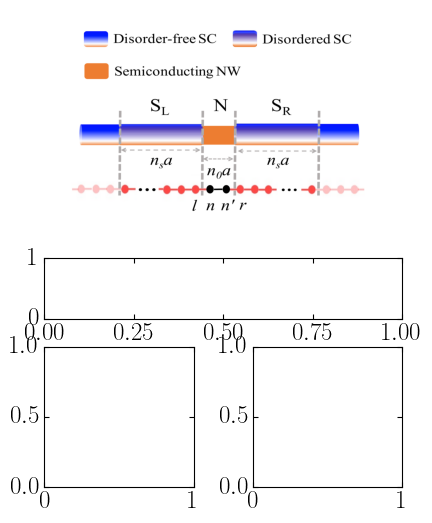

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from pdf2image import convert_from_path
import os

def get_pdf_dimensions(pdf_path, page_num=0):
    """获取PDF页面的尺寸"""
    try:
        images = convert_from_path(pdf_path, first_page=page_num+1, last_page=page_num+1, dpi=72)
        if images:
            img = images[0]
            width, height = img.size
            return width, height
        return None
    except Exception as e:
        print(f"获取PDF尺寸时出错: {e}")
        return None

def plot_pdf_to_ax(pdf_path, page_num, ax, dpi=150):
    """将PDF页面绘制到matplotlib坐标轴"""
    try:
        # 转换PDF页面为图像
        images = convert_from_path(pdf_path, first_page=page_num+1, last_page=page_num+1, dpi=dpi)
        
        if images:
            img = images[0]
            img_array = np.array(img)
            
            # 显示图像
            ax.imshow(img_array, extent= [0.1, 0.9, 0.2,0.8], aspect='auto')
            ax.axis('off')
            
            return True
        else:
            print(f"无法转换PDF页面 {page_num}")
            return False
            
    except Exception as e:
        print(f"处理PDF时出错: {e}")
        return False

def main():
    # 获取绘图参数
    plot_config = set_plotting_style()
    
    # 设置工作目录
    dir = os.getcwd() 
    dirF = os.path.join(dir, "Plots_collection")
    
    if not os.path.exists(dirF):
        os.makedirs(dirF)
    
    # PDF文件路径
    pdf_path = 'draft_plot_5.pdf'
    
    # 获取PDF页面尺寸以确定合适的宽高比
    pdf_dims = get_pdf_dimensions(pdf_path, 0)
    if pdf_dims:
        pdf_width, pdf_height = pdf_dims
        pdf_aspect_ratio = pdf_height / pdf_width
        print(f"PDF尺寸: {pdf_width} x {pdf_height}, 宽高比: {pdf_aspect_ratio:.3f}")
    else:
        # 如果无法获取尺寸，使用默认宽高比
        pdf_aspect_ratio = 0.75
        print(f"使用默认PDF宽高比: {pdf_aspect_ratio}")
    
    # 设置基础宽度
    base_width = 3.847 * 1.2
    
    # 根据PDF计算第一个panel的高度
    panel1_height = base_width * pdf_aspect_ratio
    
    # 设置其他panel的高度
    panel2_height = 0.64 * base_width * 0.3
    panel3_height = 0.64 * base_width * 0.7
    
    # 计算总高度
    total_height = panel1_height + panel2_height + panel3_height
    
    # 创建figure
    fig = plt.figure(figsize=(base_width, total_height))
    
    # 创建GridSpec
    gs = GridSpec(3, 1, height_ratios=[panel1_height, panel2_height, panel3_height], hspace=0.2)
    
    # Panel 1: 显示PDF页面
    ax1 = fig.add_subplot(gs[0])
    success = plot_pdf_to_ax(pdf_path, 0, ax1, dpi=300)
    
    if not success:
        # 如果PDF显示失败，显示错误信息
        ax1.text(0.5, 0.5, f"无法加载PDF: {pdf_path}", 
                ha='center', va='center', transform=ax1.transAxes)
        ax1.axis('off')
    
    # Panel 2: 其他内容
    ax2 = SubplotZero(fig, gs[1, 0])
    fig.add_subplot(ax2)
    
    # Panel 3: 分为两个子panel
    gs_bottom = GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[2,0], wspace=0.4)  
    ax3_cpr = SubplotZero(fig, gs_bottom[0, 0])
    ax3_dc = SubplotZero(fig, gs_bottom[0, 1])
    fig.add_subplot(ax3_cpr) 
    fig.add_subplot(ax3_dc)
    
    # ... 添加CPR和DC绘图代码
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

In [8]:
disorder_Data = np.loadtxt("disorder_data_test_Nd=50_ld=10_v0=2Delta.csv", delimiter=',', dtype=float, skiprows=1)

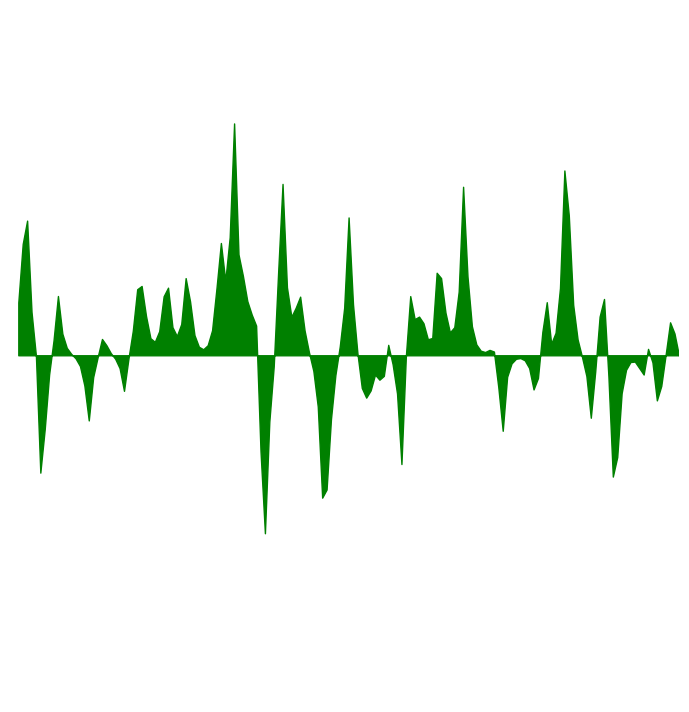

In [36]:

dir = os.getcwd() 
dirF = os.path.join(dir, "Plots_collection")


width = 3.847*2.0  # * 1.35
height = 1 * width  #1.2 * width
    
fig = plt.figure(figsize=(width, height))

plt.fill_between(disorder_Data[:,0],disorder_Data[:,1]*0,disorder_Data[:,1],color='green')

plt.ylim([-2,2])
plt.xlim([-2,150])
#plt.xlim([151,304])

plt.axis('off')   
plt.subplots_adjust(left=0.05, right=0.92, bottom=0.05, top=0.95)
    
    # 保存图形到Plots_collection目录

eps_output_path1 = os.path.join(dirF, "a_f1.eps")
eps_output_path2 = os.path.join(dirF, "a_f2.eps")

plt.savefig(eps_output_path1, dpi=300, bbox_inches='tight', facecolor='white',format='eps')
#plt.savefig(eps_output_path, dpi=300, bbox_inches='tight', facecolor='white',format='eps')
 
plt.show()


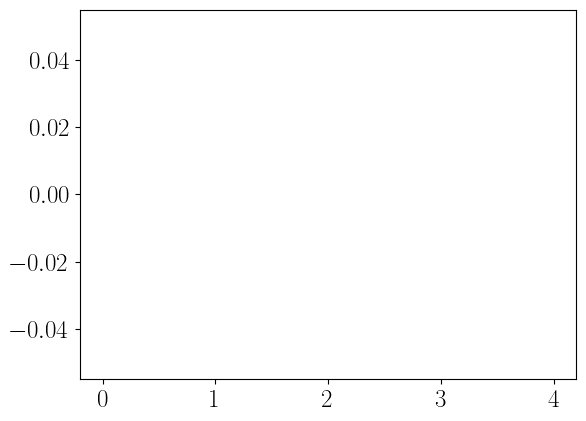

In [147]:
plt.fill_between([0,1,2,3,4],0, [0*)
plt.show()

In [253]:
0.64*0.83 

0.5312